# Science des reseaux sociaux - Spotify Project 
# Taylor Swift

In [194]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 30.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [198]:
# Imports

import networkx as nx # import package networkx
import matplotlib.pyplot as plt # import matplotlib (to draw better graphs)
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import random
import collections
import community
import scipy.stats
from scipy.optimize import curve_fit
import csv
from scipy.stats import pearsonr
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import community
from sklearn.cluster import KMeans

# I - Create a graph - Super stars general network

In [3]:
# Read the edge list and create a directed graph
superstar_network = nx.read_edgelist('Taylor_Swift_Network_names.txt', comments="Node", create_using=nx.DiGraph(), delimiter=',', data=False)

## A - Basic properties of the graph - Version "all nodes" (sûrement à supprimer)

In [4]:
# Number of nodes and edges
superstar_network.number_of_nodes(), superstar_network.number_of_edges()

(472, 2000)

In [5]:
# See nodes
print(superstar_network.nodes())

['Taylor Swift', 'Selena Gomez', 'Olivia Rodrigo', 'Katy Perry', 'Ariana Grande', 'Harry Styles', 'Camila Cabello', 'Demi Lovato', 'One Direction', 'Meghan Trainor', 'Shawn Mendes', 'Miley Cyrus', 'Sabrina Carpenter', 'Dua Lipa', 'Justin Bieber', 'Lana Del Rey', 'Halsey', 'Billie Eilish', 'Conan Gray', 'Charlie Puth', 'ZAYN', 'Selena Gomez & The Scene', 'Fifth Harmony', 'Nick Jonas', 'Bebe Rexha', 'Anne-Marie', 'Little Mix', 'Zara Larsson', 'Hailee Steinfeld', 'Alessia Cara', 'Zendaya', 'Tate McRae', 'Madison Beer', 'Doja Cat', 'Gracie Abrams', 'Dove Cameron', 'Melanie Martinez', 'Joshua Bassett', 'SZA', 'girl in red', 'Britney Spears', 'Lady Gaga', 'Kesha', 'Avril Lavigne', 'Jessie J', 'Kelly Clarkson', 'Christina Aguilera', 'Ellie Goulding', 'P!nk', 'Sia', 'Nicki Minaj', 'Cardi B', 'Rihanna', 'Louis Tomlinson', 'Niall Horan', 'Liam Payne', '5 Seconds of Summer', 'Jonas Brothers', 'Troye Sivan', 'The Vamps', 'Rita Ora', 'Hannah Montana', 'James Arthur', 'Iggy Azalea', 'Jennifer Lopez'

In [6]:
# See edges
print(superstar_network.edges())

[('Taylor Swift', 'Selena Gomez'), ('Taylor Swift', 'Olivia Rodrigo'), ('Taylor Swift', 'Katy Perry'), ('Taylor Swift', 'Ariana Grande'), ('Taylor Swift', 'Harry Styles'), ('Taylor Swift', 'Camila Cabello'), ('Taylor Swift', 'Demi Lovato'), ('Taylor Swift', 'One Direction'), ('Taylor Swift', 'Meghan Trainor'), ('Taylor Swift', 'Shawn Mendes'), ('Taylor Swift', 'Miley Cyrus'), ('Taylor Swift', 'Sabrina Carpenter'), ('Taylor Swift', 'Dua Lipa'), ('Taylor Swift', 'Justin Bieber'), ('Taylor Swift', 'Lana Del Rey'), ('Taylor Swift', 'Halsey'), ('Taylor Swift', 'Billie Eilish'), ('Taylor Swift', 'Conan Gray'), ('Taylor Swift', 'Charlie Puth'), ('Taylor Swift', 'ZAYN'), ('Selena Gomez', 'Camila Cabello'), ('Selena Gomez', 'Demi Lovato'), ('Selena Gomez', 'Selena Gomez & The Scene'), ('Selena Gomez', 'Fifth Harmony'), ('Selena Gomez', 'Nick Jonas'), ('Selena Gomez', 'Bebe Rexha'), ('Selena Gomez', 'Katy Perry'), ('Selena Gomez', 'Miley Cyrus'), ('Selena Gomez', 'Anne-Marie'), ('Selena Gomez', 

In [7]:
# Indegrees
superstar_network.in_degree()

InDegreeView({'Taylor Swift': 1, 'Selena Gomez': 17, 'Olivia Rodrigo': 8, 'Katy Perry': 14, 'Ariana Grande': 9, 'Harry Styles': 14, 'Camila Cabello': 22, 'Demi Lovato': 27, 'One Direction': 12, 'Meghan Trainor': 17, 'Shawn Mendes': 16, 'Miley Cyrus': 15, 'Sabrina Carpenter': 13, 'Dua Lipa': 15, 'Justin Bieber': 4, 'Lana Del Rey': 8, 'Halsey': 20, 'Billie Eilish': 4, 'Conan Gray': 19, 'Charlie Puth': 10, 'ZAYN': 16, 'Selena Gomez & The Scene': 7, 'Fifth Harmony': 27, 'Nick Jonas': 23, 'Bebe Rexha': 37, 'Anne-Marie': 26, 'Little Mix': 28, 'Zara Larsson': 26, 'Hailee Steinfeld': 28, 'Alessia Cara': 20, 'Zendaya': 16, 'Tate McRae': 6, 'Madison Beer': 8, 'Doja Cat': 11, 'Gracie Abrams': 8, 'Dove Cameron': 9, 'Melanie Martinez': 8, 'Joshua Bassett': 3, 'SZA': 6, 'girl in red': 15, 'Britney Spears': 13, 'Lady Gaga': 7, 'Kesha': 22, 'Avril Lavigne': 9, 'Jessie J': 17, 'Kelly Clarkson': 13, 'Christina Aguilera': 15, 'Ellie Goulding': 17, 'P!nk': 8, 'Sia': 8, 'Nicki Minaj': 5, 'Cardi B': 5, 'Rih

In [8]:
# Outdegrees
superstar_network.out_degree()

OutDegreeView({'Taylor Swift': 20, 'Selena Gomez': 20, 'Olivia Rodrigo': 20, 'Katy Perry': 20, 'Ariana Grande': 20, 'Harry Styles': 20, 'Camila Cabello': 20, 'Demi Lovato': 20, 'One Direction': 20, 'Meghan Trainor': 20, 'Shawn Mendes': 20, 'Miley Cyrus': 20, 'Sabrina Carpenter': 20, 'Dua Lipa': 20, 'Justin Bieber': 20, 'Lana Del Rey': 20, 'Halsey': 20, 'Billie Eilish': 20, 'Conan Gray': 20, 'Charlie Puth': 20, 'ZAYN': 20, 'Selena Gomez & The Scene': 20, 'Fifth Harmony': 20, 'Nick Jonas': 20, 'Bebe Rexha': 20, 'Anne-Marie': 20, 'Little Mix': 20, 'Zara Larsson': 20, 'Hailee Steinfeld': 20, 'Alessia Cara': 20, 'Zendaya': 20, 'Tate McRae': 20, 'Madison Beer': 20, 'Doja Cat': 20, 'Gracie Abrams': 20, 'Dove Cameron': 20, 'Melanie Martinez': 20, 'Joshua Bassett': 20, 'SZA': 20, 'girl in red': 20, 'Britney Spears': 20, 'Lady Gaga': 20, 'Kesha': 20, 'Avril Lavigne': 20, 'Jessie J': 20, 'Kelly Clarkson': 20, 'Christina Aguilera': 20, 'Ellie Goulding': 20, 'P!nk': 20, 'Sia': 20, 'Nicki Minaj': 20

In [9]:
# Degree (= sum of in and outdegree)
superstar_network.degree()

DiDegreeView({'Taylor Swift': 21, 'Selena Gomez': 37, 'Olivia Rodrigo': 28, 'Katy Perry': 34, 'Ariana Grande': 29, 'Harry Styles': 34, 'Camila Cabello': 42, 'Demi Lovato': 47, 'One Direction': 32, 'Meghan Trainor': 37, 'Shawn Mendes': 36, 'Miley Cyrus': 35, 'Sabrina Carpenter': 33, 'Dua Lipa': 35, 'Justin Bieber': 24, 'Lana Del Rey': 28, 'Halsey': 40, 'Billie Eilish': 24, 'Conan Gray': 39, 'Charlie Puth': 30, 'ZAYN': 36, 'Selena Gomez & The Scene': 27, 'Fifth Harmony': 47, 'Nick Jonas': 43, 'Bebe Rexha': 57, 'Anne-Marie': 46, 'Little Mix': 48, 'Zara Larsson': 46, 'Hailee Steinfeld': 48, 'Alessia Cara': 40, 'Zendaya': 36, 'Tate McRae': 26, 'Madison Beer': 28, 'Doja Cat': 31, 'Gracie Abrams': 28, 'Dove Cameron': 29, 'Melanie Martinez': 28, 'Joshua Bassett': 23, 'SZA': 26, 'girl in red': 35, 'Britney Spears': 33, 'Lady Gaga': 27, 'Kesha': 42, 'Avril Lavigne': 29, 'Jessie J': 37, 'Kelly Clarkson': 33, 'Christina Aguilera': 35, 'Ellie Goulding': 37, 'P!nk': 28, 'Sia': 28, 'Nicki Minaj': 25,

In [10]:
# Let's look at a node in particular, for example Selena Gomez
superstar_network.in_degree('Selena Gomez'), superstar_network.out_degree('Selena Gomez'), superstar_network.degree('Selena Gomez')

(17, 20, 37)

In [11]:
# Neighbours of node Selena Gomez: predecessors
list(superstar_network.predecessors('Selena Gomez'))

['Taylor Swift',
 'Olivia Rodrigo',
 'Katy Perry',
 'Ariana Grande',
 'Harry Styles',
 'Camila Cabello',
 'Demi Lovato',
 'One Direction',
 'Shawn Mendes',
 'Miley Cyrus',
 'Dua Lipa',
 'Justin Bieber',
 'Halsey',
 'Billie Eilish',
 'Charlie Puth',
 'Selena Gomez & The Scene',
 'Ed Sheeran']

The predecessors of a node n are the nodes m such that there exists a directed edge from m to n.

Here the predecessors of a given artist A are all artists who recommends A. 

In [12]:
# Neighbours of node Selena Gomez: successors
list(superstar_network.successors('Selena Gomez'))

['Camila Cabello',
 'Demi Lovato',
 'Selena Gomez & The Scene',
 'Fifth Harmony',
 'Nick Jonas',
 'Bebe Rexha',
 'Katy Perry',
 'Miley Cyrus',
 'Anne-Marie',
 'Halsey',
 'ZAYN',
 'Ariana Grande',
 'Dua Lipa',
 'Meghan Trainor',
 'Shawn Mendes',
 'Little Mix',
 'Zara Larsson',
 'Hailee Steinfeld',
 'Alessia Cara',
 'Zendaya']

The successors of a node n are the nodes h such that there exists a directed edge from n to h.

Here the successors of a given artist A are all artists who are recommended by A.

The number of successors for an artist will be always 20, because we know that all artists systematically recommend 20 other artists on Spotify.

In [13]:
# Neighbors of node Selena Gomez --> we get the same results as the list of her predecessors
list(superstar_network.adj['Selena Gomez'])

['Camila Cabello',
 'Demi Lovato',
 'Selena Gomez & The Scene',
 'Fifth Harmony',
 'Nick Jonas',
 'Bebe Rexha',
 'Katy Perry',
 'Miley Cyrus',
 'Anne-Marie',
 'Halsey',
 'ZAYN',
 'Ariana Grande',
 'Dua Lipa',
 'Meghan Trainor',
 'Shawn Mendes',
 'Little Mix',
 'Zara Larsson',
 'Hailee Steinfeld',
 'Alessia Cara',
 'Zendaya']

In [14]:
# Let's choose another particular node, for example Taylor Swift
superstar_network.degree('Taylor Swift')

21

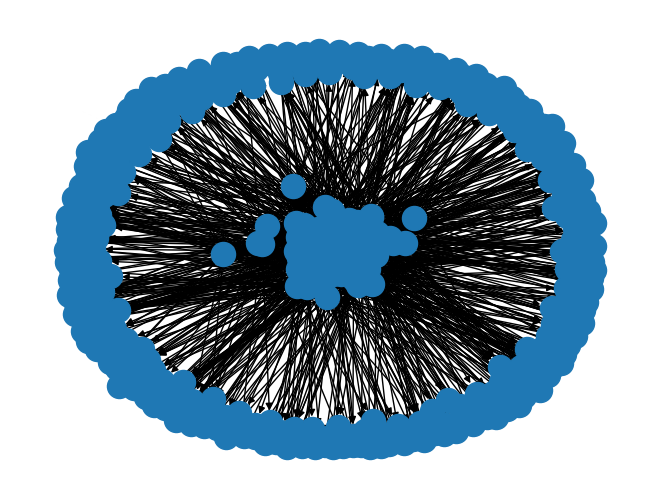

In [15]:
# plot superstar_network
nx.draw(superstar_network)
plt.show()

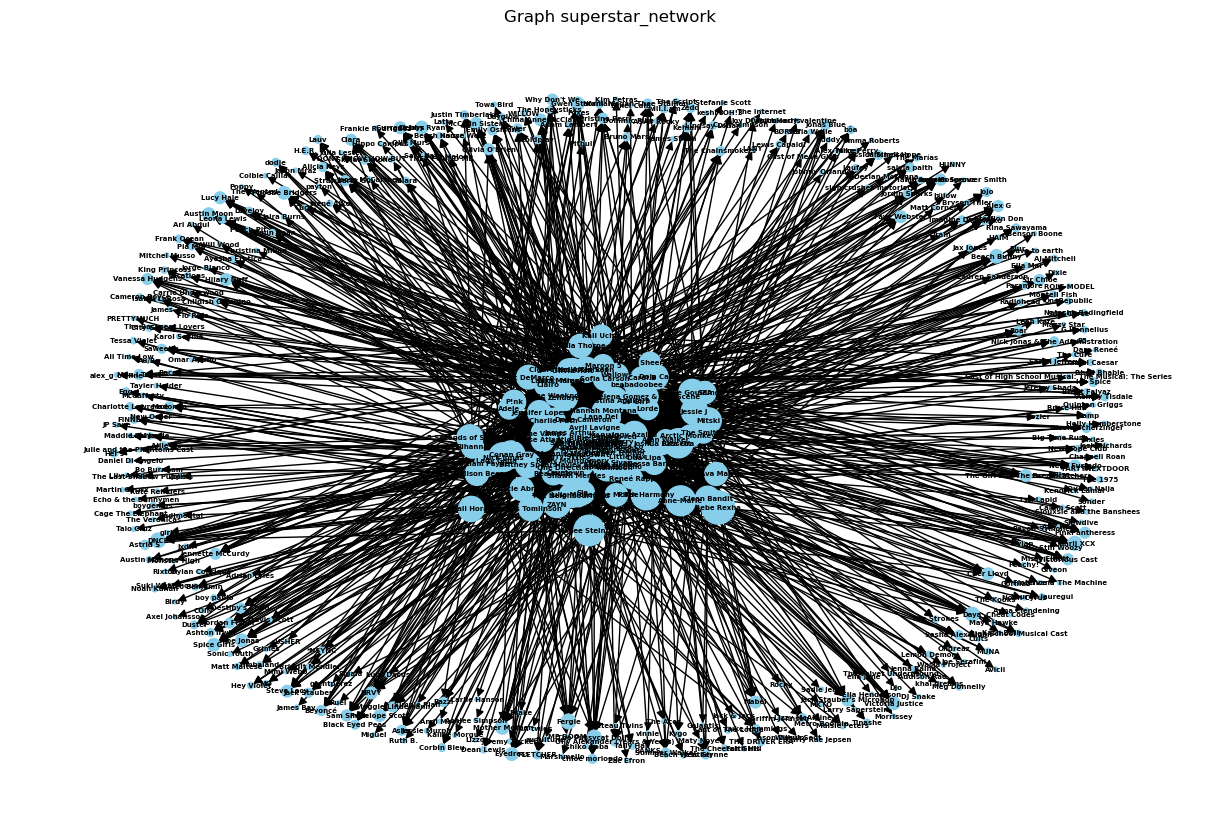

In [16]:
# Calculate the degrees (sum of in-degree and out-degree) of each node
degrees = {node: val for (node, val) in superstar_network.degree()}

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(superstar_network, with_labels=True, node_size=[v * 10 for v in degrees.values()], 
        node_color='skyblue', font_weight='bold', font_size=5, 
        arrowstyle='-|>', arrowsize=12)
plt.title("Graph superstar_network")
plt.show()


In [17]:
## Why does the difference between Graph and DiGraph matter?

# Let's see how many edges superstar_network (directed graph) has:
print(superstar_network.number_of_edges())

# Now, let's repeat the calculation with an undirected version of the superstar_network graph:
superstar_network_undirected = nx.read_edgelist('Taylor_Swift_Network_names.txt', comments="Node", create_using=nx.Graph(), delimiter=',', data=False)
print(superstar_network_undirected.number_of_edges())

2000
1689


The difference in the number of edges between the directed and undirected graphs is due to the fact that in a directed graph, each edge counts as a specific relationship from one entity to another, whereas in an undirected graph, a single edge counts as a relationship that can be considered in both directions between the same entities.

Thus, there are 2000 specific relationships in the directed network, whereas in the undirected network, some of these relationships are counted twice, as they are considered in both directions, thus reducing the total number of edges to 1689.

In our case, we really want to use directed graph, as recommendation between artists are not necessarily reciproqual. 

In [18]:
# Identify nodes without sucessors (i.e. nodes for which we couldn't scrap the recommendations because of API restrictions in the number of request)
no_successors = [node for node, out_degree in superstar_network.out_degree() if out_degree == 0]
print("Nodes without successeurs:", no_successors)

Nodes without successeurs: ['FINNEAS', 'Beach Bunny', 'Alec Benjamin', 'Ashe', 'Mother Mother', 'Phoebe Bridgers', 'Sam Smith', 'The Chainsmokers', 'Lauv', 'Bazzi', 'Vanessa Hudgens', 'Ashley Tisdale', 'Miranda Cosgrove', 'Emily Osment', 'Hilary Duff', 'Joe Jonas', 'Lindsay Lohan', 'Nick Jonas & The Administration', 'Victorious Cast', 'The Cheetah Girls', 'Lauren Jauregui', 'DNCE', 'Cher Lloyd', 'Austin Mahone', 'Daya', 'Mabel', 'Charli XCX', 'Jess Glynne', 'HRVY', 'Jonas Blue', 'Olly Murs', 'Pia Mia', 'Astrid S', 'Zedd', 'Maggie Lindemann', "Olivia O'Brien", 'Victoria Justice', 'Debby Ryan', 'China Anne McClain', 'McClain Sisters', 'Zac Efron', 'Lucy Hale', 'Jennette McCurdy', 'Austin Moon', 'The Girl and The Dreamcatcher', 'Lauren Spencer Smith', 'Mimi Webb', 'Ruth B.', 'Sasha Alex Sloan', 'Jessie Murph', 'Dean Lewis', 'Benson Boone', 'Sadie Jean', 'Charlotte Lawrence', 'Megan Thee Stallion', 'Ice Spice', 'Kehlani', 'Saweetie', 'Summer Walker', 'Ashnikko', 'PinkPantheress', 'H.E.R.',

To ensure the integrity of our analysis, we opt to exclude nodes that haven't been fully scraped, meaning nodes lacking all 20 recommendations. This decision aims to mitigate potential bias in our results. The rationale is to prevent the inadvertent labeling of certain artists as poorly connected, without discerning whether this perception stems from genuine network characteristics or from the limitations of our ability to collect complete recommendation data due to API constraints.

## B - Version "without no successors nodes"

### B1 - Create a complete version of the graph

In [19]:
superstar_network_restricted = nx.DiGraph()

# Iterate through all nodes in G
for node in superstar_network.nodes():
    # Check if the node has at least 20 successor
    if superstar_network.out_degree(node) > 0:
        # Add the node to G_new
        superstar_network_restricted.add_node(node)
        
        # Also add all outgoing edges from this node to G_new
        for succ in superstar_network.successors(node):
            # Ensure the successor also has a node with successors before adding
            if superstar_network.out_degree(succ) > 0:
                superstar_network_restricted.add_edge(node, succ)


Here, we create a restricted version of our directed graph. It iterates through each node in the original graph superstar_network and examines whether the node has at least 1 outgoing edges (successors). If a node meets this criterion, it is added to the restricted graph along with all of its outgoing edges. However, when adding the edges, it checks whether each successor node also has at least 1 outgoing edges before adding the edge. This process ensures that only nodes with 1 outgoing connections, as well as their related connections, are included in the restricted graph.

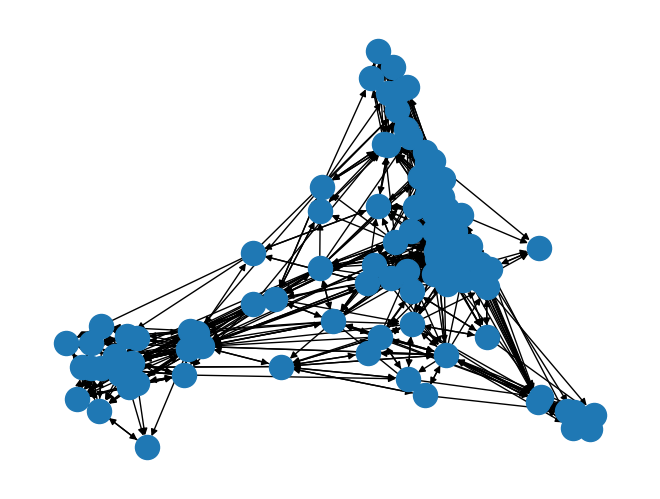

In [20]:
# Plot superstar_network
nx.draw(superstar_network_restricted)
plt.show()

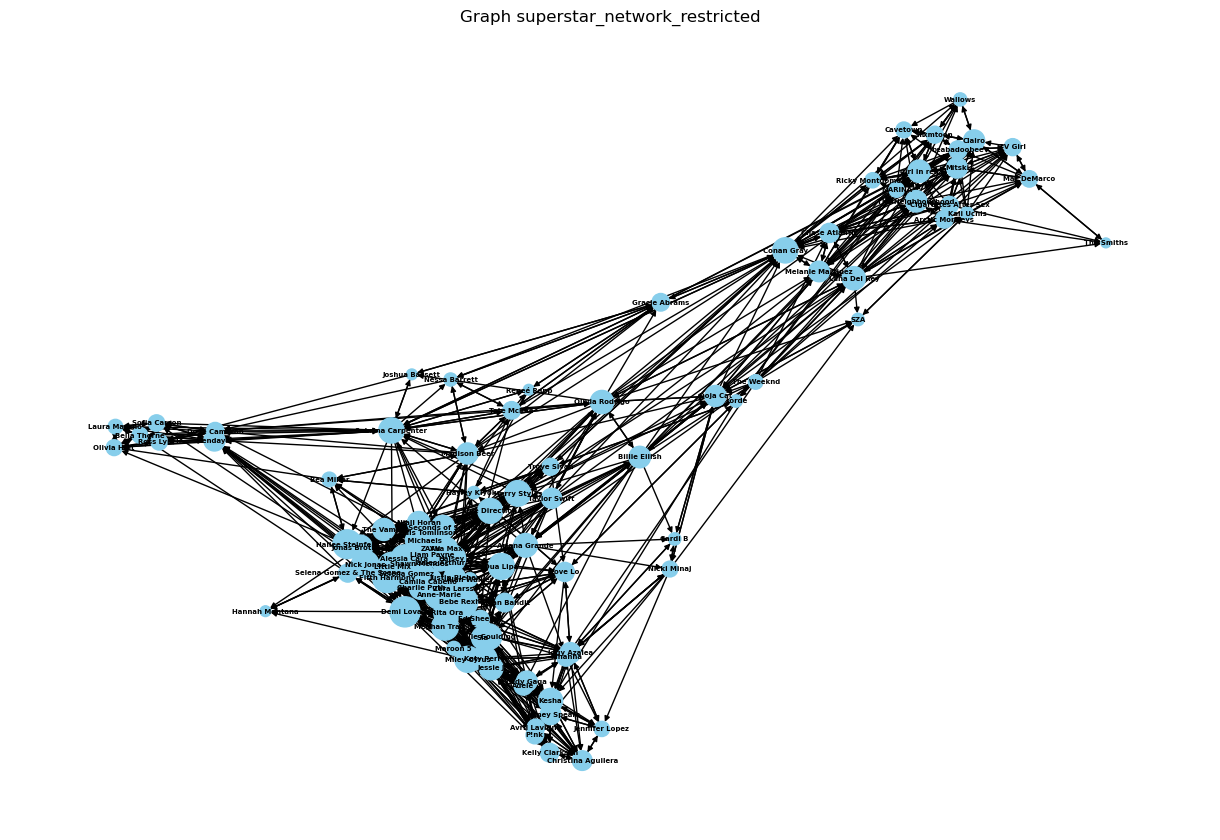

In [21]:
# Calculate the degrees (sum of in-degree and out-degree) of each node
degrees = {node: val for (node, val) in superstar_network_restricted.degree()}

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(superstar_network_restricted, with_labels=True, node_size=[v * 10 for v in degrees.values()], 
        node_color='skyblue', font_weight='bold', font_size=5, 
        arrowstyle='-|>', arrowsize=8)
plt.title("Graph superstar_network_restricted")
plt.show()

### B2 - Basic properties of graph

In [34]:
# Number of nodes and edges
superstar_network_restricted.number_of_nodes(), superstar_network_restricted.number_of_edges()

(100, 1131)

In [35]:
# See nodes 
print(superstar_network_restricted.nodes())

['Taylor Swift', 'Selena Gomez', 'Olivia Rodrigo', 'Katy Perry', 'Ariana Grande', 'Harry Styles', 'Camila Cabello', 'Demi Lovato', 'One Direction', 'Meghan Trainor', 'Shawn Mendes', 'Miley Cyrus', 'Sabrina Carpenter', 'Dua Lipa', 'Justin Bieber', 'Lana Del Rey', 'Halsey', 'Billie Eilish', 'Conan Gray', 'Charlie Puth', 'ZAYN', 'Selena Gomez & The Scene', 'Fifth Harmony', 'Nick Jonas', 'Bebe Rexha', 'Anne-Marie', 'Little Mix', 'Zara Larsson', 'Hailee Steinfeld', 'Alessia Cara', 'Zendaya', 'Tate McRae', 'Madison Beer', 'Doja Cat', 'Gracie Abrams', 'Dove Cameron', 'Melanie Martinez', 'Joshua Bassett', 'SZA', 'girl in red', 'Britney Spears', 'Lady Gaga', 'Kesha', 'Avril Lavigne', 'Jessie J', 'Kelly Clarkson', 'Christina Aguilera', 'Ellie Goulding', 'P!nk', 'Sia', 'Nicki Minaj', 'Cardi B', 'Rihanna', 'Louis Tomlinson', 'Niall Horan', 'Liam Payne', '5 Seconds of Summer', 'Jonas Brothers', 'Troye Sivan', 'The Vamps', 'Rita Ora', 'Hannah Montana', 'James Arthur', 'Iggy Azalea', 'Jennifer Lopez'

In [36]:
# See edges
print(superstar_network_restricted.edges())

[('Taylor Swift', 'Selena Gomez'), ('Taylor Swift', 'Olivia Rodrigo'), ('Taylor Swift', 'Katy Perry'), ('Taylor Swift', 'Ariana Grande'), ('Taylor Swift', 'Harry Styles'), ('Taylor Swift', 'Camila Cabello'), ('Taylor Swift', 'Demi Lovato'), ('Taylor Swift', 'One Direction'), ('Taylor Swift', 'Meghan Trainor'), ('Taylor Swift', 'Shawn Mendes'), ('Taylor Swift', 'Miley Cyrus'), ('Taylor Swift', 'Sabrina Carpenter'), ('Taylor Swift', 'Dua Lipa'), ('Taylor Swift', 'Justin Bieber'), ('Taylor Swift', 'Lana Del Rey'), ('Taylor Swift', 'Halsey'), ('Taylor Swift', 'Billie Eilish'), ('Taylor Swift', 'Conan Gray'), ('Taylor Swift', 'Charlie Puth'), ('Taylor Swift', 'ZAYN'), ('Selena Gomez', 'Camila Cabello'), ('Selena Gomez', 'Demi Lovato'), ('Selena Gomez', 'Selena Gomez & The Scene'), ('Selena Gomez', 'Fifth Harmony'), ('Selena Gomez', 'Nick Jonas'), ('Selena Gomez', 'Bebe Rexha'), ('Selena Gomez', 'Katy Perry'), ('Selena Gomez', 'Miley Cyrus'), ('Selena Gomez', 'Anne-Marie'), ('Selena Gomez', 

In [37]:
# Indegrees
superstar_network_restricted.in_degree()

InDegreeView({'Taylor Swift': 1, 'Selena Gomez': 17, 'Olivia Rodrigo': 8, 'Katy Perry': 14, 'Ariana Grande': 9, 'Harry Styles': 14, 'Camila Cabello': 22, 'Demi Lovato': 27, 'One Direction': 12, 'Meghan Trainor': 17, 'Shawn Mendes': 16, 'Miley Cyrus': 15, 'Sabrina Carpenter': 13, 'Dua Lipa': 15, 'Justin Bieber': 4, 'Lana Del Rey': 8, 'Halsey': 20, 'Billie Eilish': 4, 'Conan Gray': 19, 'Charlie Puth': 10, 'ZAYN': 16, 'Selena Gomez & The Scene': 7, 'Fifth Harmony': 27, 'Nick Jonas': 23, 'Bebe Rexha': 37, 'Anne-Marie': 26, 'Little Mix': 28, 'Zara Larsson': 26, 'Hailee Steinfeld': 28, 'Alessia Cara': 20, 'Zendaya': 16, 'Tate McRae': 6, 'Madison Beer': 8, 'Doja Cat': 11, 'Gracie Abrams': 8, 'Dove Cameron': 9, 'Melanie Martinez': 8, 'Joshua Bassett': 3, 'SZA': 6, 'girl in red': 15, 'Britney Spears': 13, 'Lady Gaga': 7, 'Kesha': 22, 'Avril Lavigne': 9, 'Jessie J': 17, 'Kelly Clarkson': 13, 'Christina Aguilera': 15, 'Ellie Goulding': 17, 'P!nk': 8, 'Sia': 8, 'Nicki Minaj': 5, 'Cardi B': 5, 'Rih

In [38]:
# Outdegrees
superstar_network_restricted.out_degree()

OutDegreeView({'Taylor Swift': 20, 'Selena Gomez': 20, 'Olivia Rodrigo': 20, 'Katy Perry': 20, 'Ariana Grande': 20, 'Harry Styles': 20, 'Camila Cabello': 20, 'Demi Lovato': 20, 'One Direction': 20, 'Meghan Trainor': 20, 'Shawn Mendes': 20, 'Miley Cyrus': 20, 'Sabrina Carpenter': 20, 'Dua Lipa': 20, 'Justin Bieber': 20, 'Lana Del Rey': 20, 'Halsey': 20, 'Billie Eilish': 20, 'Conan Gray': 14, 'Charlie Puth': 17, 'ZAYN': 19, 'Selena Gomez & The Scene': 10, 'Fifth Harmony': 17, 'Nick Jonas': 15, 'Bebe Rexha': 17, 'Anne-Marie': 15, 'Little Mix': 17, 'Zara Larsson': 12, 'Hailee Steinfeld': 15, 'Alessia Cara': 17, 'Zendaya': 7, 'Tate McRae': 10, 'Madison Beer': 15, 'Doja Cat': 12, 'Gracie Abrams': 8, 'Dove Cameron': 7, 'Melanie Martinez': 14, 'Joshua Bassett': 3, 'SZA': 2, 'girl in red': 11, 'Britney Spears': 9, 'Lady Gaga': 15, 'Kesha': 8, 'Avril Lavigne': 7, 'Jessie J': 12, 'Kelly Clarkson': 5, 'Christina Aguilera': 5, 'Ellie Goulding': 17, 'P!nk': 8, 'Sia': 19, 'Nicki Minaj': 8, 'Cardi B':

In [39]:
# Degree (= sum of in and outdegree)
superstar_network_restricted.degree()

DiDegreeView({'Taylor Swift': 21, 'Selena Gomez': 37, 'Olivia Rodrigo': 28, 'Katy Perry': 34, 'Ariana Grande': 29, 'Harry Styles': 34, 'Camila Cabello': 42, 'Demi Lovato': 47, 'One Direction': 32, 'Meghan Trainor': 37, 'Shawn Mendes': 36, 'Miley Cyrus': 35, 'Sabrina Carpenter': 33, 'Dua Lipa': 35, 'Justin Bieber': 24, 'Lana Del Rey': 28, 'Halsey': 40, 'Billie Eilish': 24, 'Conan Gray': 33, 'Charlie Puth': 27, 'ZAYN': 35, 'Selena Gomez & The Scene': 17, 'Fifth Harmony': 44, 'Nick Jonas': 38, 'Bebe Rexha': 54, 'Anne-Marie': 41, 'Little Mix': 45, 'Zara Larsson': 38, 'Hailee Steinfeld': 43, 'Alessia Cara': 37, 'Zendaya': 23, 'Tate McRae': 16, 'Madison Beer': 23, 'Doja Cat': 23, 'Gracie Abrams': 16, 'Dove Cameron': 16, 'Melanie Martinez': 22, 'Joshua Bassett': 6, 'SZA': 8, 'girl in red': 26, 'Britney Spears': 22, 'Lady Gaga': 22, 'Kesha': 30, 'Avril Lavigne': 16, 'Jessie J': 29, 'Kelly Clarkson': 18, 'Christina Aguilera': 20, 'Ellie Goulding': 34, 'P!nk': 16, 'Sia': 27, 'Nicki Minaj': 13, '

In [40]:
# Let's look at a node in particular, for ex. Selena Gomez
superstar_network_restricted.in_degree('Selena Gomez'), superstar_network_restricted.out_degree('Selena Gomez'), superstar_network_restricted.degree('Selena Gomez')

(17, 20, 37)

In [41]:
# Neighbours of node Selena Gomez: predecessors
list(superstar_network_restricted.predecessors('Selena Gomez'))

['Taylor Swift',
 'Olivia Rodrigo',
 'Katy Perry',
 'Ariana Grande',
 'Harry Styles',
 'Camila Cabello',
 'Demi Lovato',
 'One Direction',
 'Shawn Mendes',
 'Miley Cyrus',
 'Dua Lipa',
 'Justin Bieber',
 'Halsey',
 'Billie Eilish',
 'Charlie Puth',
 'Selena Gomez & The Scene',
 'Ed Sheeran']

The predecessors of a node n are the nodes m such that there exists a directed edge from m to n.

Here the predecessors of a given artist A are all artists who recommends A. 

In [42]:
# Neighbours of node Selena Gomez: successors
list(superstar_network_restricted.successors('Selena Gomez'))

['Camila Cabello',
 'Demi Lovato',
 'Selena Gomez & The Scene',
 'Fifth Harmony',
 'Nick Jonas',
 'Bebe Rexha',
 'Katy Perry',
 'Miley Cyrus',
 'Anne-Marie',
 'Halsey',
 'ZAYN',
 'Ariana Grande',
 'Dua Lipa',
 'Meghan Trainor',
 'Shawn Mendes',
 'Little Mix',
 'Zara Larsson',
 'Hailee Steinfeld',
 'Alessia Cara',
 'Zendaya']

The successors of a node n are the nodes h such that there exists a directed edge from n to h.

Here the successors of a given artist A are all artists who are recommended by A.

The number of successors for an artist will be always 20, because we know that all artists systematically recommend 20 other artists on Spotify.

In [43]:
# Let's choose a particular node, for example Selena Gomez, and Taylor Swift
superstar_network_restricted.degree('Selena Gomez'), superstar_network_restricted.degree('Taylor Swift')
# Selena Gomez has a higher degree than Taylor Swift (while Taylor Swift is #1)

(37, 21)

In [44]:
# Neighbors of node Selena Gomez --> we get the same results as the list of her predecessors
list(superstar_network_restricted.adj['Selena Gomez'])

['Camila Cabello',
 'Demi Lovato',
 'Selena Gomez & The Scene',
 'Fifth Harmony',
 'Nick Jonas',
 'Bebe Rexha',
 'Katy Perry',
 'Miley Cyrus',
 'Anne-Marie',
 'Halsey',
 'ZAYN',
 'Ariana Grande',
 'Dua Lipa',
 'Meghan Trainor',
 'Shawn Mendes',
 'Little Mix',
 'Zara Larsson',
 'Hailee Steinfeld',
 'Alessia Cara',
 'Zendaya']

In [45]:
## Why does the difference between Graph and DiGraph matter?

# Let's first examine the number of edges in superstar_network (a directed graph):
print(superstar_network_restricted.number_of_edges())

# Now, let's repeat the calculation with an undirected version of the superstar_network graph:
superstar_network_undirected = nx.read_edgelist('Taylor_Swift_Network_names.txt', comments="Node", create_using=nx.Graph(), delimiter=',', data=False)

superstar_network_restricted_undirected = nx.Graph()

# Iterate through all nodes in superstar_network
for node in superstar_network.nodes():
    # Check if the node has at least one successor
    if superstar_network.out_degree(node) > 19:
        # Add the node to the new graph
        superstar_network_restricted_undirected.add_node(node)
        
        # Also add all outgoing edges from this node to the new graph
        for succ in superstar_network.successors(node):
            # Ensure the successor is also a node with successors before adding
            if superstar_network.out_degree(succ) > 19:
                superstar_network_restricted_undirected.add_edge(node, succ)

print(superstar_network_restricted_undirected.number_of_edges())

1131
820


The difference in the number of edges between the directed and undirected graphs is due to the fact that in a directed graph, each edge counts as a specific relationship from one entity to another, whereas in an undirected graph, a single edge counts as a relationship that can be considered in both directions between the same entities.

Thus, there are 1131 specific relationships in the directed network, whereas in the undirected network, some of these relationships are counted twice, as they are considered in both directions, thus reducing the total number of edges to 820.

In our case, we really want to use directed graph, as recommendation between artists are not necessarily reciproqual. 

# II - Matching graphs and node attributes

In [52]:
# Open attributes of the whole network
network_attributes = pd.read_table("Taylor_Swift_Attr_Network.csv", sep=',')

In [53]:
network_attributes.head()

Artist_Name  NB_Followers                    Genres  Popularity  \
0    Taylor Swift     107849786                   ['pop']         100   
1    Selena Gomez      48935201  ['pop', 'post-teen pop']          82   
2  Olivia Rodrigo      35051616                   ['pop']          90   
3      Katy Perry      32631137                   ['pop']          84   
4   Ariana Grande      95909921                   ['pop']          94   

     Nationality   Age  Death    Type  Gender  Total_Release  ...  \
0  United States  35.0  False  Person  female             20  ...   
1  United States  32.0  False  Person  female             20  ...   
2  United States  21.0  False  Person  female             20  ...   
3  United States  40.0  False  Person  female             20  ...   
4  United States  31.0  False  Person  female             20  ...   

   Acousticness  Danceability    Duration_MS    Energy  Instrumentalness  \
0      0.246333      0.516000  200141.333333  0.629333          0.000013   
1      0.331210      0.632333  205810.666667  0.572000          0.000427   
2      0.260967      0.545333  201924.333333  0.577000          0.000002   
3      0.026430      0.604333  222450.666667  0.693333          0.000011   
4      0.310233      0.643667  178677.666667  0.600667          0.000036   

   Liveness  Loudness  Speechiness       Tempo   Valence  
0  0.121667 -6.620000     0.100267  111.845333  0.516667  
1  0.170667 -6.610000     0.052967  104.945667  0.551933  
2  0.322000 -6.020333     0.087100  146.302333  0.408333  
3  0.408000 -5.006333     0.042933  139.257000  0.549333  
4  0.119700 -8.114667     0.048100  106.513667  0.490333  

[5 rows x 23 columns]

In [54]:
network_attributes.shape

(472, 23)

In [55]:
network_attributes.columns

Index(['Artist_Name', 'NB_Followers', 'Genres', 'Popularity', 'Nationality',
       'Age', 'Death', 'Type', 'Gender', 'Total_Release', 'Available_Markets',
       'Year_Last_Release', 'Type_Last_Release', 'Acousticness',
       'Danceability', 'Duration_MS', 'Energy', 'Instrumentalness', 'Liveness',
       'Loudness', 'Speechiness', 'Tempo', 'Valence'],
      dtype='object')

In [56]:
# Match nodes of digraph with attributes of nodes
network_attributes_data = network_attributes.set_index('Artist_Name').to_dict('index').items()
superstar_network_restricted.add_nodes_from(network_attributes_data)

# View results
print(superstar_network_restricted.nodes(data=True))

[('Taylor Swift', {'NB_Followers': 107849786, 'Genres': "['pop']", 'Popularity': 100, 'Nationality': 'United States', 'Age': 35.0, 'Death': False, 'Type': 'Person', 'Gender': 'female', 'Total_Release': 20, 'Available_Markets': 183, 'Year_Last_Release': 2024, 'Type_Last_Release': 'album', 'Acousticness': 0.2463333333333333, 'Danceability': 0.516, 'Duration_MS': 200141.3333333333, 'Energy': 0.6293333333333334, 'Instrumentalness': 1.2733333333333336e-05, 'Liveness': 0.1216666666666666, 'Loudness': -6.62, 'Speechiness': 0.1002666666666666, 'Tempo': 111.84533333333331, 'Valence': 0.5166666666666666}), ('Selena Gomez', {'NB_Followers': 48935201, 'Genres': "['pop', 'post-teen pop']", 'Popularity': 82, 'Nationality': 'United States', 'Age': 32.0, 'Death': False, 'Type': 'Person', 'Gender': 'female', 'Total_Release': 20, 'Available_Markets': 183, 'Year_Last_Release': 2024, 'Type_Last_Release': 'album', 'Acousticness': 0.33121, 'Danceability': 0.6323333333333333, 'Duration_MS': 205810.6666666666

In [57]:
superstar_network_restricted.number_of_nodes(), superstar_network_restricted.number_of_edges()

(472, 1131)

In [58]:
# view results
print(superstar_network_restricted.edges(data=True))

[('Taylor Swift', 'Selena Gomez', {}), ('Taylor Swift', 'Olivia Rodrigo', {}), ('Taylor Swift', 'Katy Perry', {}), ('Taylor Swift', 'Ariana Grande', {}), ('Taylor Swift', 'Harry Styles', {}), ('Taylor Swift', 'Camila Cabello', {}), ('Taylor Swift', 'Demi Lovato', {}), ('Taylor Swift', 'One Direction', {}), ('Taylor Swift', 'Meghan Trainor', {}), ('Taylor Swift', 'Shawn Mendes', {}), ('Taylor Swift', 'Miley Cyrus', {}), ('Taylor Swift', 'Sabrina Carpenter', {}), ('Taylor Swift', 'Dua Lipa', {}), ('Taylor Swift', 'Justin Bieber', {}), ('Taylor Swift', 'Lana Del Rey', {}), ('Taylor Swift', 'Halsey', {}), ('Taylor Swift', 'Billie Eilish', {}), ('Taylor Swift', 'Conan Gray', {}), ('Taylor Swift', 'Charlie Puth', {}), ('Taylor Swift', 'ZAYN', {}), ('Selena Gomez', 'Camila Cabello', {}), ('Selena Gomez', 'Demi Lovato', {}), ('Selena Gomez', 'Selena Gomez & The Scene', {}), ('Selena Gomez', 'Fifth Harmony', {}), ('Selena Gomez', 'Nick Jonas', {}), ('Selena Gomez', 'Bebe Rexha', {}), ('Selena G

In [59]:
# To view attributes, for example, 'Nationality'
nationalities = nx.get_node_attributes(superstar_network_restricted,'Nationality')
print(nationalities)

{'Taylor Swift': 'United States', 'Selena Gomez': 'United States', 'Olivia Rodrigo': 'United States', 'Katy Perry': 'United States', 'Ariana Grande': 'United States', 'Harry Styles': 'England', 'Camila Cabello': 'United States', 'Demi Lovato': 'United States', 'One Direction': 'England', 'Meghan Trainor': 'United States', 'Shawn Mendes': 'Canada', 'Miley Cyrus': 'United States', 'Sabrina Carpenter': 'United States', 'Dua Lipa': 'England', 'Justin Bieber': 'Canada', 'Lana Del Rey': 'United States', 'Halsey': 'United States', 'Billie Eilish': 'United States', 'Conan Gray': 'United States', 'Charlie Puth': 'United States', 'ZAYN': 'England', 'Selena Gomez & The Scene': 'United States', 'Fifth Harmony': 'United States', 'Nick Jonas': 'United States', 'Bebe Rexha': 'United States', 'Anne-Marie': 'United Kingdom', 'Little Mix': 'United Kingdom', 'Zara Larsson': 'Sweden', 'Hailee Steinfeld': 'United States', 'Alessia Cara': 'Canada', 'Zendaya': 'United States', 'Tate McRae': 'Canada', 'Madiso

In [60]:
# To view the value for a single node (for example, artist Britney Spears)
nationalities['Britney Spears'] 

'United States'

In [61]:
######################### Mini-digression ##############################

### A separate file with nodes (possibly with attributes)
### must be imported separately from the edge list, and 'added' to the graph if there are isolates (which do not appear in edgelists)

superstar_network2 = nx.read_edgelist('Taylor_Swift_Network_names.txt', comments="Node", create_using=nx.DiGraph(), delimiter=',', data=False)
# see nodes
superstar_network2.nodes()

NodeView(('Taylor Swift', 'Selena Gomez', 'Olivia Rodrigo', 'Katy Perry', 'Ariana Grande', 'Harry Styles', 'Camila Cabello', 'Demi Lovato', 'One Direction', 'Meghan Trainor', 'Shawn Mendes', 'Miley Cyrus', 'Sabrina Carpenter', 'Dua Lipa', 'Justin Bieber', 'Lana Del Rey', 'Halsey', 'Billie Eilish', 'Conan Gray', 'Charlie Puth', 'ZAYN', 'Selena Gomez & The Scene', 'Fifth Harmony', 'Nick Jonas', 'Bebe Rexha', 'Anne-Marie', 'Little Mix', 'Zara Larsson', 'Hailee Steinfeld', 'Alessia Cara', 'Zendaya', 'Tate McRae', 'Madison Beer', 'Doja Cat', 'Gracie Abrams', 'Dove Cameron', 'Melanie Martinez', 'Joshua Bassett', 'SZA', 'girl in red', 'Britney Spears', 'Lady Gaga', 'Kesha', 'Avril Lavigne', 'Jessie J', 'Kelly Clarkson', 'Christina Aguilera', 'Ellie Goulding', 'P!nk', 'Sia', 'Nicki Minaj', 'Cardi B', 'Rihanna', 'Louis Tomlinson', 'Niall Horan', 'Liam Payne', '5 Seconds of Summer', 'Jonas Brothers', 'Troye Sivan', 'The Vamps', 'Rita Ora', 'Hannah Montana', 'James Arthur', 'Iggy Azalea', 'Jennif

In [62]:
# See number of nodes
len(superstar_network2.nodes())

472

In [63]:
# See number of nodes
len(superstar_network_restricted.nodes())

472

In [64]:
# now add attributes
superstar_network_restricted.add_nodes_from(network_attributes['Artist_Name'].tolist())

# how many nodes now?
len(superstar_network_restricted.nodes())

############### end of digression ##############

472

# III - Local structures

## A - Isolates, Dyads and Triads

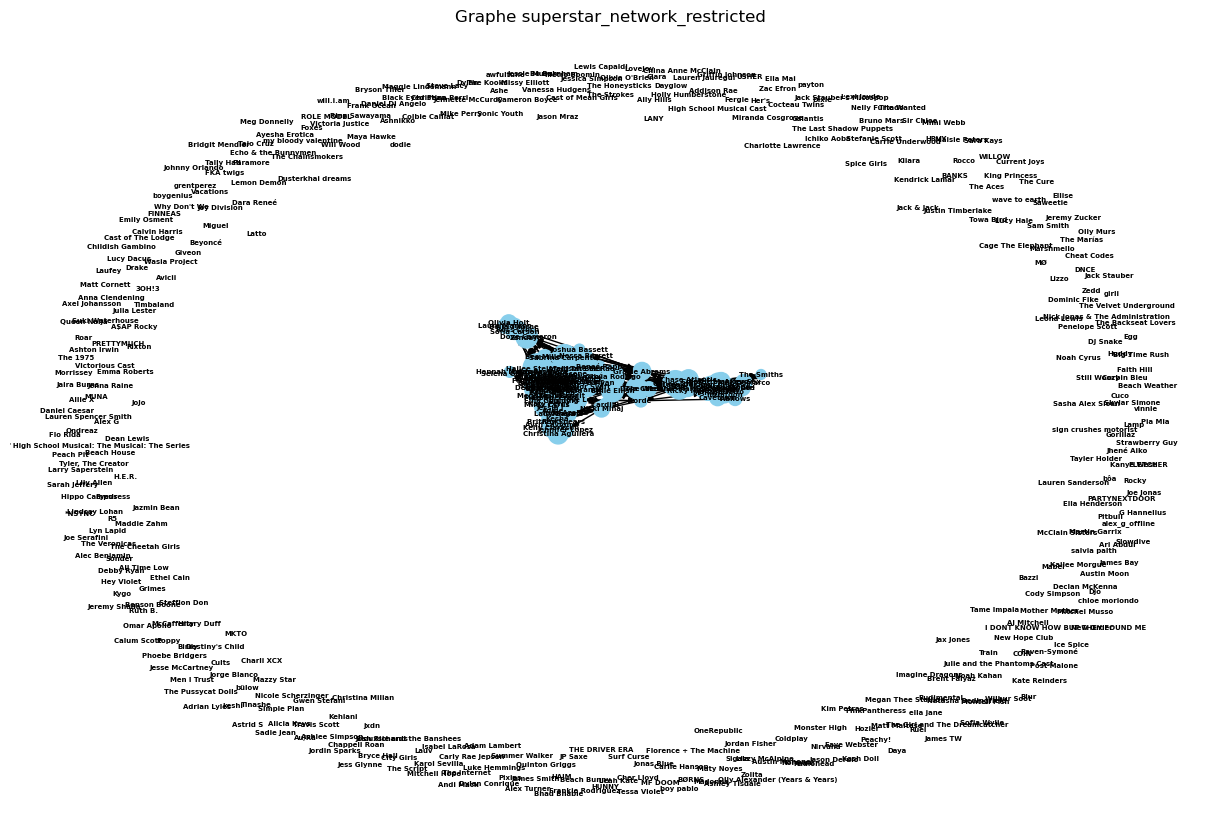

In [65]:
# Calculate the degrees (sum of in-degree and out-degree) of each node
degrees = {node: val for (node, val) in superstar_network_restricted.degree()}

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(superstar_network_restricted, with_labels=True, node_size=[v * 10 for v in degrees.values()], 
        node_color='skyblue', font_weight='bold', font_size=5, 
        arrowstyle='-|>', arrowsize=8)
plt.title("Graphe superstar_network_restricted")
plt.show()

In [66]:
# Identify isolates
list(nx.isolates(superstar_network_restricted))  

['FINNEAS',
 'Beach Bunny',
 'Alec Benjamin',
 'Ashe',
 'Mother Mother',
 'Phoebe Bridgers',
 'Sam Smith',
 'The Chainsmokers',
 'Lauv',
 'Bazzi',
 'Vanessa Hudgens',
 'Ashley Tisdale',
 'Miranda Cosgrove',
 'Emily Osment',
 'Hilary Duff',
 'Joe Jonas',
 'Lindsay Lohan',
 'Nick Jonas & The Administration',
 'Victorious Cast',
 'The Cheetah Girls',
 'Lauren Jauregui',
 'DNCE',
 'Cher Lloyd',
 'Austin Mahone',
 'Daya',
 'Mabel',
 'Charli XCX',
 'Jess Glynne',
 'HRVY',
 'Jonas Blue',
 'Olly Murs',
 'Pia Mia',
 'Astrid S',
 'Zedd',
 'Maggie Lindemann',
 "Olivia O'Brien",
 'Victoria Justice',
 'Debby Ryan',
 'China Anne McClain',
 'McClain Sisters',
 'Zac Efron',
 'Lucy Hale',
 'Jennette McCurdy',
 'Austin Moon',
 'The Girl and The Dreamcatcher',
 'Lauren Spencer Smith',
 'Mimi Webb',
 'Ruth B.',
 'Sasha Alex Sloan',
 'Jessie Murph',
 'Dean Lewis',
 'Benson Boone',
 'Sadie Jean',
 'Charlotte Lawrence',
 'Megan Thee Stallion',
 'Ice Spice',
 'Kehlani',
 'Saweetie',
 'Summer Walker',
 'Ashnik

In [67]:
isolates_list = list(nx.isolates(superstar_network_restricted))
distinct_isolates_count = len(set(isolates_list))
print("Number distinct of isolats :", distinct_isolates_count)

Number distinct of isolats : 372


In [68]:
# We decide to keep only artists that have at least 1 successors (i.e remove isolats here)
superstar_network_restricted.remove_nodes_from(isolates_list)

# Check the number
print("Number of removed isolates :", len(isolates_list))

Number of removed isolates : 372


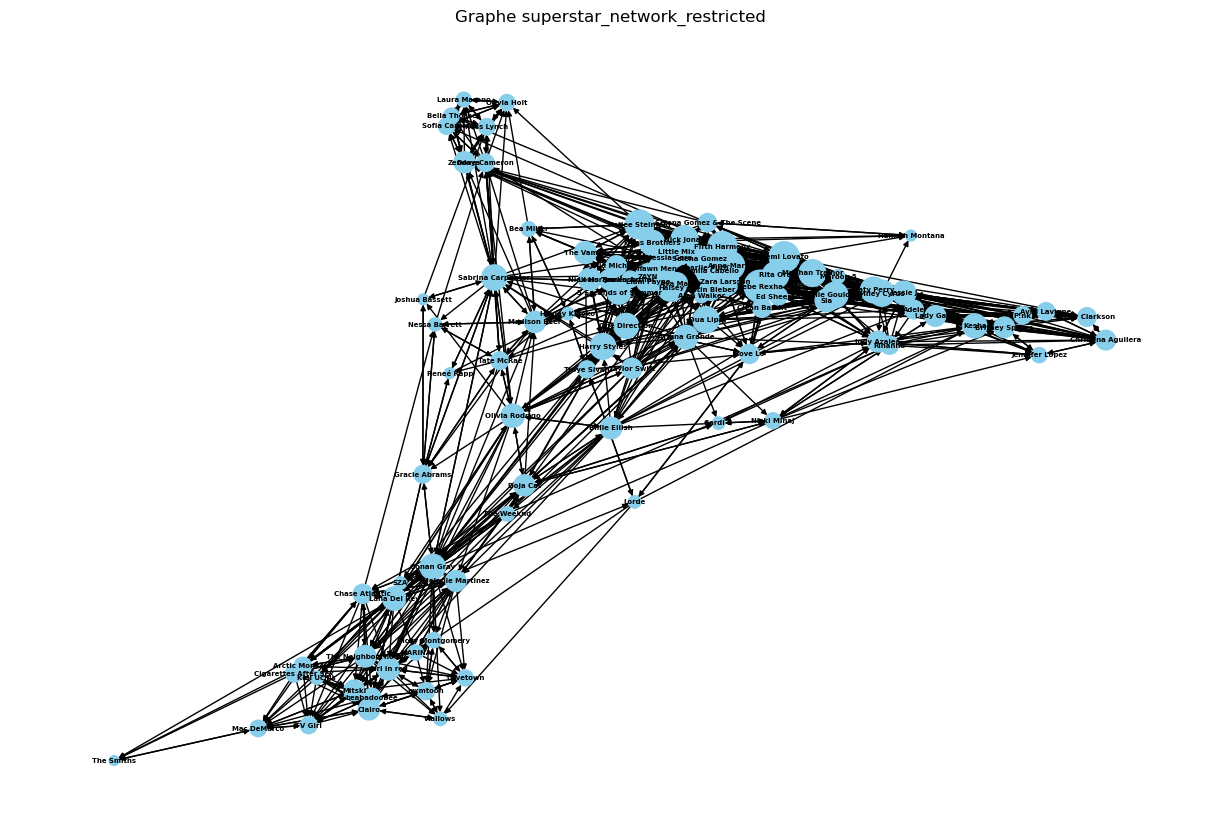

In [69]:
# Calculate the degrees (sum of in-degree and out-degree) of each node
degrees = {node: val for (node, val) in superstar_network_restricted.degree()}

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(superstar_network_restricted, with_labels=True, node_size=[v * 10 for v in degrees.values()], 
        node_color='skyblue', font_weight='bold', font_size=5, 
        arrowstyle='-|>', arrowsize=8)
plt.title("Graphe superstar_network_restricted")
plt.show()

In [70]:
# Dyads: Reciprocity (we can do it because superstar_network_restricted is a directed graph)
nx.reciprocity(superstar_network_restricted)
print(round(nx.reciprocity(superstar_network_restricted)*100,1), "% of recommendations are reciprocical.")

55.0 % of recommendations are reciprocical.


55.0% of recommendations in this network are reciprocal. In our context, reciprocity means that if artist A recommends artist B, then artist B also recommends artist A.

- A reciprocity of 55.0% suggests a significant level of mutual recommendation connections within the Spotify network. This implies that many recommendation relationships are bidirectional, indicating a pattern where if one artist recommends another, there's a high likelihood of mutual recommendation.
- This reciprocity could imply a balanced and reciprocal relationship in the recommendation system provided by Spotify. It may reflect a feature of Spotify's recommendation algorithm, where artists are often recommended in pairs or groups based on similar musical styles or user preferences.
- The high level of reciprocity could also indicate the effectiveness of Spotify's recommendation system in creating interconnected artist networks, where recommendations foster mutual discovery and support among artists.

However, it's essential to note that while the recommendations themselves are made by Spotify's algorithm rather than the artists directly, the presence of reciprocity still reflects underlying patterns of mutual affinity or similarity in the musical tastes of the artists within the network.

In [71]:
# Triads: global transitivity
print(nx.transitivity(superstar_network_restricted)) # this is the global clustering coefficient

0.45231822971549


The global clustering coefficient, also known as transitivity, measures the degree to which nodes in a network are grouped into cliques or triangles.

The overall clustering coefficient of 0.452 suggests a significant level of clustering within the restricted superstar network. This means that there is a tendency for artists recommended by the same artist to be equally likely to recommend each other. In other words, if artist A recommends both artist B and artist C, it's likely that artists B and C are also connected.

In [72]:
# Triads: local transitivity
print(nx.clustering(superstar_network_restricted))  

{'Taylor Swift': 0.37799043062200954, 'Selena Gomez': 0.3949771689497717, 'Olivia Rodrigo': 0.2851351351351351, 'Katy Perry': 0.3444846292947559, 'Ariana Grande': 0.3525, 'Harry Styles': 0.34810126582278483, 'Camila Cabello': 0.4041176470588235, 'Demi Lovato': 0.3618913857677903, 'One Direction': 0.42505133470225875, 'Meghan Trainor': 0.3904109589041096, 'Shawn Mendes': 0.391025641025641, 'Miley Cyrus': 0.3030560271646859, 'Sabrina Carpenter': 0.2254335260115607, 'Dua Lipa': 0.3475298126064736, 'Justin Bieber': 0.3663003663003663, 'Lana Del Rey': 0.30294906166219837, 'Halsey': 0.34889753566796367, 'Billie Eilish': 0.3241758241758242, 'Conan Gray': 0.24615384615384617, 'Charlie Puth': 0.39655172413793105, 'ZAYN': 0.4657534246575342, 'Selena Gomez & The Scene': 0.4541984732824427, 'Fifth Harmony': 0.42765273311897106, 'Nick Jonas': 0.4282608695652174, 'Bebe Rexha': 0.3468882602545969, 'Anne-Marie': 0.4485111662531017, 'Little Mix': 0.3891170431211499, 'Zara Larsson': 0.45803183791606367,

In [73]:
# Let's look at the average local transitivity
print(nx.average_clustering(superstar_network_restricted))
# Triads: global transitivity
print(nx.transitivity(superstar_network_restricted))

0.4558310150266606
0.45231822971549


- The average local transitivity measure represents the average local clustering coefficient in the network. This means that, on average, the neighbors of a given node have a 45.58% probability of forming triangles with each other. This indicates significant cohesion in the network's local clusters.

- The global transitivity represents the global clustering coefficient, also known as transitivity, which measures the degree to which nodes are grouped into cliques or triangles throughout the network. It is similar to average local transitivity, but measures clustering at the scale of the network as a whole.

Both measures show fairly similar levels of transitivity in the network, with the local average slightly higher than the global transitivity. This suggests that, although local clusters tend to be strongly connected, this cohesion is also maintained at the scale of the network as a whole.

## B - Other indicators of cohesion

In [74]:
# Density
nx.density(superstar_network_restricted)

0.11424242424242424

A network density of 11.42% indicates a relatively sparse network, suggesting that there are a moderate number of connections between artists relative to all possible connections.

This may indicate that there are still opportunities to establish new connections in the network, which could encourage the discovery of new artists and strengthen the cohesion of the artistic community on Spotify.
However, a lower density may also indicate a structured organization of the network, where connections are selectively established according to specific criteria, such as professional relationships or musical affinities.

In [75]:
# To find cliques that are only defined for undirected graphs, we need to convert superstar_network_restricted to an undirected graph
superstar_network_restricted_UG = nx.DiGraph.to_undirected(superstar_network_restricted)
print(list(nx.find_cliques(superstar_network_restricted_UG)))

[['Lorde', 'Wallows'], ['Lorde', 'Tove Lo', 'Troye Sivan'], ['Lorde', 'Tove Lo', 'Kesha'], ['Lorde', 'MARINA', 'Lana Del Rey'], ['Nessa Barrett', 'Chase Atlantic'], ['Nessa Barrett', 'Tate McRae', 'Madison Beer', 'Sabrina Carpenter', 'Gracie Abrams'], ['Nessa Barrett', 'Tate McRae', 'Madison Beer', 'Sabrina Carpenter', 'Dove Cameron'], ['The Vamps', 'Little Mix', 'One Direction', 'Niall Horan', '5 Seconds of Summer', 'Liam Payne', 'Jonas Brothers', 'Harry Styles', 'Louis Tomlinson'], ['The Vamps', 'Little Mix', 'One Direction', 'Niall Horan', '5 Seconds of Summer', 'James Arthur'], ['The Vamps', 'Little Mix', 'One Direction', 'Anne-Marie', 'James Arthur'], ['The Vamps', 'Little Mix', 'Hailee Steinfeld', 'Alessia Cara', 'Anne-Marie'], ['The Vamps', 'Little Mix', 'Hailee Steinfeld', 'Niall Horan', '5 Seconds of Summer', 'Liam Payne', 'Jonas Brothers', 'Louis Tomlinson'], ['The Vamps', 'Little Mix', 'Alessia Cara', 'James Arthur', 'Anne-Marie'], ['The Vamps', 'Shawn Mendes', 'ZAYN', 'One 

In [76]:
len(list(nx.find_cliques(superstar_network_restricted_UG)))

333

A clique is a subgraph in which every node is directly connected to every other node.

The presence of 333 cliques in the network suggests a fairly rich and complex community structure. Each clique represents a highly interconnected group of artists who are all linked to each other.
These cliques may represent sub-groups of artists who share similar musical characteristics, label affiliations or frequent collaborations.
The discovery of numerous cliques in the network also indicates a diversity and density in artistic relationships on Spotify, with many groups of artists recommending each other.

## C - Global structures: connectivity

The graph doesn't have any isolates so it is connected and we can define the diameter and the average shortest path length 

In [77]:
print(nx.is_weakly_connected(superstar_network_restricted))
print(nx.is_strongly_connected(superstar_network_restricted))

True
True


In [78]:
# To check diameter and average_shortest_path_length we need to use the undirected version of the graph
print(nx.diameter(superstar_network_restricted_UG))
print(nx.average_shortest_path_length(superstar_network_restricted)) # we can compute it since the graph is strongly connected. 
#Otherwise we should have used the unidrected version of the graph

4
3.025858585858586


- Network diameter: The diameter of a network is the maximum length of the shortest path between two nodes furthest apart in the network. Here, the network diameter is 4.

- Average length of shortest path: This is the average of the shortest paths between all pairs of nodes in the network. Here, the average length of the shortest path is about 3.03.

A network diameter of 4 indicates that the network is relatively small, as it only takes 4 steps to get from the farthest artist to another in the network. This suggests strong overall connectivity between artists.

An average shortest path length of around 3.03 indicates that, on average, it takes around 3 steps to get from one artist to another in the network. This indicates relative proximity between artists and good accessibility across the network.

These measurements suggest a well-connected and coherent structure in the superstar network on Spotify, with artists interconnected by relatively short paths. This favors information flow, collaboration and artist discovery within the network.

In [79]:
# The graph is directed so we can use in and out degrees

# indegree centrality (incoming ties, only for directed graphs)
print(nx.in_degree_centrality(superstar_network_restricted))

# outdegree centrality (outgoing ties)
print(nx.out_degree_centrality(superstar_network_restricted))

# degree centrality (sum of in and out degrees)
print(nx.degree_centrality(superstar_network_restricted))

{'Taylor Swift': 0.010101010101010102, 'Selena Gomez': 0.17171717171717174, 'Olivia Rodrigo': 0.08080808080808081, 'Katy Perry': 0.14141414141414144, 'Ariana Grande': 0.09090909090909091, 'Harry Styles': 0.14141414141414144, 'Camila Cabello': 0.22222222222222224, 'Demi Lovato': 0.27272727272727276, 'One Direction': 0.12121212121212122, 'Meghan Trainor': 0.17171717171717174, 'Shawn Mendes': 0.16161616161616163, 'Miley Cyrus': 0.15151515151515152, 'Sabrina Carpenter': 0.13131313131313133, 'Dua Lipa': 0.15151515151515152, 'Justin Bieber': 0.04040404040404041, 'Lana Del Rey': 0.08080808080808081, 'Halsey': 0.20202020202020204, 'Billie Eilish': 0.04040404040404041, 'Conan Gray': 0.19191919191919193, 'Charlie Puth': 0.10101010101010102, 'ZAYN': 0.16161616161616163, 'Selena Gomez & The Scene': 0.07070707070707072, 'Fifth Harmony': 0.27272727272727276, 'Nick Jonas': 0.23232323232323235, 'Bebe Rexha': 0.37373737373737376, 'Anne-Marie': 0.26262626262626265, 'Little Mix': 0.2828282828282829, 'Zar

In [80]:
# The 2 artists with the highest indegree centrality
highest_indegree = sorted(nx.in_degree_centrality(superstar_network_restricted).items(), key=lambda x: x[1], reverse=True)[:2]
print("The 2 artists with the highest indegree centrality:")
for artist, centrality in highest_indegree:
    print(artist, centrality)

# The 2 artists with the highest outdegree centrality
highest_outdegree = sorted(nx.out_degree_centrality(superstar_network_restricted).items(), key=lambda x: x[1], reverse=True)[:2]
print("\nThe 2 artists with the highest outdegree centrality:")
for artist, centrality in highest_outdegree:
    print(artist, centrality)

# The 2 artists with the highest degree centrality
highest_degree = sorted(nx.degree_centrality(superstar_network_restricted).items(), key=lambda x: x[1], reverse=True)[:2]
print("\nThe 2 artists with the highest degree centrality:")
for artist, centrality in highest_degree:
    print(artist, centrality)

# The 2 artists with the lowest indegree centrality
lowest_indegree = sorted(nx.in_degree_centrality(superstar_network_restricted).items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest indegree centrality:")
for artist, centrality in lowest_indegree:
    print(artist, centrality)

# The 2 artists with the lowest outdegree centrality
lowest_outdegree = sorted(nx.out_degree_centrality(superstar_network_restricted).items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest outdegree centrality:")
for artist, centrality in lowest_outdegree:
    print(artist, centrality)

# The 2 artists with the lowest degree centrality
lowest_degree = sorted(nx.degree_centrality(superstar_network_restricted).items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest degree centrality:")
for artist, centrality in lowest_degree:
    print(artist, centrality)

The 2 artists with the highest indegree centrality:
Bebe Rexha 0.37373737373737376
Little Mix 0.2828282828282829

The 2 artists with the highest outdegree centrality:
Taylor Swift 0.20202020202020204
Selena Gomez 0.20202020202020204

The 2 artists with the highest degree centrality:
Bebe Rexha 0.5454545454545455
Demi Lovato 0.4747474747474748

The 2 artists with the lowest indegree centrality:
Taylor Swift 0.010101010101010102
Alan Walker 0.010101010101010102

The 2 artists with the lowest outdegree centrality:
Hannah Montana 0.010101010101010102
The Smiths 0.010101010101010102

The 2 artists with the lowest degree centrality:
The Smiths 0.05050505050505051
Joshua Bassett 0.06060606060606061


In [81]:
# Calculate indegrees, outdegrees, and degrees
indegrees = [val for (node, val) in superstar_network_restricted.in_degree()]
outdegrees = [val for (node, val) in superstar_network_restricted.out_degree()]
degrees = [val for (node, val) in superstar_network_restricted.degree()]

# Convert lists to numpy arrays for easy statistical analysis
In = np.array(indegrees)
Out = np.array(outdegrees)
Degrees = np.array(degrees)

# Compute statistics
indegree_min = np.min(In)
indegree_mean = np.mean(In)
indegree_std = np.std(In)
indegree_max = np.max(In)

outdegree_min = np.min(Out)
outdegree_mean = np.mean(Out)
outdegree_std = np.std(Out)
outdegree_max = np.max(Out)

degree_min = np.min(Degrees)
degree_mean = np.mean(Degrees)
degree_std = np.std(Degrees)
degree_max = np.max(Degrees)

# Print statistics
print("Indegree statistics:")
print("Min:", indegree_min)
print("Mean:", indegree_mean)
print("Standard deviation:", indegree_std)
print("Max:", indegree_max)

print("\nOutdegree statistics:")
print("Min:", outdegree_min)
print("Mean:", outdegree_mean)
print("Standard deviation:", outdegree_std)
print("Max:", outdegree_max)

print("\nDegree statistics:")
print("Min:", degree_min)
print("Mean:", degree_mean)
print("Standard deviation:", degree_std)
print("Max:", degree_max)


Indegree statistics:
Min: 1
Mean: 11.31
Standard deviation: 7.142401556899473
Max: 37

Outdegree statistics:
Min: 1
Mean: 11.31
Standard deviation: 5.9358150240720935
Max: 20

Degree statistics:
Min: 5
Mean: 22.62
Standard deviation: 10.960638667522982
Max: 54


- Indegree centrality: Measures the proportion of incoming links a node receives in relation to all other nodes. It's a measure of an artist's importance in relation to the number of other artists who recommend it. Values range from 0 to 1, where 0 means no incoming links and 1 means all other artists recommend it.

- Outdegree centrality: Measures the proportion of outdegree links a node sends out in relation to all other nodes. It indicates the effort made by an artist to recommend other artists. As with inbound degree centrality, values range from 0 to 1.

- Degree centrality: The sum of incoming and outgoing degree centrality. It captures both an artist's importance as a recommendation recipient and his or her activity as a recommendation source.

On average, each artist receives around 11 recommendations (indegree) and also makes around 11 (outdegree). However, there is a wide dispersion around this average, as evidenced by the high standard deviations.

Some artists have a high number of inbound recommendations, up to 37, suggesting that they are highly recommended by other artists. Others may have fewer incoming recommendations, with a minimum of 1, indicating that they are less promoted in the network.

In general, the total number of connections for each artist (degree) varies between 5 and 54, with an average of around 22. This shows that some artists are more central in the network, with a greater number of connections, while others are more peripheral.

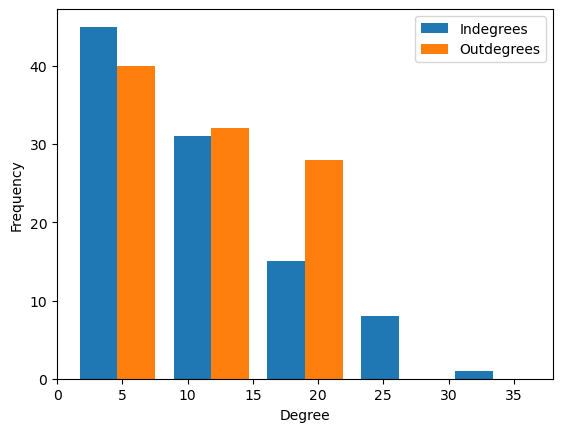

In [82]:
# Let's briefly look at degree distributions
indegrees = [val for (node, val) in superstar_network_restricted.in_degree()]
outdegrees = [val for (node, val) in superstar_network_restricted.out_degree()]

In = np.array(indegrees)
Out = np.array(outdegrees)

plt.hist([In, Out], bins=5, label=['Indegrees', 'Outdegrees'])
plt.legend(loc='upper right')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


In [83]:
# Eigenvector centrality
print(nx.eigenvector_centrality(superstar_network_restricted))
print(nx.eigenvector_centrality(superstar_network_restricted.reverse()))

{'Taylor Swift': 0.0006010536877836652, 'Selena Gomez': 0.05574101299144955, 'Olivia Rodrigo': 0.00811954722672034, 'Katy Perry': 0.027829535689038818, 'Ariana Grande': 0.015694419663342257, 'Harry Styles': 0.04151581175076523, 'Camila Cabello': 0.10528272870723873, 'Demi Lovato': 0.202611891655973, 'One Direction': 0.04100166307770847, 'Meghan Trainor': 0.14448613157159843, 'Shawn Mendes': 0.036721514195000735, 'Miley Cyrus': 0.03681051150726463, 'Sabrina Carpenter': 0.028468327224017237, 'Dua Lipa': 0.027856196477539973, 'Justin Bieber': 0.0031257259115842523, 'Lana Del Rey': 0.0014571224814012248, 'Halsey': 0.11458687703159645, 'Billie Eilish': 0.0024492565920298495, 'Conan Gray': 0.01569862252987821, 'Charlie Puth': 0.01980872055241403, 'ZAYN': 0.07679872631866955, 'Selena Gomez & The Scene': 0.06865211157374634, 'Fifth Harmony': 0.2674848765676514, 'Nick Jonas': 0.2196513458146463, 'Bebe Rexha': 0.3280383382156318, 'Anne-Marie': 0.24100495663848398, 'Little Mix': 0.266215543816862

- Eigenvector Centrality (Direct Graph): This measure evaluates the importance of artists according to their connection to other important artists. Thus, artists with a higher eigenvector centrality are those who are connected to other popular artists. This could indicate artists who are often listened to or followed by the same users, which can be useful for recommending similar music.

- Eigenvector Centrality (Reverse Graph): Looking at the reverse graph, this measure assesses the importance of artists based on their connection to users who listen to many other important artists. Artists with a higher eigenvector centrality in the reverse graph are those whose music is often listened to by users who listen to a lot of popular music. This could be useful for identifying artists whose music is widely appreciated among popular music listeners.

In [84]:
# Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(superstar_network_restricted)
eigenvector_centrality_reverse = nx.eigenvector_centrality(superstar_network_restricted.reverse())

# The 2 artists with the highest Eigenvector Centrality
highest_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:2]
print("The 2 artists with the highest Eigenvector Centrality:")
for artist, centrality in highest_eigenvector:
    print(artist, centrality)

# The 2 artists with the lowest Eigenvector Centrality
lowest_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest Eigenvector Centrality:")
for artist, centrality in lowest_eigenvector:
    print(artist, centrality)

# The 2 artists with the highest Eigenvector Centrality (Reverse Graph)
highest_eigenvector_reverse = sorted(eigenvector_centrality_reverse.items(), key=lambda x: x[1], reverse=True)[:2]
print("\nThe 2 artists with the highest Eigenvector Centrality (Reverse Graph):")
for artist, centrality in highest_eigenvector_reverse:
    print(artist, centrality)

# The 2 artists with the lowest Eigenvector Centrality (Reverse Graph)
lowest_eigenvector_reverse = sorted(eigenvector_centrality_reverse.items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest Eigenvector Centrality (Reverse Graph):")
for artist, centrality in lowest_eigenvector_reverse:
    print(artist, centrality)


The 2 artists with the highest Eigenvector Centrality:
Bebe Rexha 0.3280383382156318
Hailee Steinfeld 0.2903711721417491

The 2 artists with the lowest Eigenvector Centrality:
The Weeknd 0.00018131755504903076
Alan Walker 0.0002313718431333174

The 2 artists with the highest Eigenvector Centrality (Reverse Graph):
Taylor Swift 0.2344390062340561
Justin Bieber 0.23391382583879075

The 2 artists with the lowest Eigenvector Centrality (Reverse Graph):
The Smiths 4.583122266245295e-06
Wallows 5.193978635038766e-05


In [85]:
# Closeness centrality
print(nx.closeness_centrality(superstar_network_restricted)) # uses the inward distance to a node

{'Taylor Swift': 0.2571428571428571, 'Selena Gomez': 0.38372093023255816, 'Olivia Rodrigo': 0.34494773519163763, 'Katy Perry': 0.35106382978723405, 'Ariana Grande': 0.3402061855670103, 'Harry Styles': 0.3613138686131387, 'Camila Cabello': 0.396, 'Demi Lovato': 0.41596638655462187, 'One Direction': 0.33, 'Meghan Trainor': 0.4230769230769231, 'Shawn Mendes': 0.33221476510067116, 'Miley Cyrus': 0.35106382978723405, 'Sabrina Carpenter': 0.4125, 'Dua Lipa': 0.3707865168539326, 'Justin Bieber': 0.2531969309462916, 'Lana Del Rey': 0.2886297376093295, 'Halsey': 0.4248927038626609, 'Billie Eilish': 0.29464285714285715, 'Conan Gray': 0.4057377049180328, 'Charlie Puth': 0.3, 'ZAYN': 0.3680297397769517, 'Selena Gomez & The Scene': 0.32247557003257327, 'Fifth Harmony': 0.41422594142259417, 'Nick Jonas': 0.39759036144578314, 'Bebe Rexha': 0.4876847290640394, 'Anne-Marie': 0.40408163265306124, 'Little Mix': 0.45622119815668205, 'Zara Larsson': 0.4107883817427386, 'Hailee Steinfeld': 0.447963800904977

Closeness centrality measures how close a node is to other nodes in the graph, indicating how quickly information can spread from that node to other nodes.

In the context of recommendations for artists on Spotify, closeness centrality can help identify artists who are more central in the network and thus potentially more influential or connected to other artists. Artists with higher closeness centrality values are those that can quickly influence or be influenced by other artists in the network, making them potentially more important for recommendations or collaborations.

In [86]:
# Compute closeness centrality for each artist
closeness_centrality_scores = nx.closeness_centrality(superstar_network_restricted)

# Sort the artists by their closeness centrality scores
sorted_closeness_centrality = sorted(closeness_centrality_scores.items(), key=lambda x: x[1], reverse=True)

# Print the top 2 artists with the highest closeness centrality
print("Top 2 artists with the highest closeness centrality:")
for artist, centrality in sorted_closeness_centrality[:2]:
    print(artist, centrality)

# Print the bottom 2 artists with the lowest closeness centrality
print("\nBottom 2 artists with the lowest closeness centrality:")
for artist, centrality in sorted_closeness_centrality[-2:]:
    print(artist, centrality)


Top 2 artists with the highest closeness centrality:
Bebe Rexha 0.4876847290640394
Little Mix 0.45622119815668205

Bottom 2 artists with the lowest closeness centrality:
Maroon 5 0.22811059907834103
Alan Walker 0.20245398773006135


In [87]:
# Betweenness centrality
print(nx.betweenness_centrality(superstar_network_restricted))

{'Taylor Swift': 0.0052402938615619425, 'Selena Gomez': 0.023535439262042872, 'Olivia Rodrigo': 0.07968964473750745, 'Katy Perry': 0.025764685636613653, 'Ariana Grande': 0.04101435063309389, 'Harry Styles': 0.05617605285810015, 'Camila Cabello': 0.02608666860209169, 'Demi Lovato': 0.02713841344714693, 'One Direction': 0.05301035886030417, 'Meghan Trainor': 0.03738729594042057, 'Shawn Mendes': 0.009288144044365886, 'Miley Cyrus': 0.022843919131555736, 'Sabrina Carpenter': 0.1770695752601541, 'Dua Lipa': 0.04178979641083632, 'Justin Bieber': 0.022170424592084507, 'Lana Del Rey': 0.04151729736048484, 'Halsey': 0.04715127641217805, 'Billie Eilish': 0.030688855351068363, 'Conan Gray': 0.15721190505600383, 'Charlie Puth': 0.0029487317862891566, 'ZAYN': 0.01148893603353991, 'Selena Gomez & The Scene': 0.012863377248505005, 'Fifth Harmony': 0.018486661380227615, 'Nick Jonas': 0.015343223786573906, 'Bebe Rexha': 0.059509485236613154, 'Anne-Marie': 0.010514863076029925, 'Little Mix': 0.032036907

Betweenness centrality measures the extent to which a node lies on the shortest paths between other nodes in the network. 

In the context of Spotify artist recommendations, nodes with high betweenness centrality act as bridges connecting different parts of the artist network. Artists with high betweenness centrality are likely to have a significant influence on the flow of information or recommendations between other artists. They may serve as key influencers or connectors within the network, potentially indicating their importance in facilitating the spread of musical styles or genres across different communities or clusters of artists.

In [88]:
# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(superstar_network_restricted)

# Sort nodes by betweenness centrality in descending order
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 2 artists with the highest betweenness centrality
print("Top 2 artists with the highest betweenness centrality:")
for artist, centrality in sorted_betweenness[:2]:
    print(artist, centrality)

# Print the bottom 2 artists with the lowest betweenness centrality
print("\nBottom 2 artists with the lowest betweenness centrality:")
for artist, centrality in sorted_betweenness[-2:]:
    print(artist, centrality)


Top 2 artists with the highest betweenness centrality:
Sabrina Carpenter 0.1770695752601541
Conan Gray 0.15721190505600383

Bottom 2 artists with the lowest betweenness centrality:
Laura Marano 0.0
The Smiths 0.0


In [89]:
# Compute descriptive statistics 

# Create a list to store centrality measures
centrality_measures = {
    "Eigenvector Centrality": nx.eigenvector_centrality(superstar_network_restricted),
    "Eigenvector Centrality (Reverse)": nx.eigenvector_centrality(superstar_network_restricted.reverse()),
    "Closeness Centrality": nx.closeness_centrality(superstar_network_restricted),
    "Betweenness Centrality": nx.betweenness_centrality(superstar_network_restricted)
}

# Loop through centrality measures
for measure, centrality in centrality_measures.items():
    # Convert centrality values to a numpy array
    centrality_values = np.array(list(centrality.values()))
    
    # Compute statistics
    min_value = np.min(centrality_values)
    max_value = np.max(centrality_values)
    mean_value = np.mean(centrality_values)
    std_deviation = np.std(centrality_values)
    
    # Print statistics
    print(f"{measure} statistics:")
    print(f"Min: {min_value:.2f}")
    print(f"Max: {max_value:.2f}")
    print(f"Mean: {mean_value:.2f}")
    print(f"Standard Deviation: {std_deviation:.2f}\n")


Eigenvector Centrality statistics:
Min: 0.00
Max: 0.33
Mean: 0.06
Standard Deviation: 0.08

Eigenvector Centrality (Reverse) statistics:
Min: 0.00
Max: 0.23
Mean: 0.07
Standard Deviation: 0.07

Closeness Centrality statistics:
Min: 0.20
Max: 0.49
Mean: 0.34
Standard Deviation: 0.06

Betweenness Centrality statistics:
Min: 0.00
Max: 0.18
Mean: 0.02
Standard Deviation: 0.03



- Eigenvector Centrality: This measure indicates the influence of an artist based on the connections they have with other influential artists.
Artists with high eigenvector centrality (closer to 0.33, such as **Bebe Rexha**) are likely to be connected to other influential artists, suggesting that their music might be popular or frequently listened to.
Conversely, artists with low eigenvector centrality (closer to 0, such as **Alan Walker**) might have fewer connections to influential artists, indicating a lower level of popularity or reach.

- Eigenvector Centrality (Reverse): This measure considers the influence of artists based on the connections they receive from other influential artists.
Similar to eigenvector centrality, higher values suggest that the artist receives recommendations or connections from other influential artists, potentially indicating a broader reach or impact.

- Closeness Centrality: It measures how close an artist is to all other artists in the network.
Artists with higher closeness centrality (closer to 0.49, such as **Bebe Rexha**) are more central in the network and may have closer connections to a broader range of artists.
Lower closeness centrality values (closer to 0.20, such as **Alan Walker**) suggest that the artist is less central and may not be as closely connected to other artists.

- Betweenness Centrality: It quantifies the extent to which an artist lies on paths between other artists in the network.
Artists with higher betweenness centrality (closer to 0.18, such as **Sabrina Carpenter**) act as bridges or intermediaries between different clusters or communities of artists.
Lower betweenness centrality values (closer to 0, such as **The Smiths**) indicate that the artist has less influence over the flow of recommendations between other artists.

In summary, these centrality measures help identify influential artists who play a significant role in connecting different parts of the Spotify artist network and may have a greater impact on music recommendations.

## Vizualization

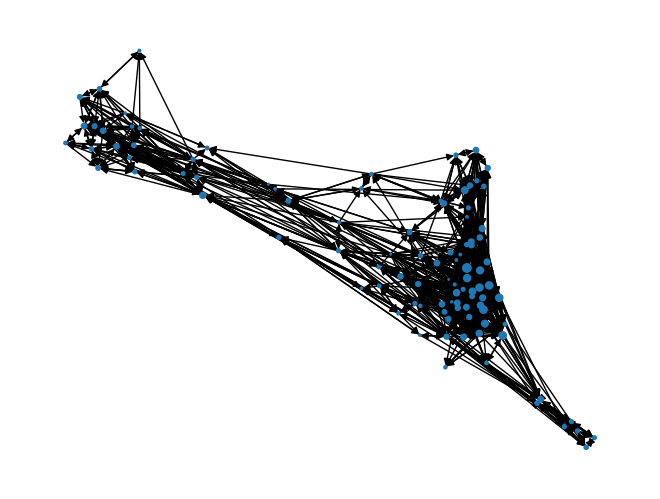

In [90]:
# change node size to reflect indegree

indeg = superstar_network_restricted.in_degree   # sets up the indegree view
indegs = [d for n, d in indeg]   # gets all nodes' degree values 

# draw plot (color = office)
nx.draw(superstar_network_restricted, pos=nx.fruchterman_reingold_layout(superstar_network_restricted), with_labels=False,
        #node_color=node_color, edge_color = "gray", 
        node_size=indegs)
plt.show()


# IV - Personal networks, ego networks

In [93]:
TS_ego = pd.read_csv('Taylor_Swift_Attr_Network.csv')
TS_ego = TS_ego[TS_ego['Artist_Name'] == 'Taylor Swift']

In [94]:
node_names_to_keep = list(superstar_network_restricted.nodes())

In [95]:
len(node_names_to_keep)

100

In [101]:
Network_TS = pd.read_csv('Taylor_Swift_Attr_Network.csv')
Network_TS = Network_TS[Network_TS['Artist_Name'].isin(node_names_to_keep)]

In [102]:
Network_TS.head()

Artist_Name  NB_Followers                    Genres  Popularity  \
0    Taylor Swift     107849786                   ['pop']         100   
1    Selena Gomez      48935201  ['pop', 'post-teen pop']          82   
2  Olivia Rodrigo      35051616                   ['pop']          90   
3      Katy Perry      32631137                   ['pop']          84   
4   Ariana Grande      95909921                   ['pop']          94   

     Nationality   Age  Death    Type  Gender  Total_Release  ...  \
0  United States  35.0  False  Person  female             20  ...   
1  United States  32.0  False  Person  female             20  ...   
2  United States  21.0  False  Person  female             20  ...   
3  United States  40.0  False  Person  female             20  ...   
4  United States  31.0  False  Person  female             20  ...   

   Acousticness  Danceability    Duration_MS    Energy  Instrumentalness  \
0      0.246333      0.516000  200141.333333  0.629333          0.000013   
1      0.331210      0.632333  205810.666667  0.572000          0.000427   
2      0.260967      0.545333  201924.333333  0.577000          0.000002   
3      0.026430      0.604333  222450.666667  0.693333          0.000011   
4      0.310233      0.643667  178677.666667  0.600667          0.000036   

   Liveness  Loudness  Speechiness       Tempo   Valence  
0  0.121667 -6.620000     0.100267  111.845333  0.516667  
1  0.170667 -6.610000     0.052967  104.945667  0.551933  
2  0.322000 -6.020333     0.087100  146.302333  0.408333  
3  0.408000 -5.006333     0.042933  139.257000  0.549333  
4  0.119700 -8.114667     0.048100  106.513667  0.490333  

[5 rows x 23 columns]

In [103]:
Network_TS.shape

(100, 23)

In [106]:
Alters_TS = pd.read_csv('Taylor_Swift_Attr_Ego.csv')
print(Alters_TS)

          Artist_Name  NB_Followers  \
0        Selena Gomez      48935201   
1      Olivia Rodrigo      35051616   
2          Katy Perry      32631137   
3       Ariana Grande      95909921   
4        Harry Styles      31800889   
5      Camila Cabello      32731995   
6         Demi Lovato      26268422   
7       One Direction      34665508   
8      Meghan Trainor      14768882   
9        Shawn Mendes      42504842   
10        Miley Cyrus      23674452   
11  Sabrina Carpenter       7889180   
12           Dua Lipa      43115951   
13      Justin Bieber      74590772   
14       Lana Del Rey      34155145   
15             Halsey      21394280   
16      Billie Eilish      93448247   
17         Conan Gray       9507124   
18       Charlie Puth      22437304   
19               ZAYN      22827094   

                                               Genres  Popularity  \
0                            ['pop', 'post-teen pop']          82   
1                                         

In [107]:
# use pandas to import edgelist (of Ego Taylor swift) as a table
EgoEdgesTS = pd.read_table('Taylor_Swift_Ego.txt', sep=',')
EgoEdgesTS

Node1           Node2
0     Justin Bieber            ZAYN
1     Justin Bieber    Shawn Mendes
2     Justin Bieber    Selena Gomez
3     Justin Bieber    Charlie Puth
4     Justin Bieber  Camila Cabello
..              ...             ...
138  Olivia Rodrigo    Lana Del Rey
139  Olivia Rodrigo    Selena Gomez
140  Olivia Rodrigo        Dua Lipa
141  Olivia Rodrigo  Camila Cabello
142  Olivia Rodrigo   One Direction

[143 rows x 2 columns]

In [108]:
# generate graph from pandas edgelist
# it is an directed graph
EgoNetTS = nx.from_pandas_edgelist(EgoEdgesTS, 'Node1', 'Node2', create_using=nx.DiGraph()) 
print(EgoNetTS)

DiGraph with 20 nodes and 143 edges


In [109]:
# Match nodes of graph with attributes of nodes
NodeData = Alters_TS.set_index('Artist_Name').to_dict('index').items()
EgoNetTS.add_nodes_from(NodeData)

# View results
print(EgoNetTS.nodes(data=True))

[('Justin Bieber', {'NB_Followers': 74590772, 'Genres': "['canadian pop', 'pop']", 'Popularity': 89, 'Nationality': 'Canada', 'Age': 30.0, 'Death': False, 'Type': 'Person', 'Gender': 'male', 'Total_Release': 20, 'Available_Markets': 185, 'Year_Last_Release': 2023, 'Type_Last_Release': 'album', 'Acousticness': 0.3527666666666667, 'Danceability': 0.6003333333333333, 'Duration_MS': 176238.66666666666, 'Energy': 0.6276666666666667, 'Instrumentalness': 9.7e-06, 'Liveness': 0.266, 'Loudness': -6.960333333333334, 'Speechiness': 0.1780333333333333, 'Tempo': 141.43533333333335, 'Valence': 0.478}), ('ZAYN', {'NB_Followers': 22827094, 'Genres': "['pop', 'uk pop']", 'Popularity': 77, 'Nationality': 'England', 'Age': 31.0, 'Death': False, 'Type': 'Person', 'Gender': 'male', 'Total_Release': 20, 'Available_Markets': 183, 'Year_Last_Release': 2024, 'Type_Last_Release': 'album', 'Acousticness': 0.0925333333333333, 'Danceability': 0.5246666666666666, 'Duration_MS': 229635.66666666663, 'Energy': 0.52733

In [110]:
# View edges
print(EgoNetTS.edges(data=True))

[('Justin Bieber', 'ZAYN', {}), ('Justin Bieber', 'Shawn Mendes', {}), ('Justin Bieber', 'Selena Gomez', {}), ('Justin Bieber', 'Charlie Puth', {}), ('Justin Bieber', 'Camila Cabello', {}), ('Justin Bieber', 'One Direction', {}), ('Justin Bieber', 'Ariana Grande', {}), ('Justin Bieber', 'Demi Lovato', {}), ('Justin Bieber', 'Dua Lipa', {}), ('Justin Bieber', 'Miley Cyrus', {}), ('Justin Bieber', 'Halsey', {}), ('Justin Bieber', 'Harry Styles', {}), ('ZAYN', 'Shawn Mendes', {}), ('ZAYN', 'One Direction', {}), ('ZAYN', 'Harry Styles', {}), ('ZAYN', 'Camila Cabello', {}), ('ZAYN', 'Charlie Puth', {}), ('ZAYN', 'Halsey', {}), ('Shawn Mendes', 'Camila Cabello', {}), ('Shawn Mendes', 'Charlie Puth', {}), ('Shawn Mendes', 'ZAYN', {}), ('Shawn Mendes', 'Demi Lovato', {}), ('Shawn Mendes', 'One Direction', {}), ('Shawn Mendes', 'Selena Gomez', {}), ('Shawn Mendes', 'Halsey', {}), ('Selena Gomez', 'Camila Cabello', {}), ('Selena Gomez', 'Demi Lovato', {}), ('Selena Gomez', 'Katy Perry', {}), ('S

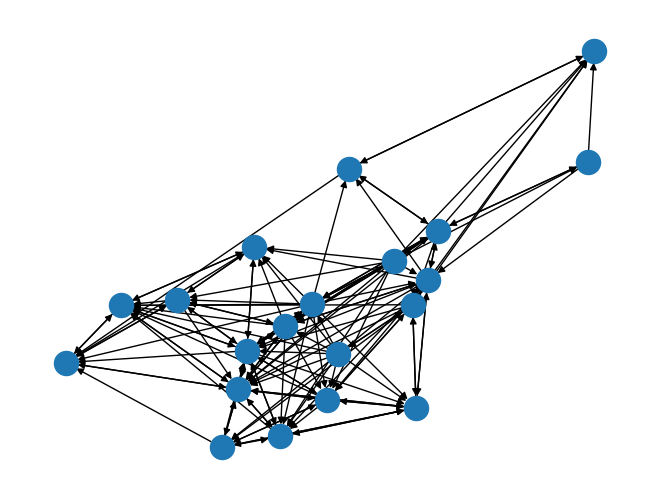

In [111]:
# Draw graph
nx.draw(EgoNetTS)
plt.show()

## A - Overall network composition indicators

### A1 - Numerical variables

In [112]:
# Is the whole network homogeneous ? 

for column in Network_TS.select_dtypes(include=['float64', 'int64']).columns:
    print("Column:", column)
    print("Taylor Swift's", column, TS_ego[column].iloc[0])
    print("Mean:", Network_TS[column].mean())
    print("Variance:", Network_TS[column].var())
    print("Standard Deviation:", Network_TS[column].std())
    print("Quantiles:", Network_TS[column].quantile([0.25, 0.5, 0.75]))
    print("Minimum:", Network_TS[column].min())
    print("Maximum:", Network_TS[column].max())
    print("\n")

Column: NB_Followers
Taylor Swift's NB_Followers 107849786
Mean: 19132926.32
Variance: 541894629505545.7
Standard Deviation: 23278630.3185034
Quantiles: 0.25     5493216.75
0.50     9900923.50
0.75    23816156.50
Name: NB_Followers, dtype: float64
Minimum: 790352
Maximum: 113852847


Column: Popularity
Taylor Swift's Popularity 100
Mean: 76.79
Variance: 103.15747474747475
Standard Deviation: 10.156646825969423
Quantiles: 0.25    72.0
0.50    78.0
0.75    84.0
Name: Popularity, dtype: float64
Minimum: 42
Maximum: 100


Column: Age
Taylor Swift's Age 35.0
Mean: 28.33
Variance: 94.62737373737374
Standard Deviation: 9.727660239614341
Quantiles: 0.25    24.75
0.50    29.50
0.75    34.00
Name: Age, dtype: float64
Minimum: 4.0
Maximum: 55.0


Column: Total_Release
Taylor Swift's Total_Release 20
Mean: 19.71
Variance: 3.0362626262626264
Standard Deviation: 1.7424874823833387
Quantiles: 0.25    20.0
0.50    20.0
0.75    20.0
Name: Total_Release, dtype: float64
Minimum: 6
Maximum: 20


Column: A

**Variability in Artist Characteristics:**

The network comprises 191,329,264 followers on average per artist, with a standard deviation of 23,278,630, indicating significant variability in follower counts.

Popularity scores range from 42 to 100, with an average popularity of 76.79 and a standard deviation of 10.16, showcasing the diversity in artists' levels of popularity.

- Age Distribution: The age of artists in the network spans from 4 to 55 years, with an average age of 28.33 and a standard deviation of 9.73, highlighting the diversity of artists across different stages of their careers.

- Music Availability and Market Reach: Artists' music is available in an average of 182.01 markets, with a standard deviation of 10.92, indicating broad accessibility across various regions.

- Consistency in Releases: On average, artists have released 19.71 albums, with minimal variance (3.04), suggesting a relatively consistent release pattern across the network.

- Audio Characteristics: The network exhibits diverse audio features, such as:
    - Acousticness: Ranging from 0.017 to 0.903, with an average of 0.19 and a standard deviation of 0.16.
    - Danceability: Ranging from 0.375 to 0.867, with an average of 0.63 and a standard deviation of 0.09.
    - Energy: Ranging from 0.214 to 0.887, with an average of 0.65 and a standard deviation of 0.12.
    - Instrumentalness: Ranging from 0.0 to 0.699, with an average of 0.02 and a standard deviation of 0.09.
    - Tempo: Ranging from 83.51 to 156.98 BPM, with an average of 122.99 and a standard deviation of 15.68.
    - Valence: Ranging from 0.149 to 0.847, with an average of 0.50 and a standard deviation of 0.15.

**In summary, the network encapsulates a diverse array of artists with varying levels of popularity, age, music availability, and audio characteristics. This rich tapestry of talent contributes to the dynamic nature of the music ecosystem, providing audiences with a wide range of musical experiences and genres.**

**Comparison with Taylor Swift:** Taylor Swift emerges as a standout artist within the network, characterized by her exceptionally high follower count, popularity, and global reach. While she shares some similarities with other artists in terms of discography and age, her widespread acclaim and consistent presence in the music industry set her apart from the average artist in the network.

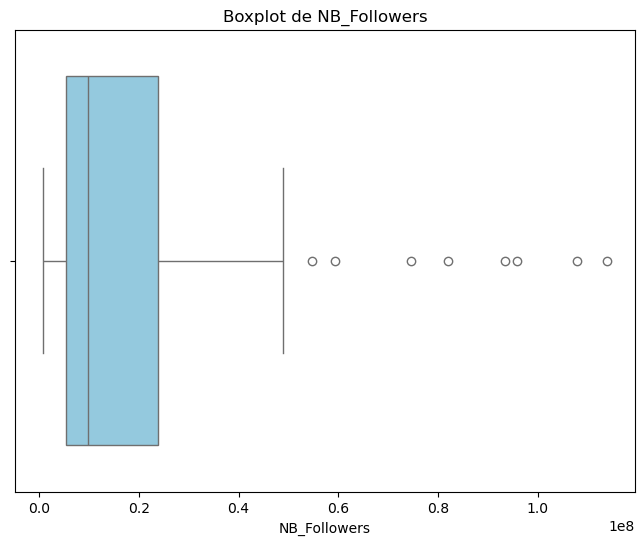

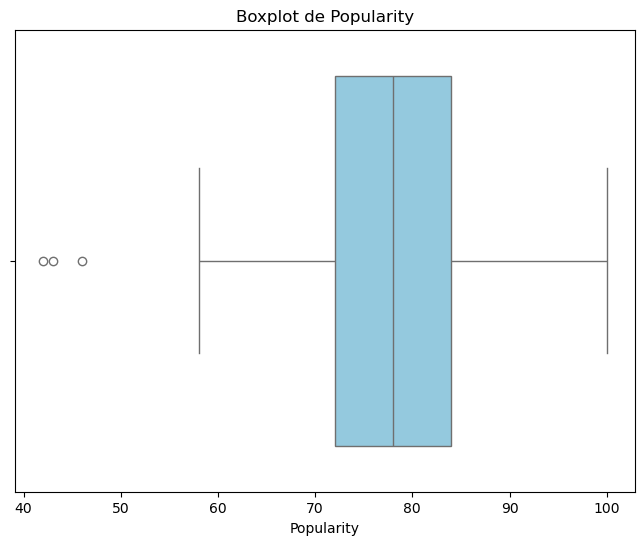

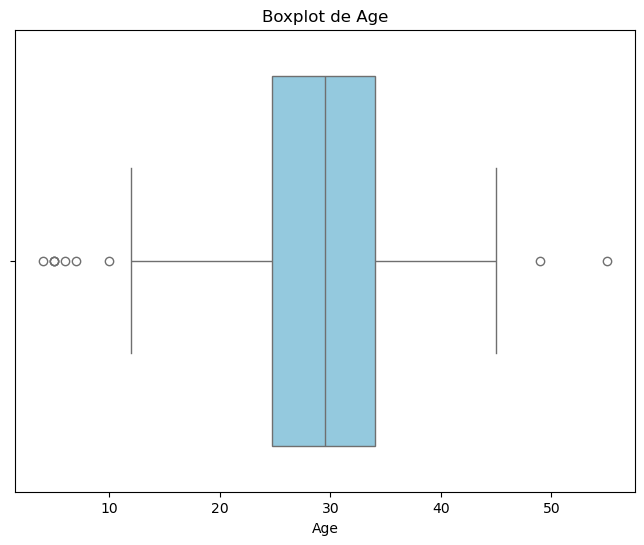

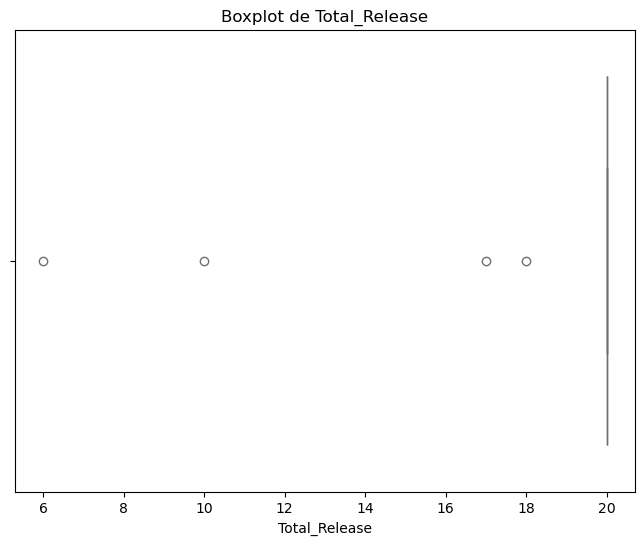

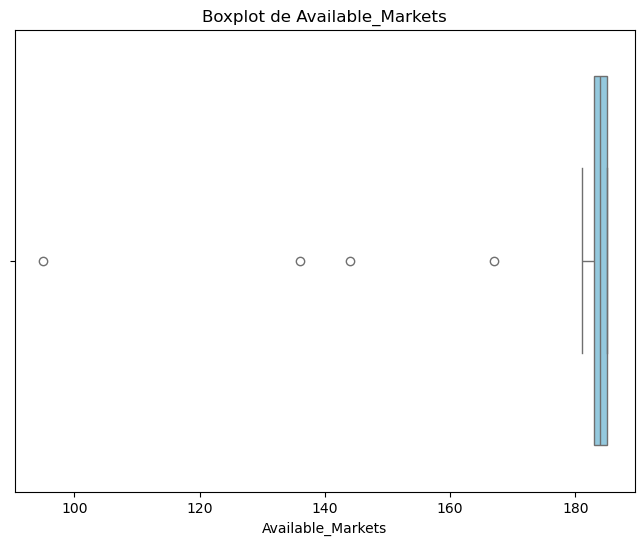

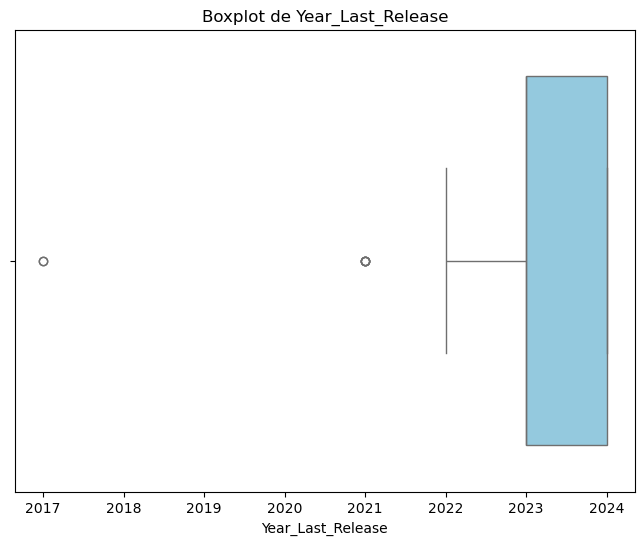

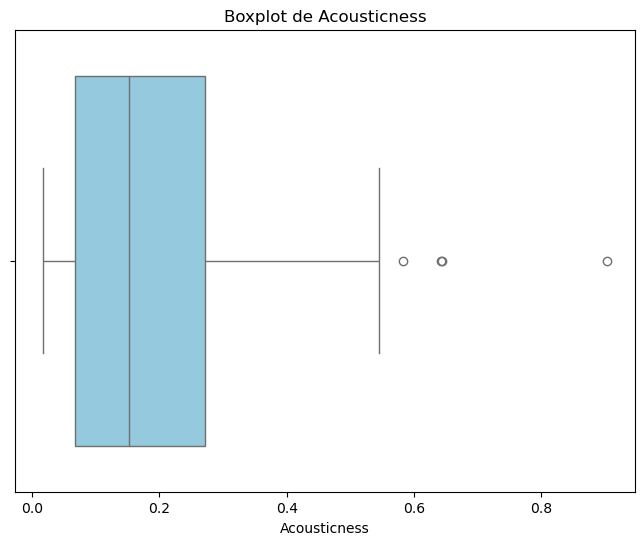

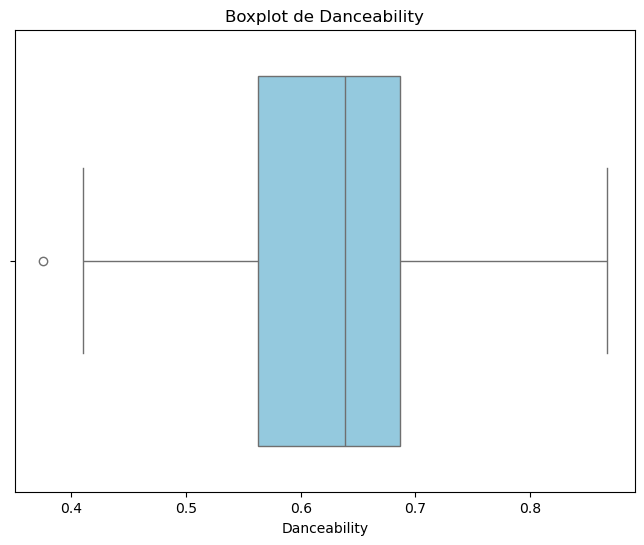

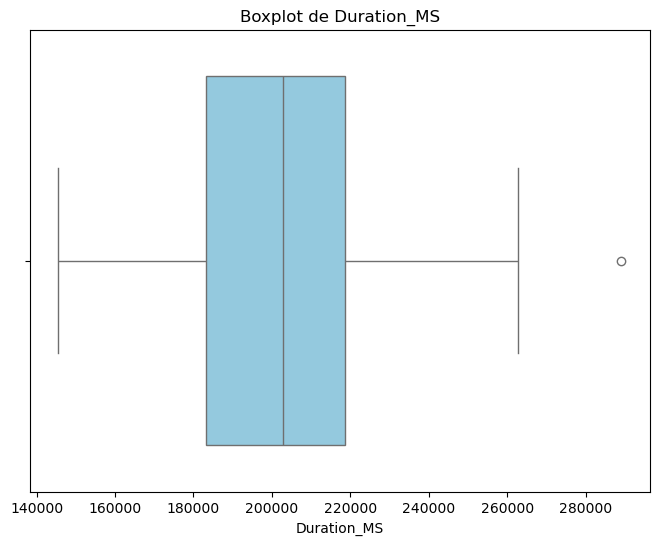

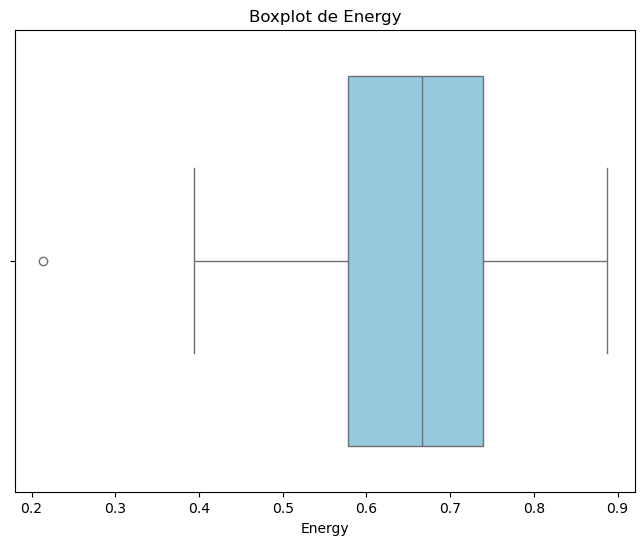

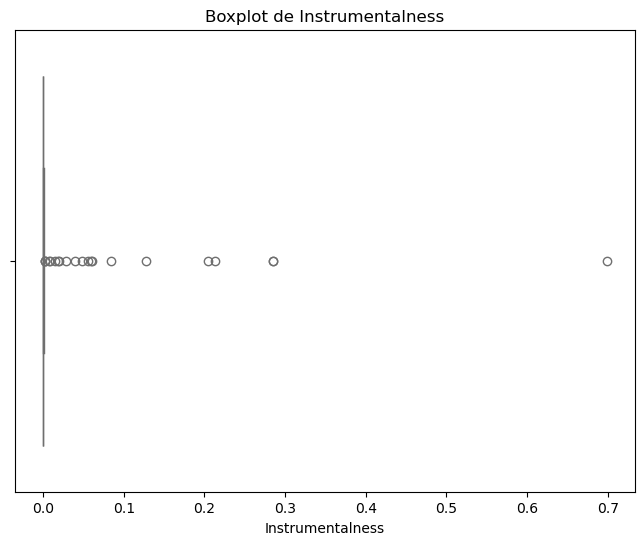

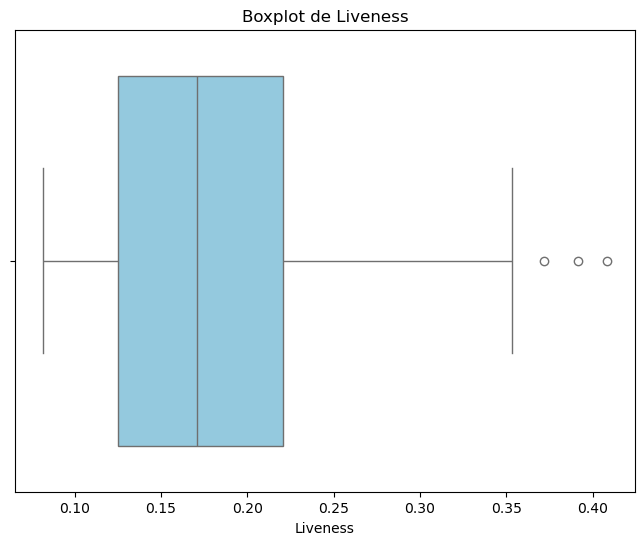

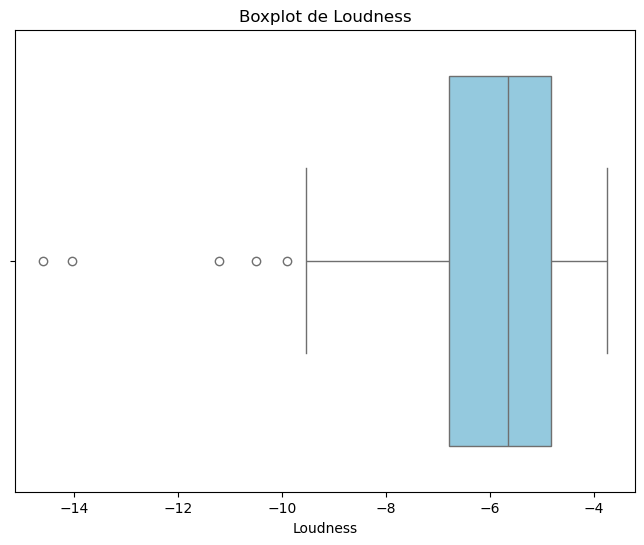

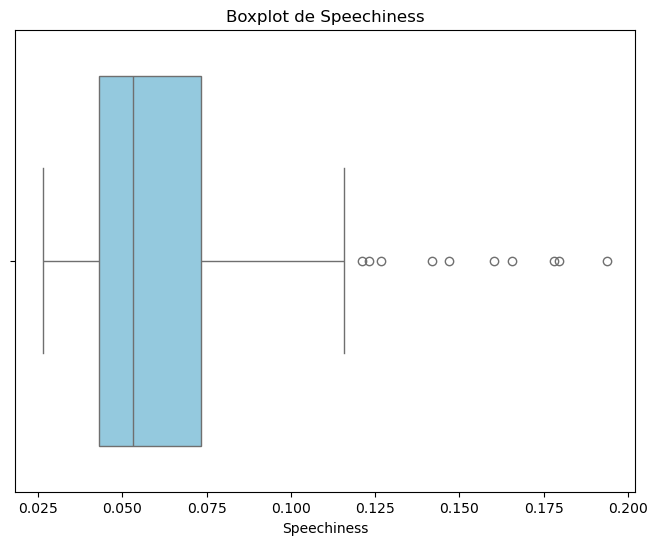

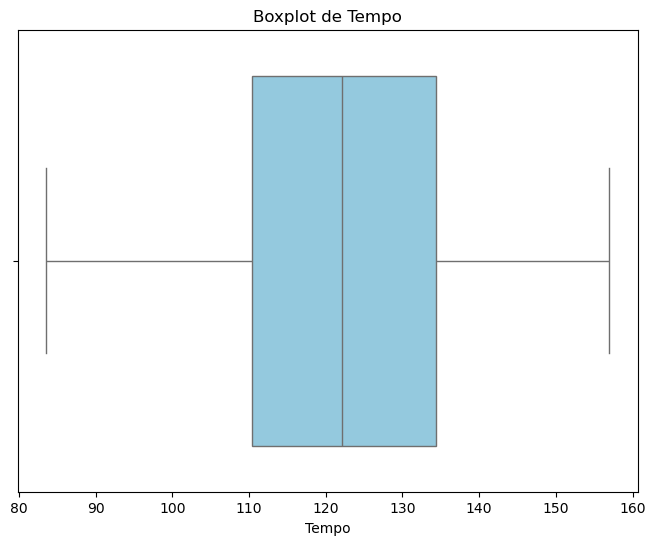

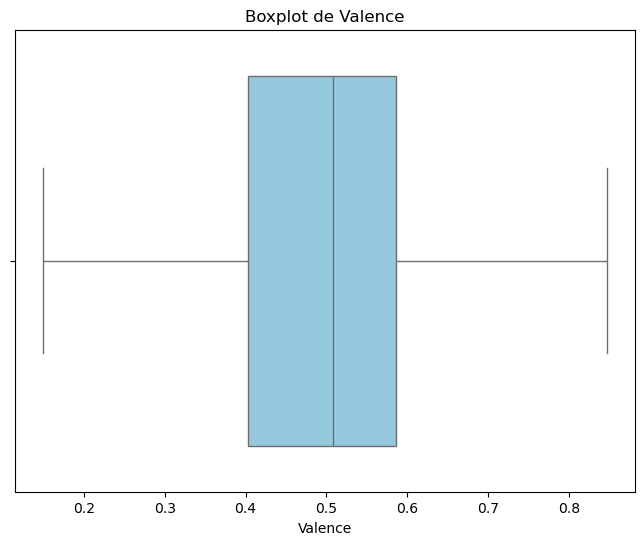

In [113]:
# Draw boxplots for all numerical variables

numeric_columns = Network_TS.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=Network_TS[column], color='skyblue')
    plt.title(f'Boxplot de {column}')
    plt.show()

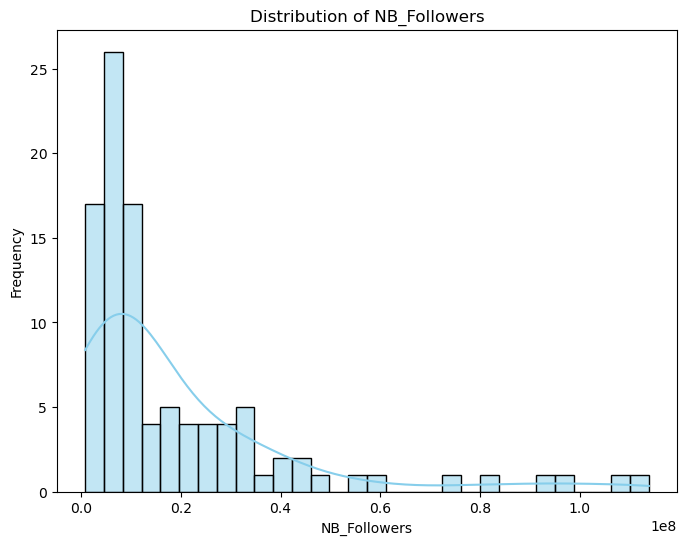

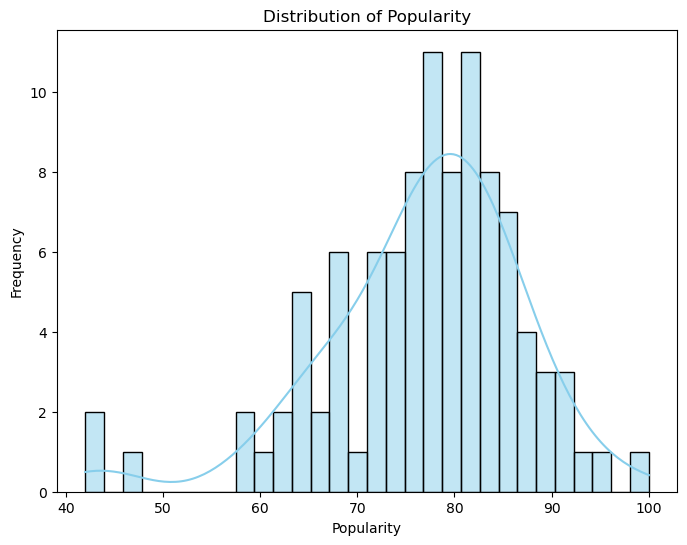

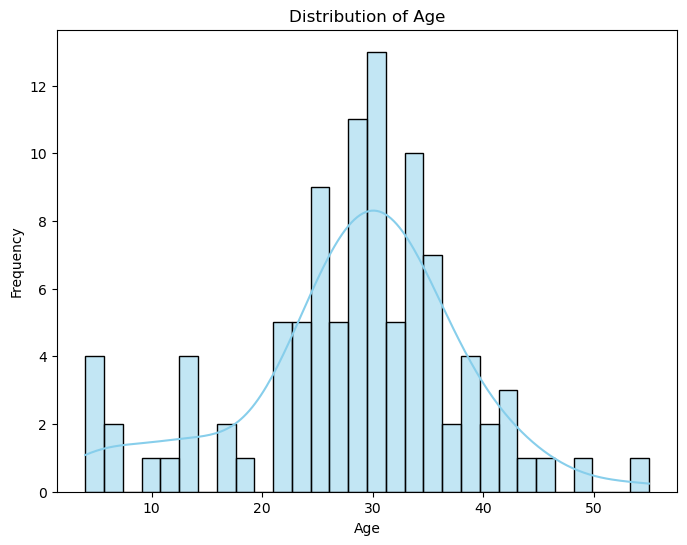

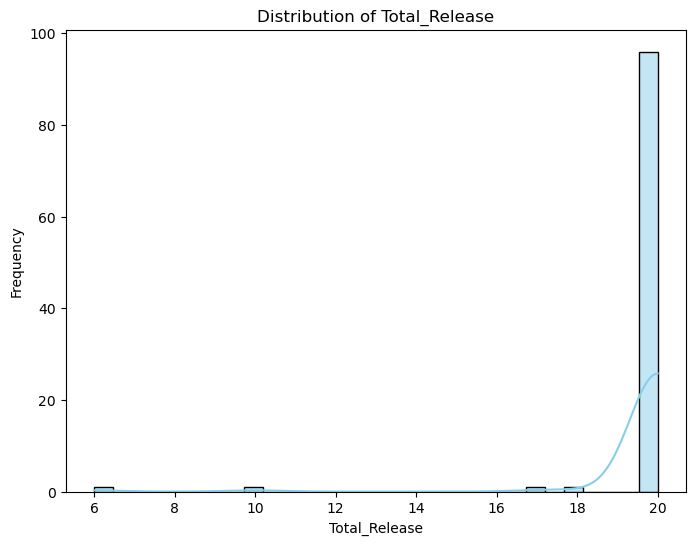

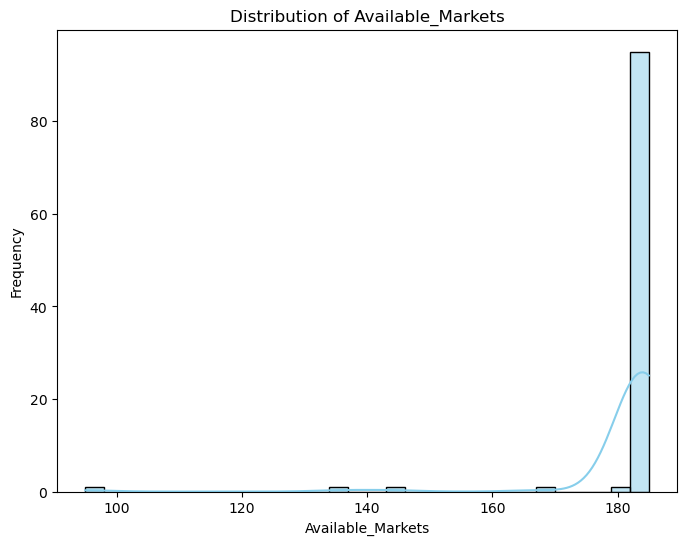

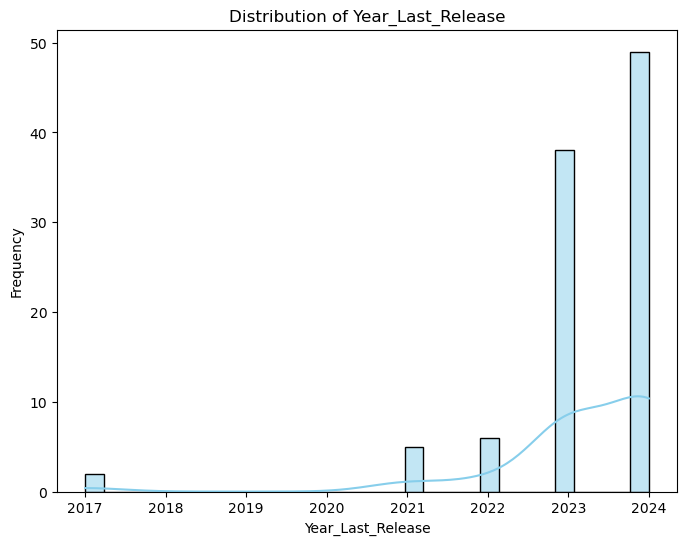

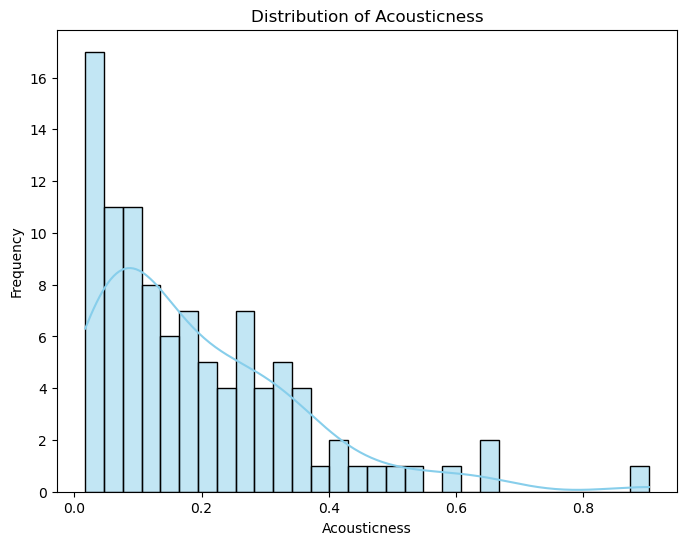

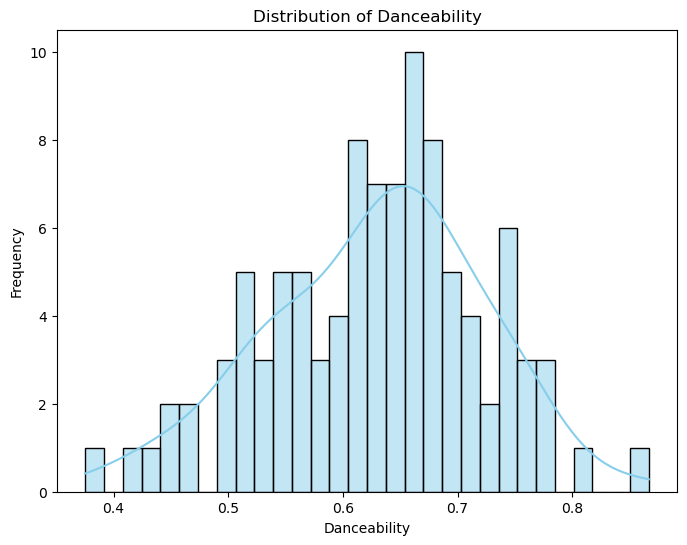

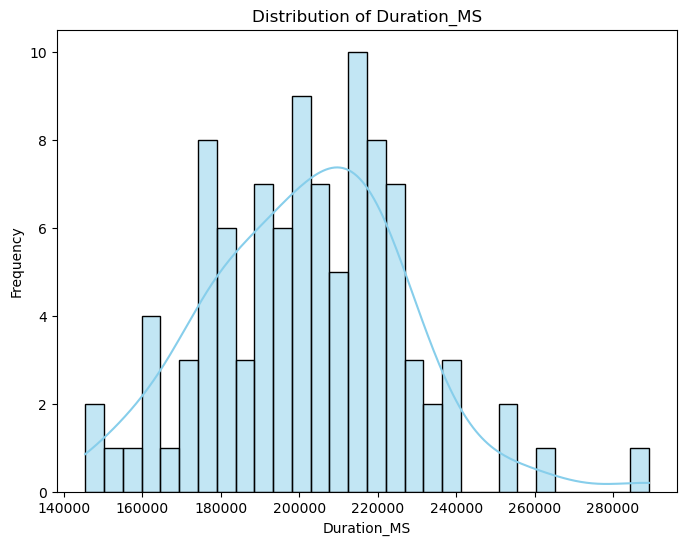

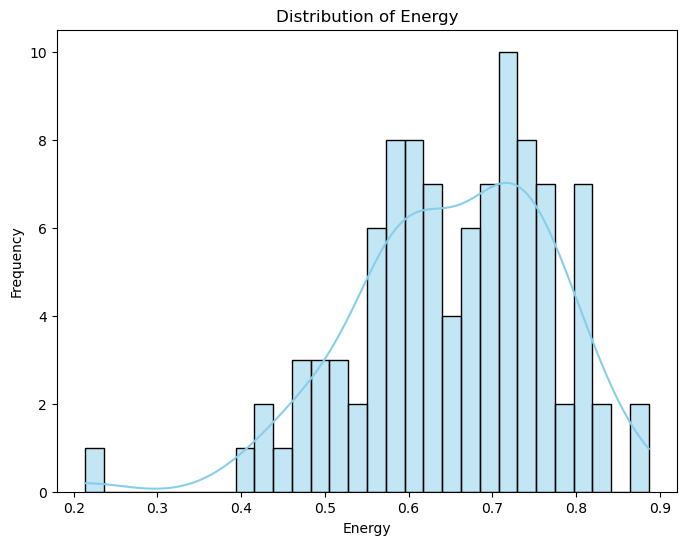

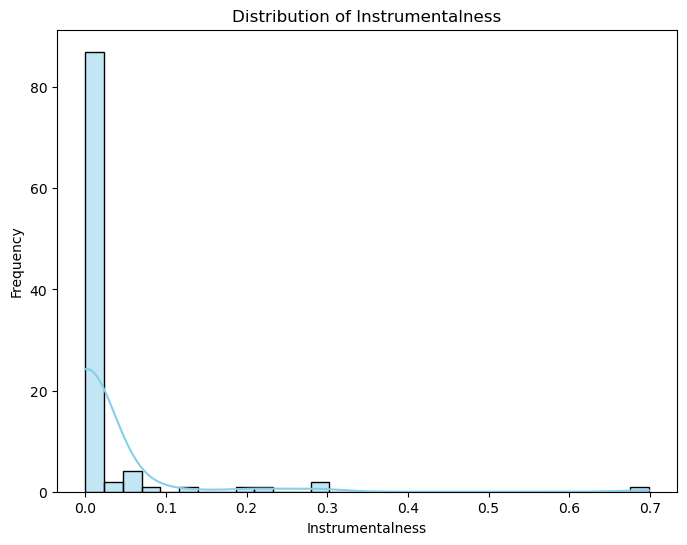

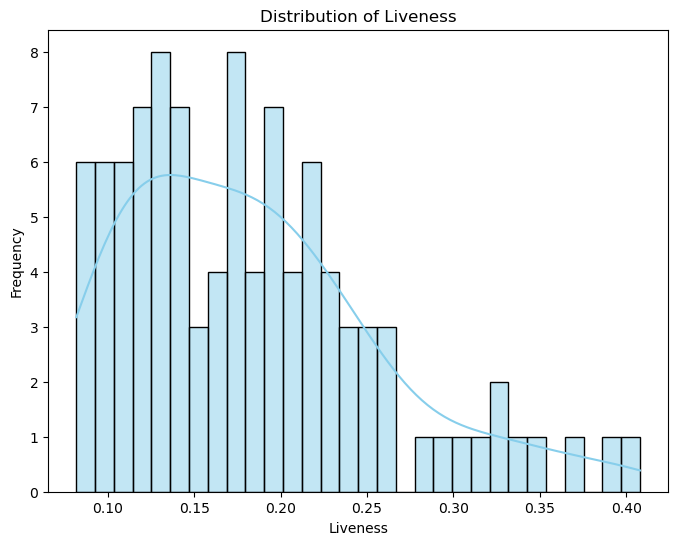

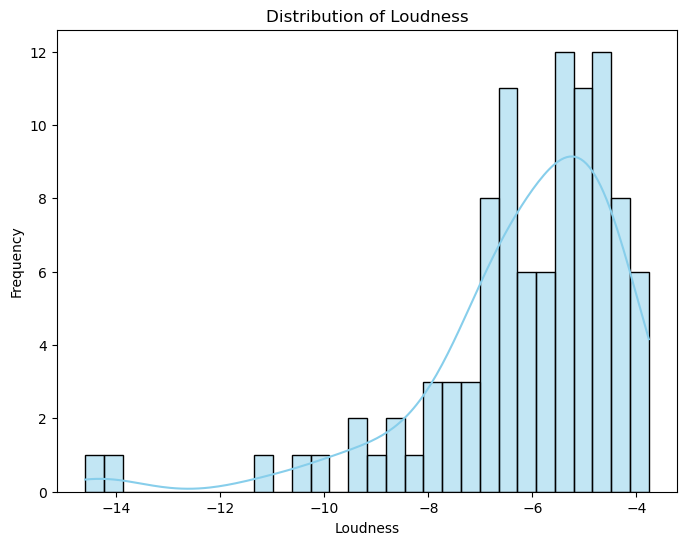

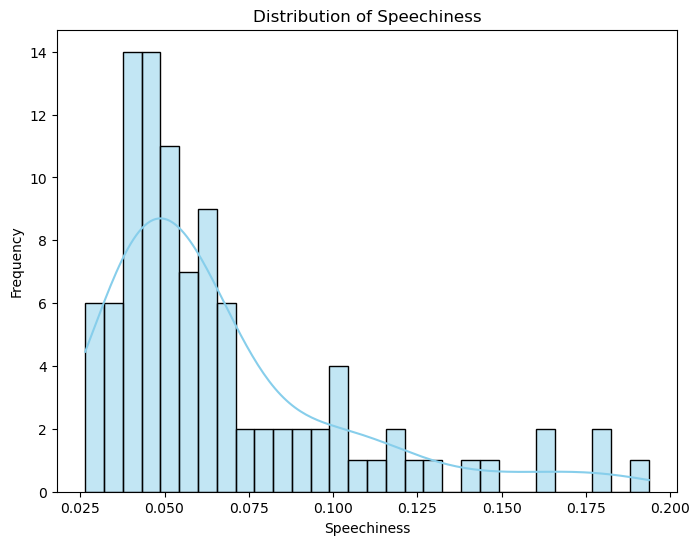

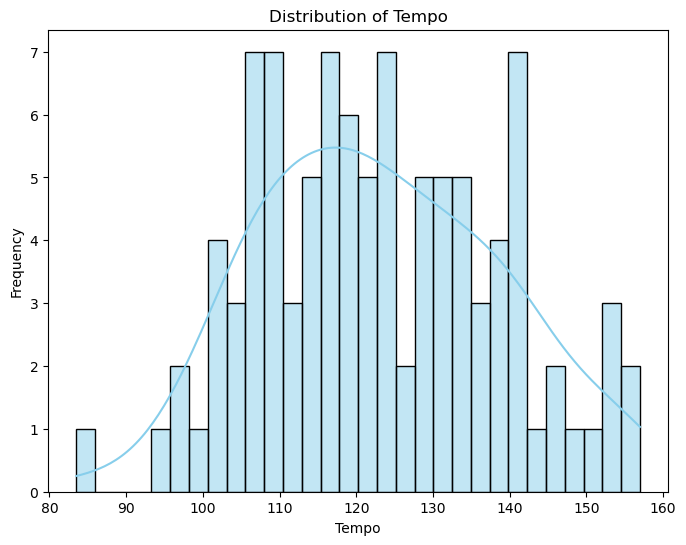

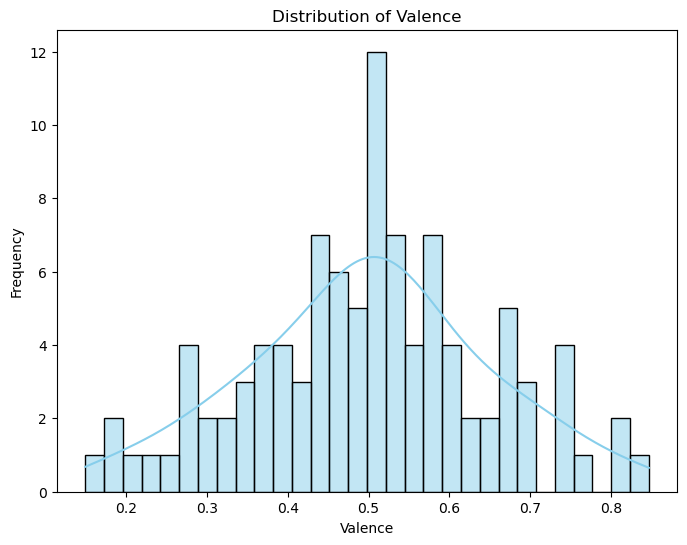

In [114]:
numeric_columns = Network_TS.select_dtypes(include=['float64', 'int64']).columns

# Draw distribution plots for numerical variables 
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=Network_TS, x=column, kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### A2 - Categorical variables

In [115]:
# Define a function to compare categorical variables
def compare_categorical_variable(df_1, df_2, variable):
    print(f"Comparison of {variable}:")
    print(f"Taylor Swift's {variable}: {df_1[variable].iloc[0]}")
    print(f"Taylor Swift's alters {variable}:")
    print(df_2[[variable]].value_counts(normalize=True) * 100)
    print("\n")

# Loop through each categorical variable
for col in Network_TS.select_dtypes(include='object').columns:
    if col != "Artist_Name":
        compare_categorical_variable(TS_ego, Network_TS, col)


Comparison of Genres:
Taylor Swift's Genres: ['pop']
Taylor Swift's alters Genres:
Genres                                                                                       
['pop']                                                                                          20.0
['dance pop', 'pop']                                                                              9.0
['post-teen pop']                                                                                 4.0
['pop', 'post-teen pop']                                                                          4.0
['boy band', 'pop']                                                                               3.0
['art pop', 'pop']                                                                                2.0
['dance pop', 'pop', 'uk pop']                                                                    2.0
['pov: indie']                                                                                    2.0
['bedro

- **Genres:**
In the whole network, the most common genre is "pop," followed by variations such as "dance pop," "post-teen pop," and "art pop." This indicates a diverse range of musical styles among the alters, with a predominant focus on popular music genres.

- **Nationality:**
In the whole network, the majority are also from the United States, followed by individuals from the United Kingdom, England, Canada, and Australia. This suggests that the network is primarily composed of artists from English-speaking countries, with a notable presence from the United States.

- **Type:**
In the whole network, the majority are also classified as "Person," indicating individual artists. However, there are also some groups and characters represented within the network, albeit to a lesser extent.

- **Gender:**
In the whole network, the majority are also female, followed by males and groups. Additionally, there is a small percentage of non-binary individuals represented in the network. This suggests a diverse representation of genders within the network, with a slight skew towards female artists.

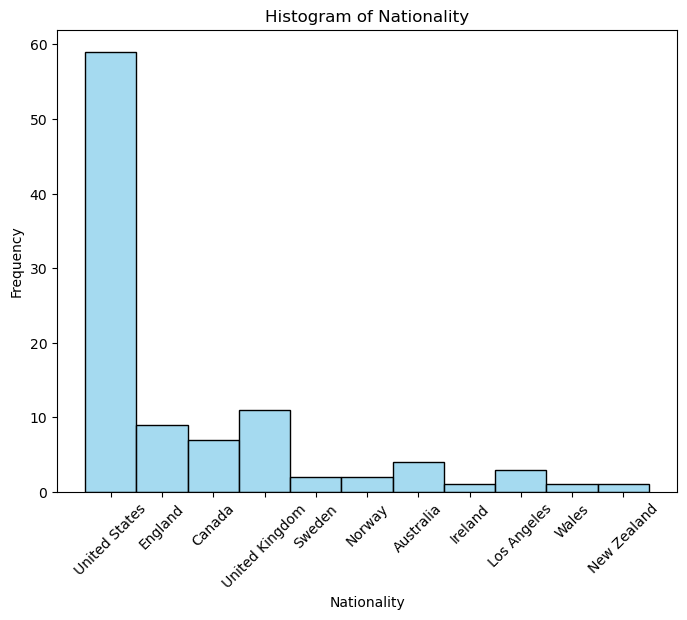

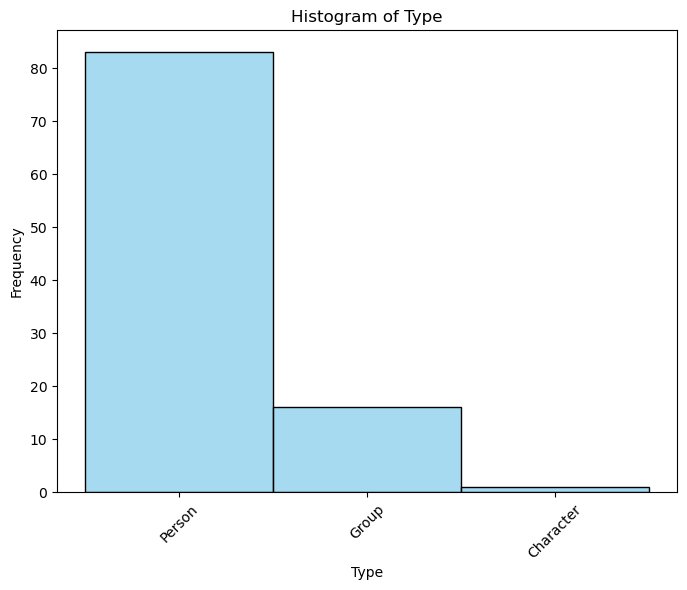

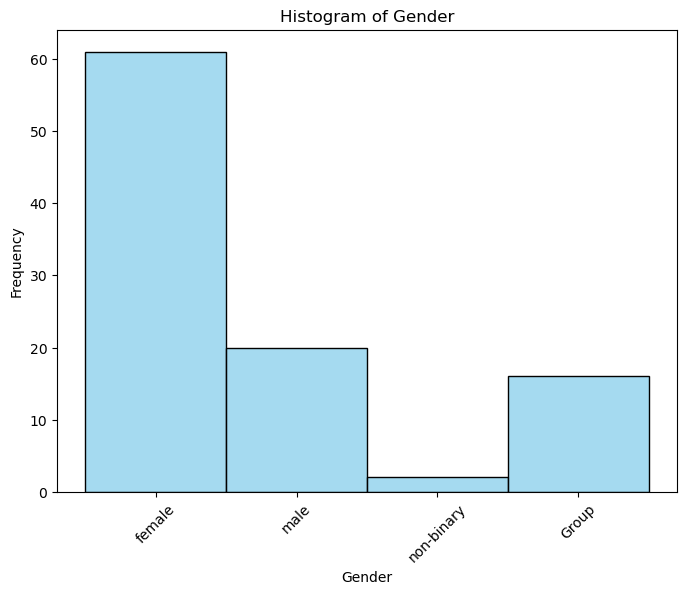

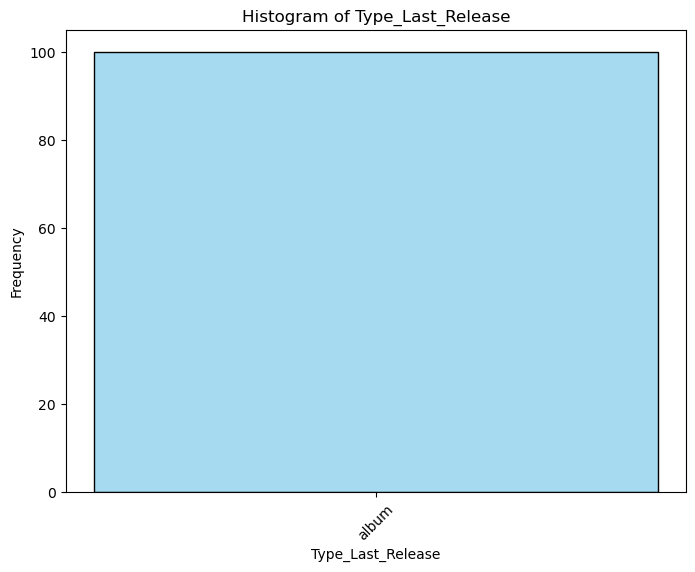

In [116]:
# Loop through each categorical variable except "Artist_Name"
for col in Network_TS.select_dtypes(include='object').columns:
    if col != "Artist_Name" and col != "Genres":
        plt.figure(figsize=(8, 6))
        sns.histplot(data=Network_TS, x=col, color='skyblue', discrete=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()

In [117]:
## Blau index (for a categorical variable with more than 2 categories)

# Function
def blau(df, col):
    return (1- ((df[col].value_counts() / df[col].count()) ** 2).sum())
    
# List to store Blau index results
blau_results = {}

# List to store Index of Qualitative Variation results
# This is a normalized version of Blau
# It is equal to Blau * k/(k-1), where k is the number of categories
iqv_results = {}

# List to store Herfindahl-Hirschman index (HHI) results
# equal to 1 - Blau
hhi_results = {}

# Loop through categorical columns except "Artist_Name"
for col in Network_TS.select_dtypes(include='object').columns:
    if col != "Artist_Name" and Network_TS[col].nunique() > 2:  # Check if the column has more than 2 distinct categories
        blau_results[col] = blau(Network_TS, col)  # Calculate Blau index and store the result
        iqv_results[col] = blau(Network_TS, col)*Network_TS[col].nunique()/(Network_TS[col].nunique()-1)
        hhi_results[col] = 1 - blau(Network_TS, col)

# Print Blau index for each eligible categorical variable
for col, index in blau_results.items():
    print(f"Blaux Index for {col}: {index}")

# Print IQV for each eligible categorical variable
for col, index in iqv_results.items():
    print(f"Index of Qualitative Variation for {col}: {index}")

# Print HHI for each eligible categorical variable
for col, index in hhi_results.items():
    print(f"Herfindahl-Hirschman index for {col}: {index}")

Blaux Index for Genres: 0.9408
Blaux Index for Nationality: 0.6232
Blaux Index for Type: 0.2854000000000001
Blaux Index for Gender: 0.5530047954290378
Index of Qualitative Variation for Genres: 0.9567457627118644
Index of Qualitative Variation for Nationality: 0.68552
Index of Qualitative Variation for Type: 0.42810000000000015
Index of Qualitative Variation for Gender: 0.7373397272387171
Herfindahl-Hirschman index for Genres: 0.05920000000000003
Herfindahl-Hirschman index for Nationality: 0.3768
Herfindahl-Hirschman index for Type: 0.7145999999999999
Herfindahl-Hirschman index for Gender: 0.4469952045709622


These results provide insights into the diversity and concentration of categorical variables within the Spotify artist recommendation network:

- **Blau Index:**
The Blau Index measures the concentration of categories within a categorical variable.
For example, the Blau Index for "Genres" is 0.9408, indicating high concentration, meaning that a few genres dominate the network.
Similarly, "Nationality" and "Gender" also exhibit relatively high concentration, suggesting that a few nationalities and genders are prevalent among the recommended artists.
In contrast, the Blau Index for "Type" is lower, indicating less concentration, implying that there is more diversity in the types of artists (e.g., individuals, groups, characters) recommended.

- **Index of Qualitative Variation (IQV):**
The IQV is a normalized version of the Blau Index, providing a measure of diversity.
Higher IQV values signify greater diversity among categories within the variable.
For instance, "Genres" and "Gender" have relatively high IQV values, indicating a more diverse range of genres and genders among recommended artists.
In contrast, "Nationality" and "Type" have lower IQV values, suggesting less diversity in terms of nationality and artist types.

- **Herfindahl-Hirschman Index (HHI):**
The HHI is the complement of the Blau Index and measures market concentration.
A higher HHI indicates higher market concentration, implying dominance by a few categories.
In this context, "Genres" and "Gender" have lower HHI values, indicating less market concentration and more diversity.
Conversely, "Nationality" and "Type" have higher HHI values, suggesting greater market concentration and less diversity in terms of nationality and artist types.

Overall, these results suggest that the Spotify artist recommendation network exhibits varying degrees of diversity and concentration across different categorical variables. While genres and genders appear to be more diverse, nationalities and artist types demonstrate higher levels of concentration, indicating potential biases or preferences in the recommendation algorithm or user behaviors.

## B - Personal network composition indicators

In [118]:
Alters_TS.columns

Index(['Artist_Name', 'NB_Followers', 'Genres', 'Popularity', 'Nationality',
       'Age', 'Death', 'Type', 'Gender', 'Total_Release', 'Available_Markets',
       'Year_Last_Release', 'Type_Last_Release', 'Acousticness',
       'Danceability', 'Duration_MS', 'Energy', 'Instrumentalness', 'Liveness',
       'Loudness', 'Speechiness', 'Tempo', 'Valence'],
      dtype='object')

In [119]:
Alters_TS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Artist_Name        20 non-null     object 
 1   NB_Followers       20 non-null     int64  
 2   Genres             20 non-null     object 
 3   Popularity         20 non-null     int64  
 4   Nationality        20 non-null     object 
 5   Age                20 non-null     float64
 6   Death              20 non-null     bool   
 7   Type               20 non-null     object 
 8   Gender             20 non-null     object 
 9   Total_Release      20 non-null     int64  
 10  Available_Markets  20 non-null     int64  
 11  Year_Last_Release  20 non-null     int64  
 12  Type_Last_Release  20 non-null     object 
 13  Acousticness       20 non-null     float64
 14  Danceability       20 non-null     float64
 15  Duration_MS        20 non-null     float64
 16  Energy             20 non-nu

### B1 - Numerical variables

In [120]:
# Is the network of Taylor Swift homogeneous ? 

for column in Alters_TS.select_dtypes(include=['float64', 'int64']).columns:
    print("Column:", column)
    print("Taylor Swift's", column, TS_ego[column].iloc[0])
    print("Mean:", Alters_TS[column].mean())
    print("Variance:", Alters_TS[column].var())
    print("Standard Deviation:", Alters_TS[column].std())
    print("Quantiles:", Alters_TS[column].quantile([0.25, 0.5, 0.75]))
    print("Minimum:", Alters_TS[column].min())
    print("Maximum:", Alters_TS[column].max())
    print("\n")


Column: NB_Followers
Taylor Swift's NB_Followers 107849786
Mean: 37415398.1
Variance: 600261471820775.0
Standard Deviation: 24500234.117672734
Quantiles: 0.25    22729646.50
0.50    32681566.00
0.75    42657619.25
Name: NB_Followers, dtype: float64
Minimum: 7889180
Maximum: 95909921


Column: Popularity
Taylor Swift's Popularity 100
Mean: 84.05
Variance: 22.892105263157898
Standard Deviation: 4.784569496115393
Quantiles: 0.25    81.0
0.50    83.5
0.75    87.5
Name: Popularity, dtype: float64
Minimum: 77
Maximum: 94


Column: Age
Taylor Swift's Age 35.0
Mean: 28.65
Variance: 52.13421052631579
Standard Deviation: 7.220402379806529
Quantiles: 0.25    26.0
0.50    30.0
0.75    32.0
Name: Age, dtype: float64
Minimum: 5.0
Maximum: 40.0


Column: Total_Release
Taylor Swift's Total_Release 20
Mean: 19.3
Variance: 9.800000000000002
Standard Deviation: 3.130495168499706
Quantiles: 0.25    20.0
0.50    20.0
0.75    20.0
Name: Total_Release, dtype: float64
Minimum: 6
Maximum: 20


Column: Availabl

Comparing the overall network statistics to Taylor Swift's alters reveals potential characteristics utilized by Spotify in its artist recommendation process:

- **Number of Followers:**
    - Overall Network: The mean number of followers is significantly lower than Taylor Swift's alters. 
    - Taylor Swift's Alters: Artists recommended when listening to Taylor Swift also have a high number of followers, suggesting that follower count  plays a crucial role in Spotify's recommendations.

- **Popularity:**
    - Overall Network: The mean popularity is lower compared to Taylor Swift's alters.
    - Taylor Swift's Alters: Recommended artists have a higher average popularity, suggesting that Spotify favors artists with high popularity when recommending similar ones.

- **Age:**
    - Overall Network: The mean age is lower compared to Taylor Swift's alters.
    - Taylor Swift's Alters: Although Taylor Swift's average age slightly exceeds that of her alters, the variability suggests diversity in age representation. However, the similarity in age distribution implies that Spotify considers artists from similar generations in its recommendation algorithm.

- **Total Releases:**
    - Overall Network: The mean total releases are slightly lower compared to Taylor Swift's alters.
    - Taylor Swift's Alters: Recommended artists also have a high mean total releases, indicating that Spotify values artists with a prolific output.

- **Availability on Markets:**
    - Overall Network: The mean availability on markets is comparable to Taylor Swift's alters.
    - Taylor Swift's Alters: Recommended artists exhibit similar availability on markets, indicating the importance of broad availability in Spotify's recommendations, or simply that any artist is actully availbale broadly.
      
- **Year of Last Release:**
    - Overall Network: The mean year of the last release is slightly lower compared to Taylor Swift's alters.
    - Taylor Swift's Alters: Recommended artists have a slightly higher mean year of the last release, indicating that Spotify considers both recent and established artists in recommendations.

In summary, Spotify likely utilizes characteristics such as number of followers, popularity, age, total releases, availability on markets, and recency of releases in its artist recommendation process. Artists with high follower counts, popularity, diverse age representation, prolific discographies, broad availability, and recent releases are more likely to be recommended to users, as observed in Taylor Swift's alters.

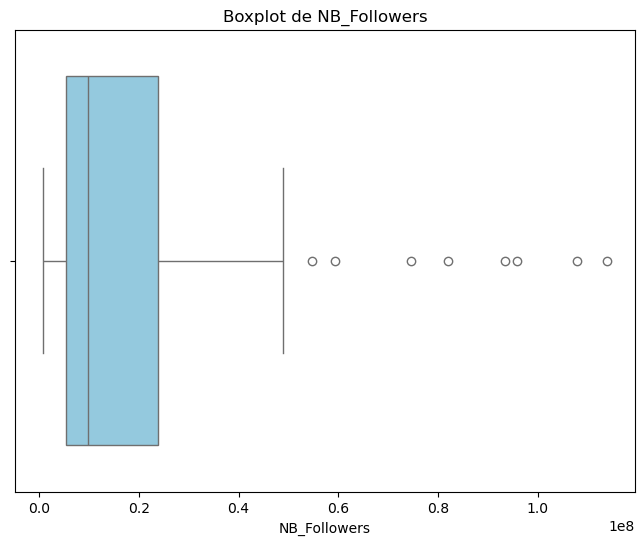

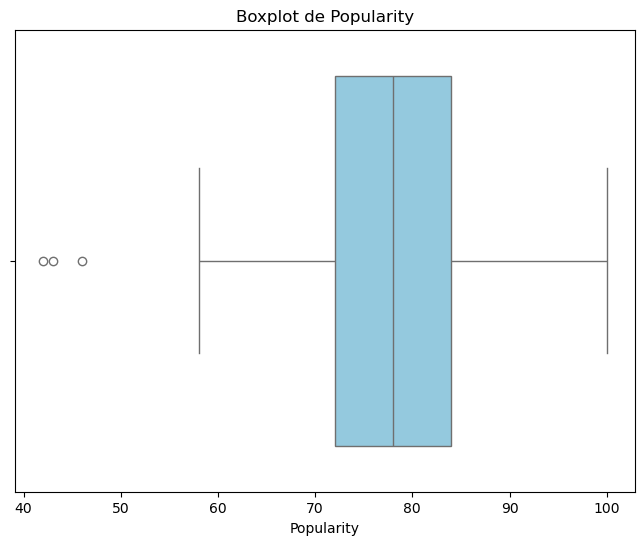

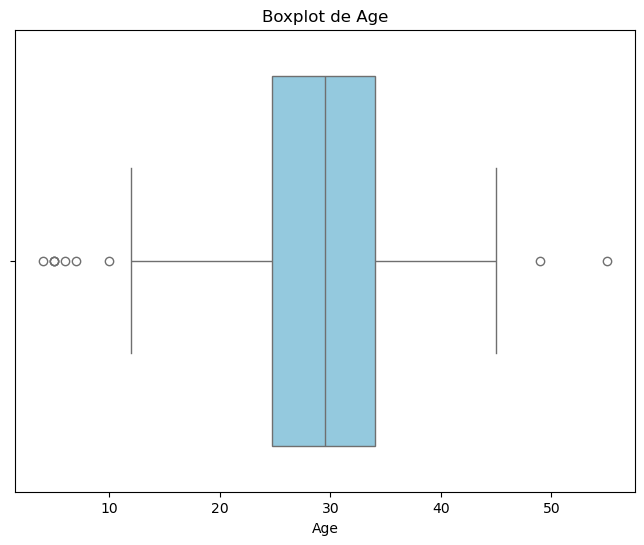

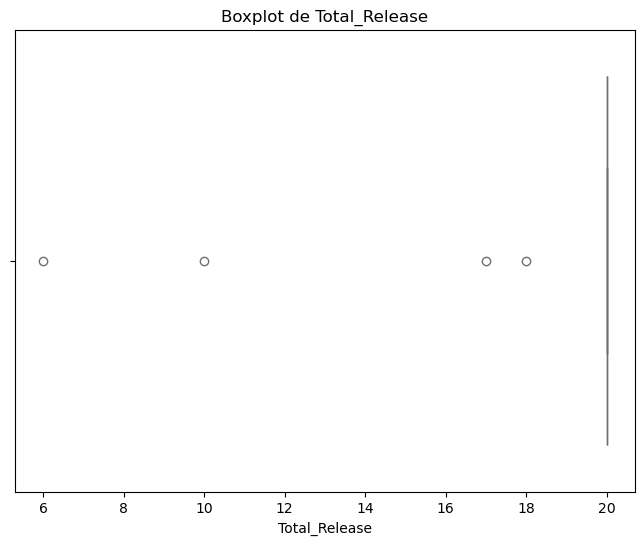

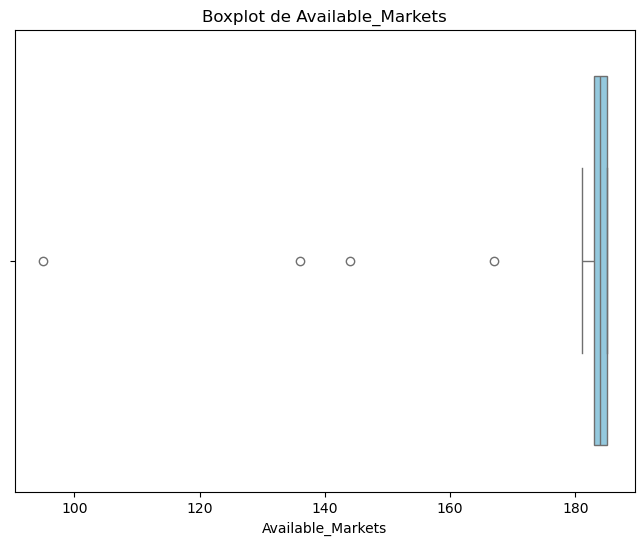

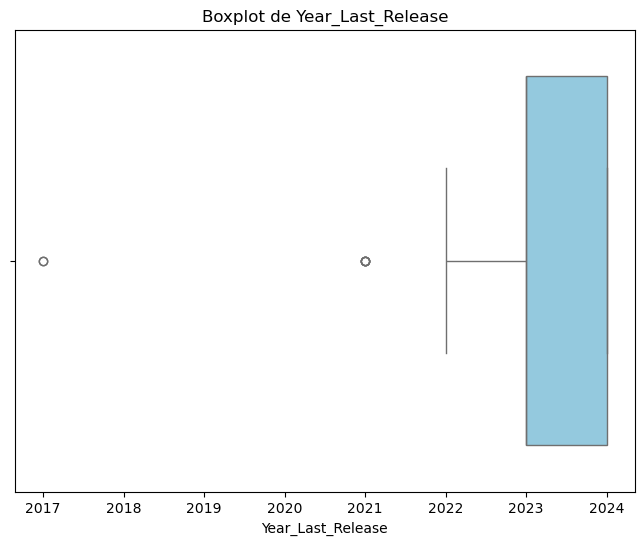

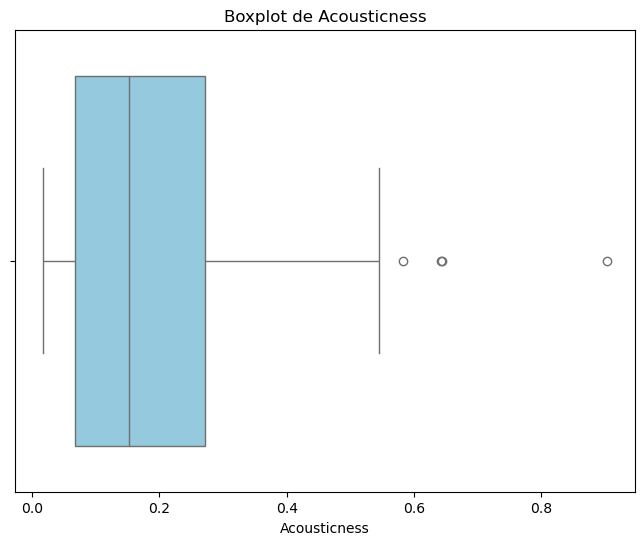

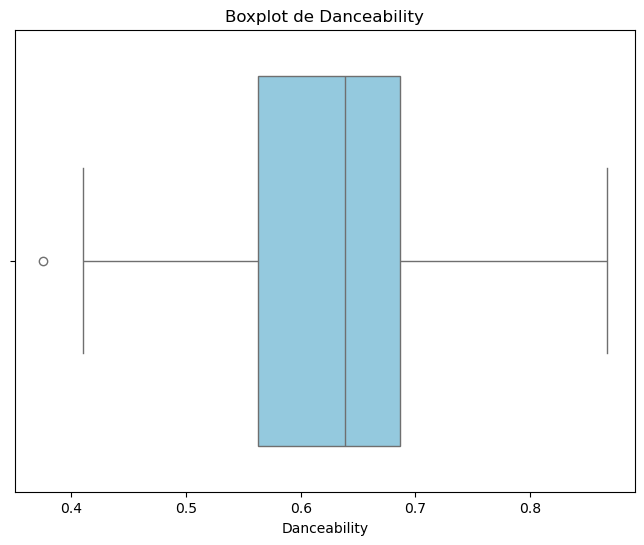

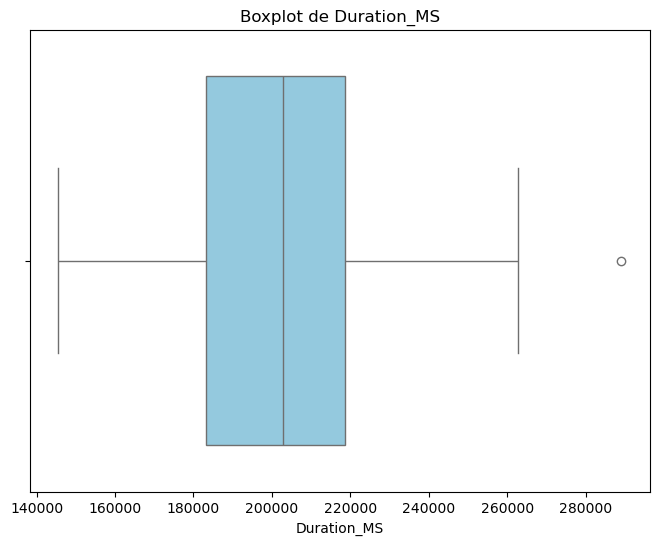

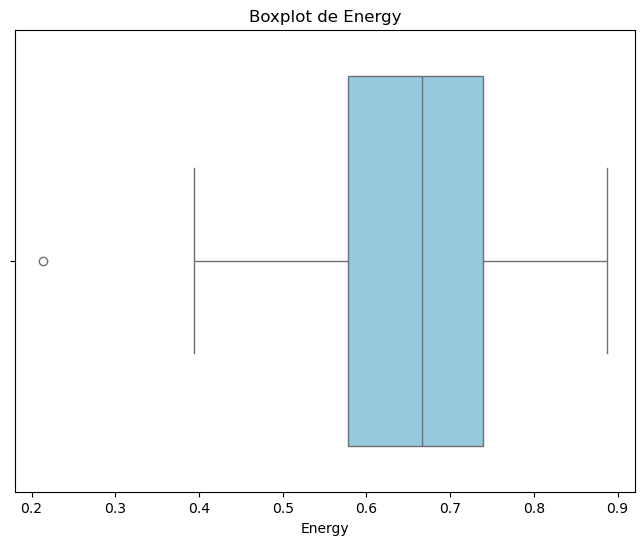

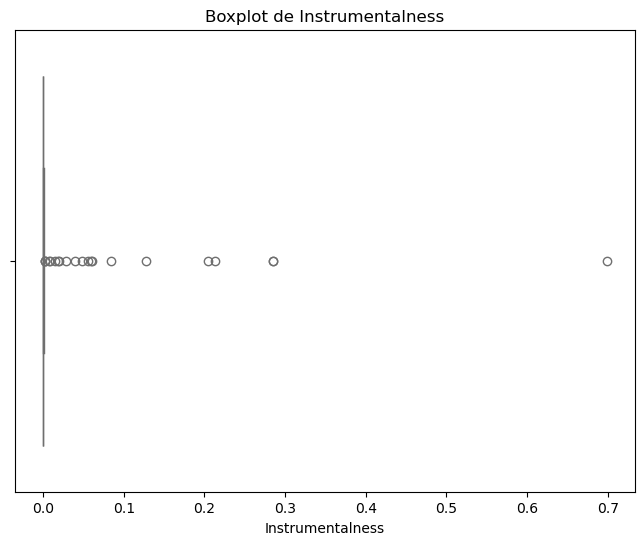

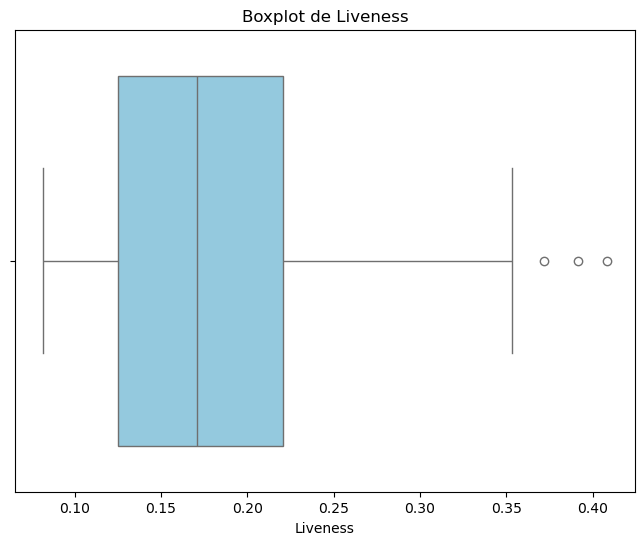

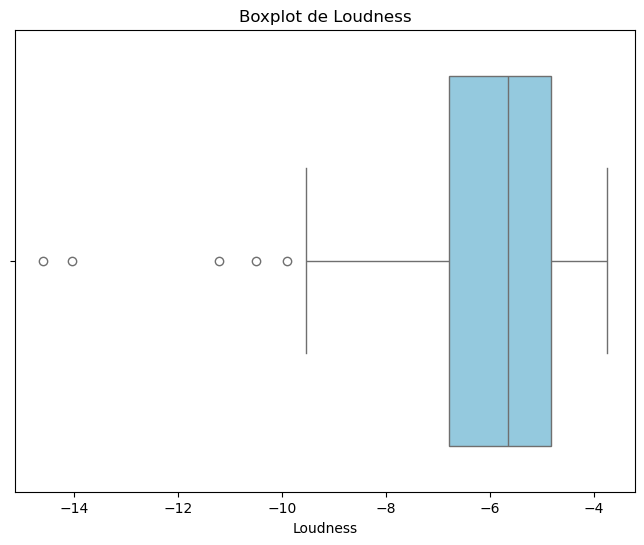

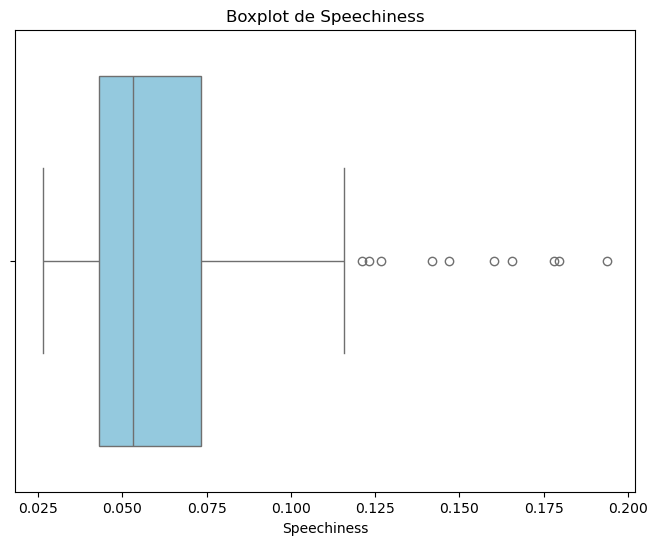

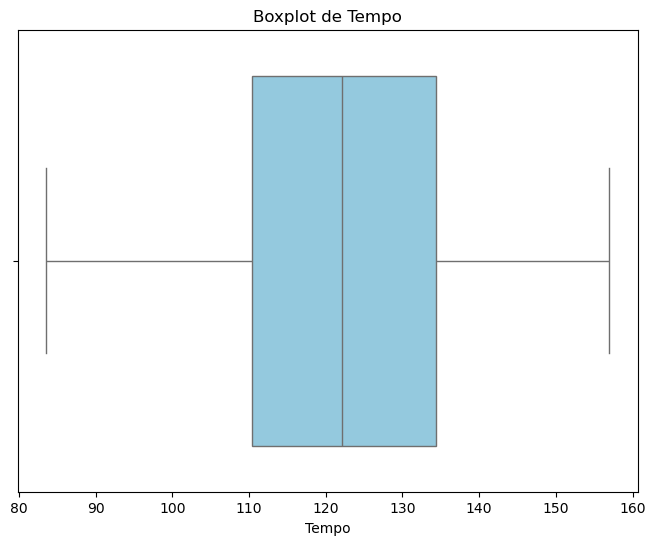

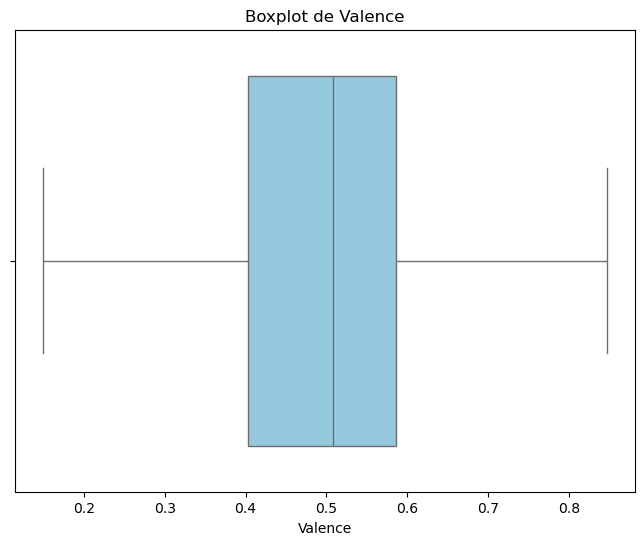

In [121]:
# Draw boxplots for all numerical variables

numeric_columns = Alters_TS.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=Network_TS[column], color='skyblue')
    plt.title(f'Boxplot de {column}')
    plt.show()

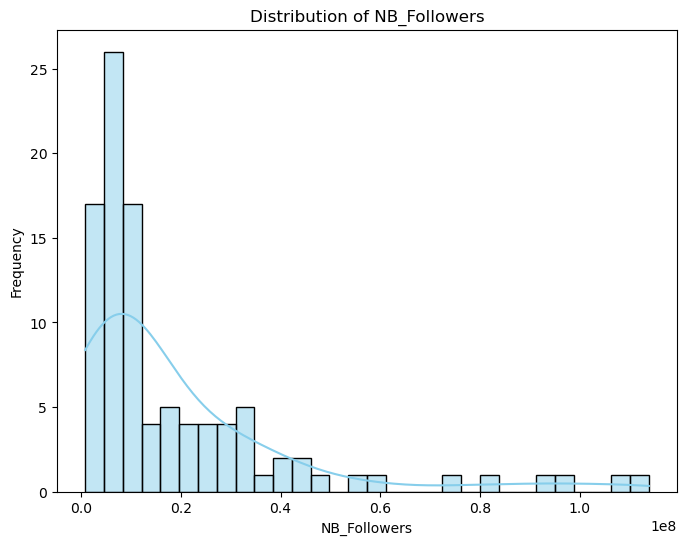

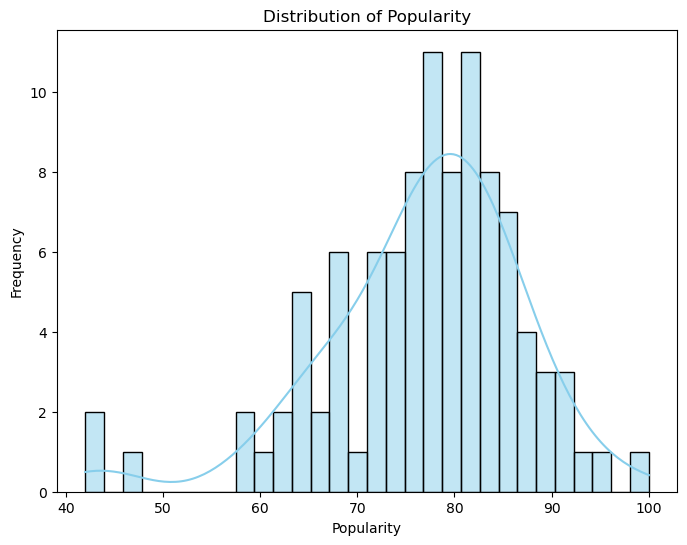

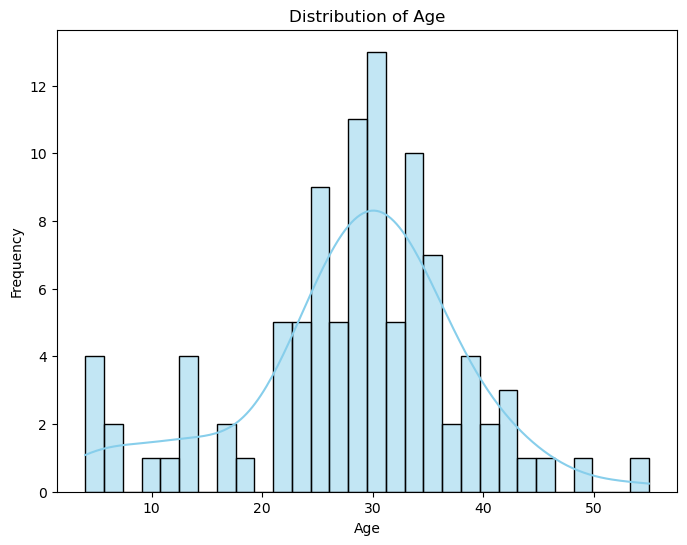

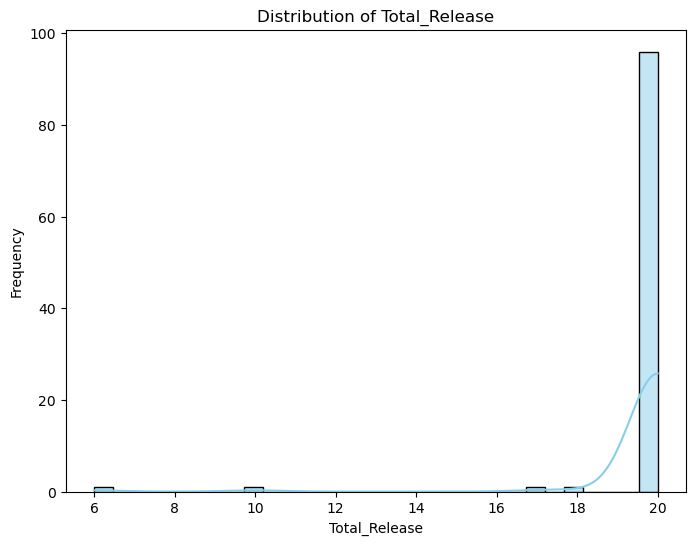

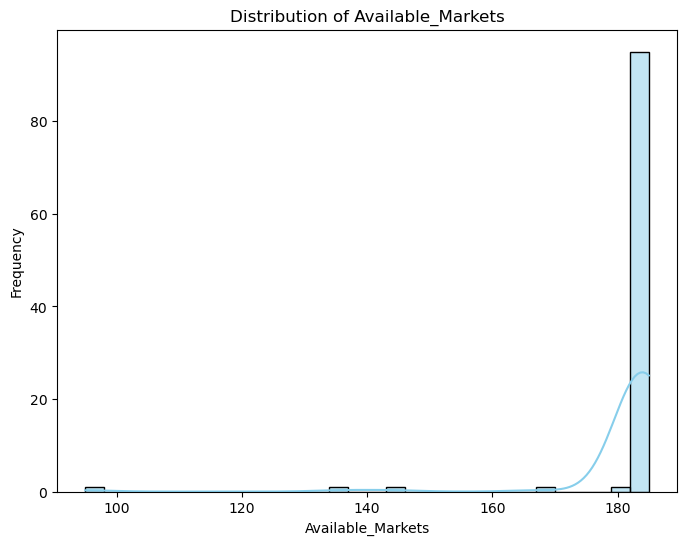

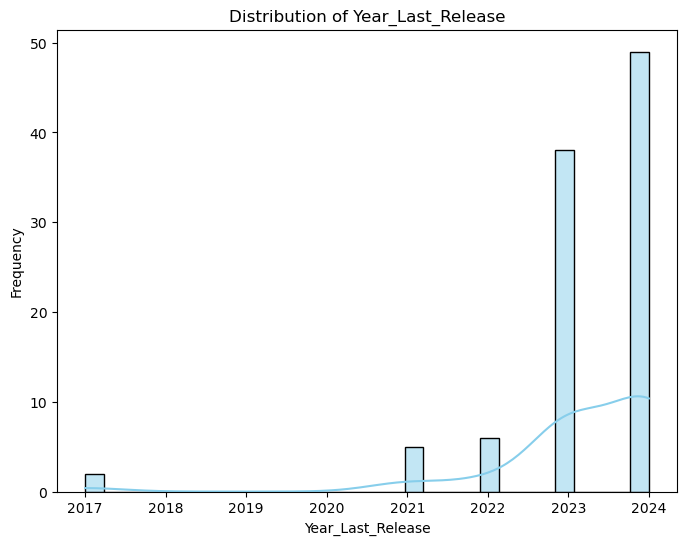

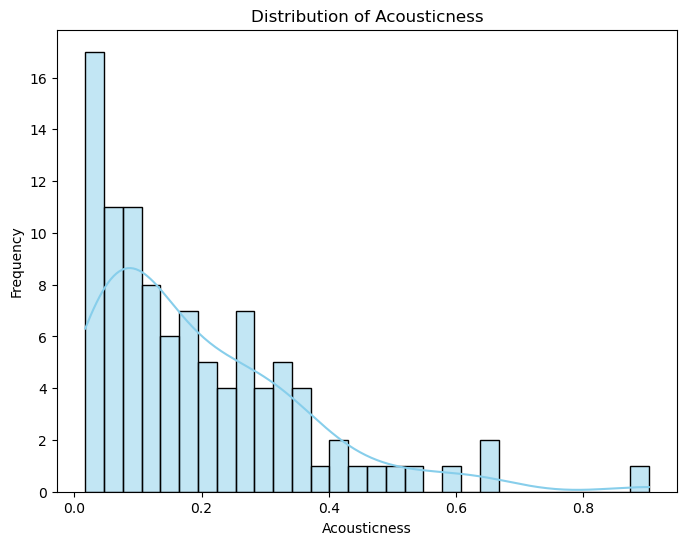

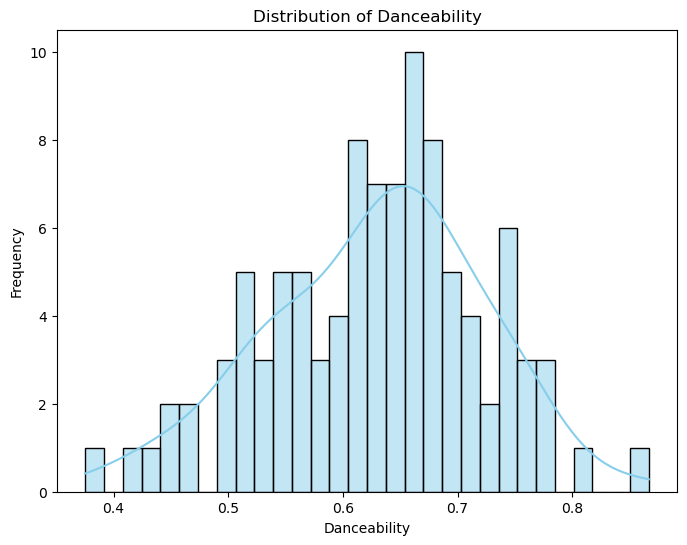

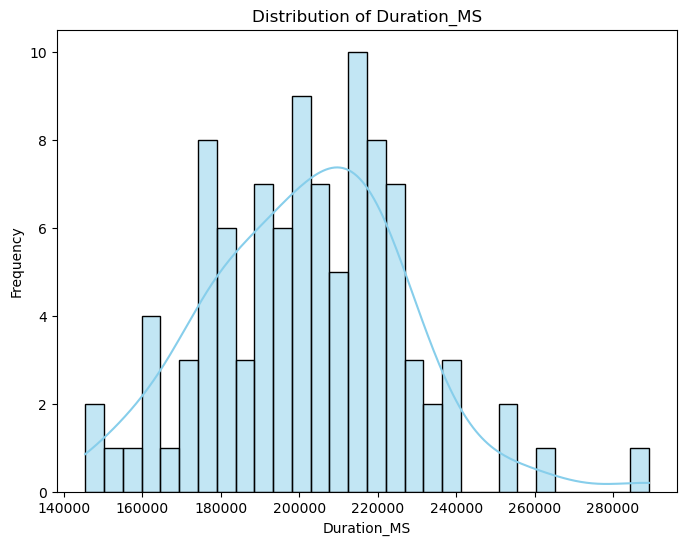

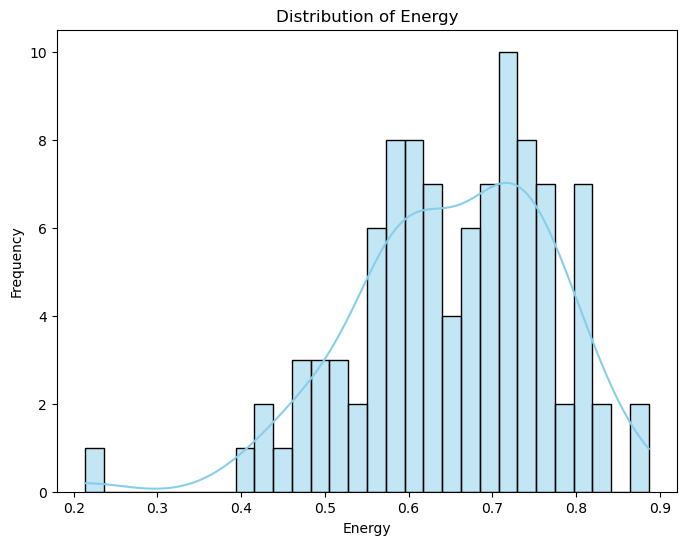

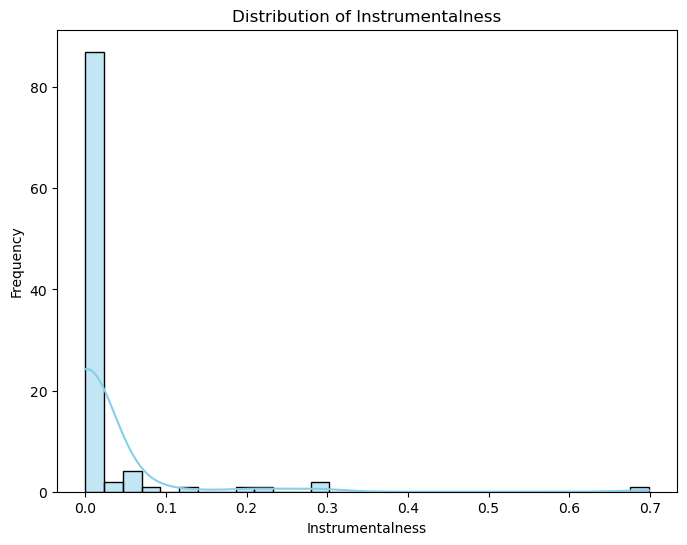

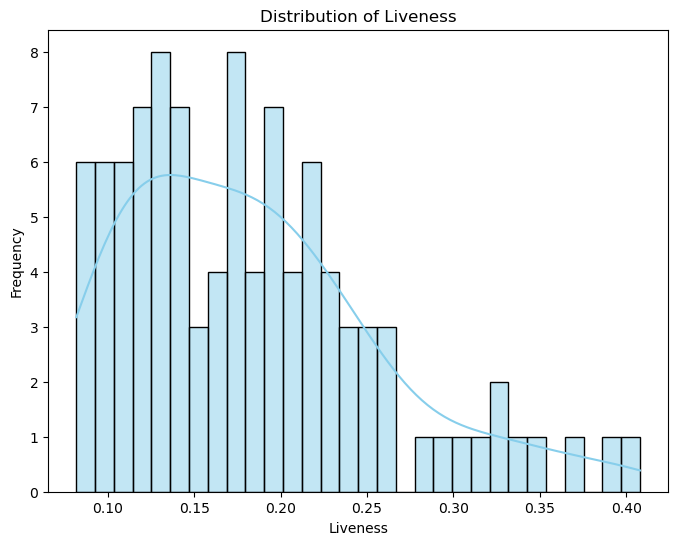

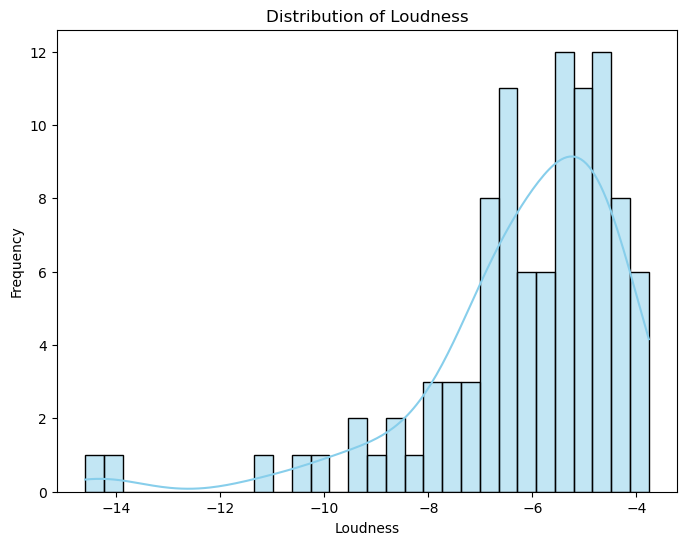

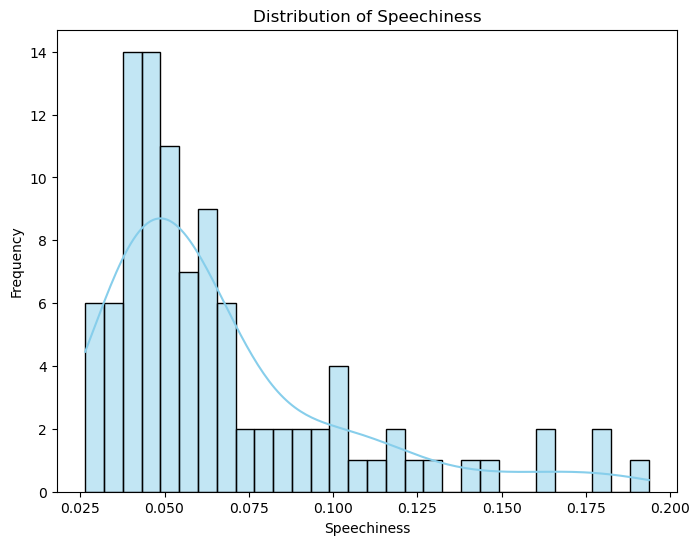

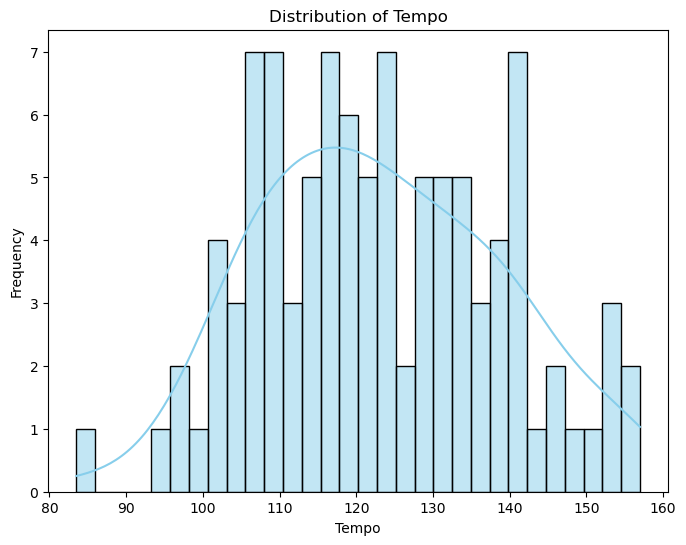

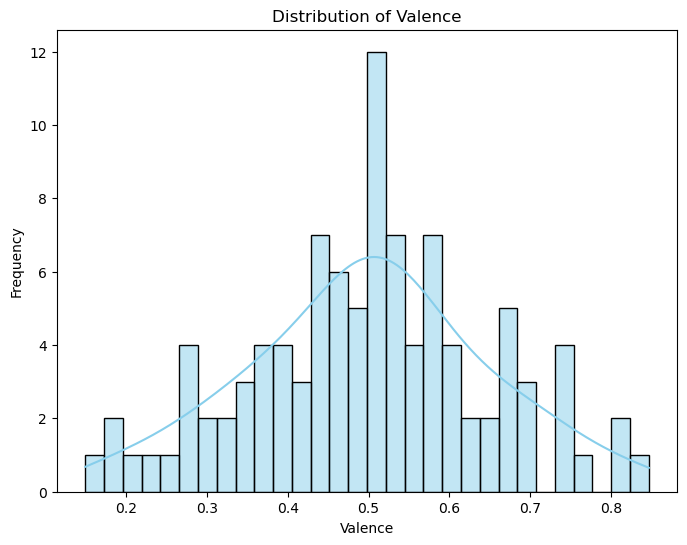

In [122]:
numeric_columns = Alters_TS.select_dtypes(include=['float64', 'int64']).columns

# Draw distribution plots for numerical variables 
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=Network_TS, x=column, kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### B2 - Categorical variables

In [123]:
# Define a function to compare categorical variables
def compare_categorical_variable(df_1, df_2, variable):
    print(f"Comparison of {variable}:")
    print(f"Taylor Swift's {variable}: {df_1[variable].iloc[0]}")
    print(f"Taylor Swift's alters {variable}:")
    print(df_2[[variable]].value_counts(normalize=True) * 100)
    print("\n")

# Loop through each categorical variable
for col in Alters_TS.select_dtypes(include='object').columns:
    if col != "Artist_Name":
        compare_categorical_variable(TS_ego, Alters_TS, col)


Comparison of Genres:
Taylor Swift's Genres: ['pop']
Taylor Swift's alters Genres:
Genres                                              
['pop']                                                 30.0
['pop', 'post-teen pop']                                10.0
['art pop', 'pop']                                      10.0
['bedroom pop', 'pop', 'pov: indie']                     5.0
['boy band', 'pop', 'post-teen pop', 'talent show']      5.0
['canadian pop', 'pop']                                  5.0
['canadian pop', 'pop', 'viral pop']                     5.0
['dance pop', 'pop', 'uk pop']                           5.0
['dance pop', 'pop']                                     5.0
['hip pop', 'pop']                                       5.0
['electropop', 'etherpop', 'indie poptimism', 'pop']     5.0
['pop', 'uk pop']                                        5.0
['pop', 'viral pop']                                     5.0
Name: proportion, dtype: float64


Comparison of Nationality:
Taylor Sw

Comparing the entire network and Taylor Swift's alters reveals several potential characteristics that Spotify might utilize in its artist recommendation process:

- **Genres:**
Taylor Swift's primary genre is 'pop', which is also prevalent among her alters.
Sub-genres such as 'dance pop', 'post-teen pop', 'art pop', and 'bedroom pop' are common among both Taylor Swift and her alters, suggesting that Spotify might recommend artists with similar genre affiliations.

- **Nationality:**
While Taylor Swift and her alters are predominantly from the United States, there is a diversity of nationalities among recommended artists, including those from England and Canada.
This indicates that Spotify may recommend artists from similar cultural and linguistic backgrounds.

- **Type:**
Taylor Swift and the majority of her alters are categorized as 'Person', indicating individual artists rather than groups or characters.
Spotify may prioritize recommending individual artists similar to Taylor Swift rather than groups.

- **Gender:**
Taylor Swift's gender is female, and a majority of her alters also represent female artists, followed by male and non-binary artists.
This suggests that Spotify may take into account the gender of artists in its recommendations, potentially aiming for gender balance or alignment with the user's preferences.

In summary, Spotify likely considers factors such as genre similarity, nationality diversity, artist type, and gender representation when recommending artists similar to Taylor Swift. These characteristics help tailor recommendations to users' preferences and promote diversity within the recommended artists.

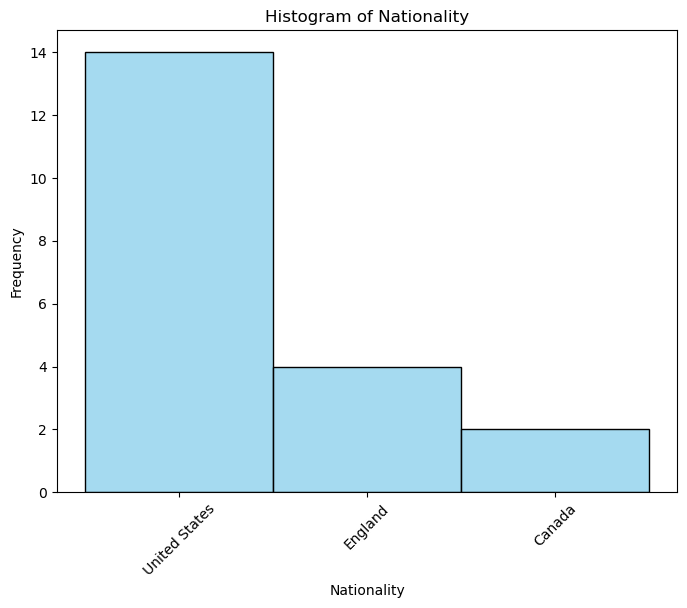

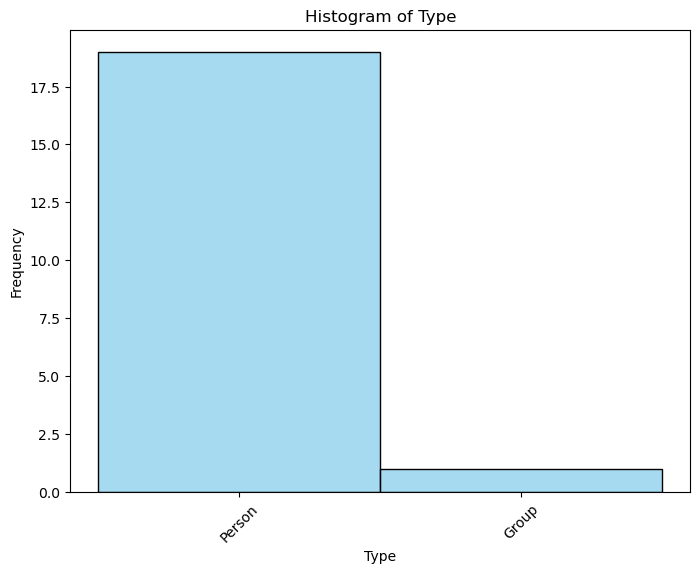

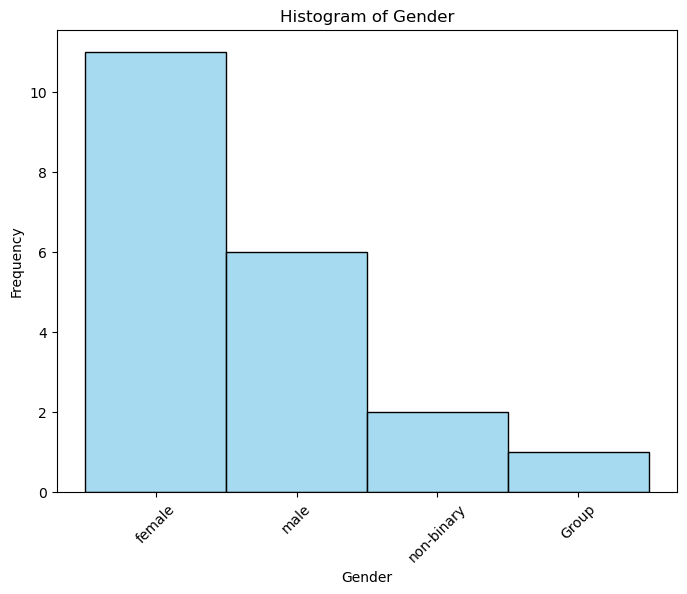

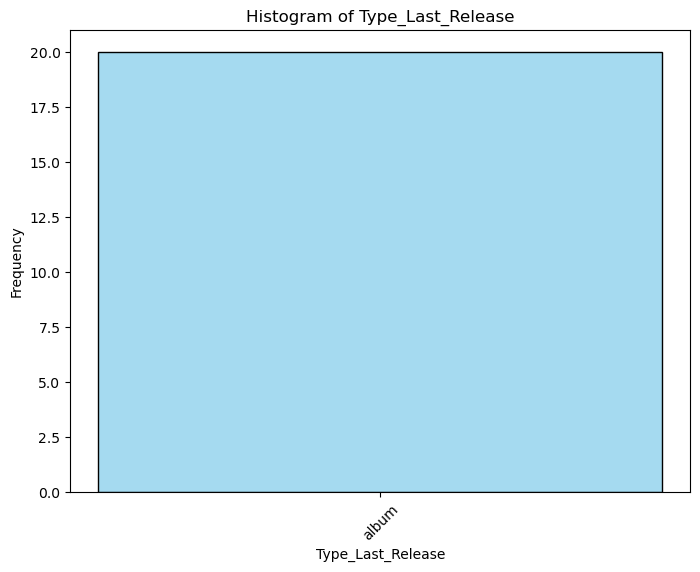

In [124]:
# Loop through each categorical variable except "Artist_Name"
for col in Alters_TS.select_dtypes(include='object').columns:
    if col != "Artist_Name" and col != "Genres":
        plt.figure(figsize=(8, 6))
        sns.histplot(data=Alters_TS, x=col, color='skyblue', discrete=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show() 

In [125]:
## Blau index (for a categorical variable with more than 2 categories)

# Function
def blau(df, col):
    return (1- ((df[col].value_counts() / df[col].count()) ** 2).sum())
    
# List to store Blau index results
blau_results = {}

# List to store Index of Qualitative Variation results
# This is a normalized version of Blau
# It is equal to Blau * k/(k-1), where k is the number of categories
iqv_results = {}

# List to store Herfindahl-Hirschman index (HHI) results
# equal to 1 - Blau
hhi_results = {}

# Loop through categorical columns except "Artist_Name"
for col in Alters_TS.select_dtypes(include='object').columns:
    if col != "Artist_Name" and Alters_TS[col].nunique() > 2:  # Check if the column has more than 2 distinct categories
        blau_results[col] = blau(Alters_TS, col)  # Calculate Blau index and store the result
        iqv_results[col] = blau(Alters_TS, col)*Alters_TS[col].nunique()/(Alters_TS[col].nunique()-1)
        hhi_results[col] = 1 - blau(Alters_TS, col)

# Print Blau index for each eligible categorical variable
for col, index in blau_results.items():
    print(f"Blaux Index for {col}: {index}")

# Print IQV for each eligible categorical variable
for col, index in iqv_results.items():
    print(f"Index of Qualitative Variation for {col}: {index}")

# Print HHI for each eligible categorical variable
for col, index in hhi_results.items():
    print(f"Herfindahl-Hirschman index for {col}: {index}")

Blaux Index for Genres: 0.865
Blaux Index for Nationality: 0.4600000000000001
Blaux Index for Gender: 0.595
Index of Qualitative Variation for Genres: 0.9370833333333333
Index of Qualitative Variation for Nationality: 0.6900000000000002
Index of Qualitative Variation for Gender: 0.7933333333333333
Herfindahl-Hirschman index for Genres: 0.135
Herfindahl-Hirschman index for Nationality: 0.5399999999999999
Herfindahl-Hirschman index for Gender: 0.405


These statistical measures provide insights into the diversity and concentration of characteristics within the broader network and specifically among artists recommended by Spotify when Taylor Swift's music is played.

- **Blaux Index:**
    - For Genres: The Blaux Index measures the diversity of genres. A higher value indicates greater diversity. In the entire network, the Blaux Index for genres is 0.9408, suggesting a high diversity of music genres among all artists. When considering only Taylor Swift's recommended artists, the Blaux Index for genres is slightly lower at 0.865, indicating a slightly reduced diversity in recommended genres compared to the entire network.
    - For Nationality: The Blaux Index measures the diversity of nationalities. A higher value indicates greater diversity. In the entire network, the Blaux Index for nationality is 0.6232, indicating a moderate diversity of nationalities among all artists. When considering Taylor Swift's recommended artists, the Blaux Index for nationality is 0.46, indicating a lower diversity in recommended nationalities compared to the entire network.
    - For Gender: The Blaux Index measures the diversity of genders. A higher value indicates greater diversity. In the entire network, the Blaux Index for gender is 0.553, indicating a moderate diversity of genders among all artists. When considering Taylor Swift's recommended artists, the Blaux Index for gender is 0.595, indicating a slightly higher diversity in recommended genders compared to the entire network.

- **Index of Qualitative Variation:**
    - For Genres: The Index of Qualitative Variation measures the variability of genres. A higher value indicates greater variability. In the entire network, the Index of Qualitative Variation for genres is 0.9567, indicating a high variability of genres among all artists. When considering Taylor Swift's recommended artists, the Index of Qualitative Variation for genres is slightly lower at 0.9371, suggesting a slightly reduced variability in recommended genres compared to the entire network.
    - For Nationality: The Index of Qualitative Variation measures the variability of nationalities. A higher value indicates greater variability. In the entire network, the Index of Qualitative Variation for nationality is 0.6855, indicating a moderate variability of nationalities among all artists. When considering Taylor Swift's recommended artists, the Index of Qualitative Variation for nationality is slightly higher at 0.69, suggesting a slightly increased variability in recommended nationalities compared to the entire network.
    - For Gender: The Index of Qualitative Variation measures the variability of genders. A higher value indicates greater variability. In the entire network, the Index of Qualitative Variation for gender is 0.7373, indicating a high variability of genders among all artists. When considering Taylor Swift's recommended artists, the Index of Qualitative Variation for gender is higher at 0.7933, suggesting an increased variability in recommended genders compared to the entire network.

- **Herfindahl-Hirschman Index (HHI):**
    - For Genres: The HHI measures the concentration of genres. A higher value indicates greater concentration. In the entire network, the HHI for genres is 0.0592, indicating low concentration of genres among all artists. When considering Taylor Swift's recommended artists, the HHI for genres is higher at 0.135, indicating a higher concentration of genres among recommended artists compared to the entire network.
    - For Nationality: The HHI measures the concentration of nationalities. A higher value indicates greater concentration. In the entire network, the HHI for nationality is 0.3768, indicating moderate concentration of nationalities among all artists. When considering Taylor Swift's recommended artists, the HHI for nationality is higher at 0.54, indicating a higher concentration of nationalities among recommended artists compared to the entire network.
    - For Gender: The HHI measures the concentration of genders. A higher value indicates greater concentration. In the entire network, the HHI for gender is 0.447, indicating moderate concentration of genders among all artists. When considering Taylor Swift's recommended artists, the HHI for gender is lower at 0.405, indicating a lower concentration of genders among recommended artists compared to the entire network.

Overall, these statistics suggest that while there is generally high diversity in genres, nationalities, and genders among artists in the broader network, the recommendations made by Spotify when Taylor Swift's music is played might exhibit slightly lower diversity and higher concentration in some aspects, such as genres and nationalities. However, there is still considerable variability and relatively low concentration in recommended characteristics, indicating that Spotify likely aims to provide diverse recommendations even within specific contexts like Taylor Swift's music.

### B3 - Structural measures

In [126]:
# Find isolates 
list(nx.isolates(EgoNetTS)) 

[]

In [127]:
# Density
print("Density :", nx.density(EgoNetTS))

# Transitivity
print("Transitivity :", nx.transitivity(EgoNetTS)) 

# Diameter
print("Diameter :", nx.diameter(EgoNetTS)) 

print("Average shortest path length :", nx.average_shortest_path_length(EgoNetTS)) 

Density : 0.3763157894736842
Transitivity : 0.5114235500878734
Diameter : 4
Average shortest path length : 1.9157894736842105


These network statistics provide insights into the structure and connectivity of the artist recommendation network on Spotify, both within the broader network and specifically among artists recommended when Taylor Swift's music is played.

- **Density:** In the entire network, the density is 0.1142, indicating that approximately 11.42% of all possible artist connections are present. When considering only the artists recommended when Taylor Swift's music is played, the density is substantially higher at 0.3763, suggesting a denser network of recommendations specifically tailored to Taylor Swift listeners.

- **Transitivity:** In the entire network, the transitivity is 0.4523, indicating that approximately 45.23% of connected artist trios are part of larger triangles. When considering only Taylor Swift's recommended artists, the transitivity is slightly higher at 0.5114, suggesting a higher degree of clustering or interconnectedness among recommended artists compared to the broader network.

- **Diameter:** In both cases, the diameter is 4, suggesting that the furthest distance between any two artists is 4 steps apart, regardless of whether considering the entire network or Taylor Swift's recommended artists.

- **Average Shortest Path Length:** In the entire network, the average shortest path length is 3.0259, indicating that on average, artists are approximately 3 steps away from each other. When considering Taylor Swift's recommended artists, the average shortest path length is lower at 1.9158, suggesting that recommended artists are more closely connected to each other within the network compared to the broader network.

Overall, these statistics indicate that the network of artist recommendations on Spotify, particularly for Taylor Swift listeners, is denser, more clustered, and has shorter average path lengths compared to the broader network. This suggests that Spotify's recommendation algorithm for Taylor Swift listeners is effective in creating a tightly interconnected network of recommended artists, potentially enhancing user engagement and satisfaction within this specific music listening context.

In [128]:
# degree centrality
nx.degree_centrality(EgoNetTS)

{'Justin Bieber': 0.6842105263157894,
 'ZAYN': 0.7894736842105263,
 'Shawn Mendes': 0.894736842105263,
 'Selena Gomez': 1.263157894736842,
 'Charlie Puth': 0.5789473684210527,
 'Camila Cabello': 1.263157894736842,
 'One Direction': 0.7368421052631579,
 'Ariana Grande': 1.0526315789473684,
 'Demi Lovato': 0.7894736842105263,
 'Dua Lipa': 0.894736842105263,
 'Miley Cyrus': 0.631578947368421,
 'Halsey': 0.7368421052631579,
 'Harry Styles': 1.0,
 'Conan Gray': 0.3684210526315789,
 'Meghan Trainor': 0.5789473684210527,
 'Katy Perry': 0.631578947368421,
 'Lana Del Rey': 0.2631578947368421,
 'Olivia Rodrigo': 0.7894736842105263,
 'Billie Eilish': 0.7368421052631579,
 'Sabrina Carpenter': 0.3684210526315789}

In [129]:
# The 2 artists with the highest indegree centrality
highest_indegree = sorted(nx.in_degree_centrality(EgoNetTS).items(), key=lambda x: x[1], reverse=True)[:2]
print("The 2 artists with the highest indegree centrality:")
for artist, centrality in highest_indegree:
    print(artist, centrality)

# The 2 artists with the highest outdegree centrality
highest_outdegree = sorted(nx.out_degree_centrality(EgoNetTS).items(), key=lambda x: x[1], reverse=True)[:2]
print("\nThe 2 artists with the highest outdegree centrality:")
for artist, centrality in highest_outdegree:
    print(artist, centrality)

# The 2 artists with the highest degree centrality
highest_degree = sorted(nx.degree_centrality(EgoNetTS).items(), key=lambda x: x[1], reverse=True)[:2]
print("\nThe 2 artists with the highest degree centrality:")
for artist, centrality in highest_degree:
    print(artist, centrality)

# The 2 artists with the lowest indegree centrality
lowest_indegree = sorted(nx.in_degree_centrality(EgoNetTS).items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest indegree centrality:")
for artist, centrality in lowest_indegree:
    print(artist, centrality)

# The 2 artists with the lowest outdegree centrality
lowest_outdegree = sorted(nx.out_degree_centrality(EgoNetTS).items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest outdegree centrality:")
for artist, centrality in lowest_outdegree:
    print(artist, centrality)

# The 2 artists with the lowest degree centrality
lowest_degree = sorted(nx.degree_centrality(EgoNetTS).items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest degree centrality:")
for artist, centrality in lowest_degree:
    print(artist, centrality)

The 2 artists with the highest indegree centrality:
Camila Cabello 0.7894736842105263
Selena Gomez 0.7368421052631579

The 2 artists with the highest outdegree centrality:
Ariana Grande 0.7368421052631579
Justin Bieber 0.631578947368421

The 2 artists with the highest degree centrality:
Selena Gomez 1.263157894736842
Camila Cabello 1.263157894736842

The 2 artists with the lowest indegree centrality:
Justin Bieber 0.05263157894736842
Lana Del Rey 0.10526315789473684

The 2 artists with the lowest outdegree centrality:
Conan Gray 0.05263157894736842
Meghan Trainor 0.15789473684210525

The 2 artists with the lowest degree centrality:
Lana Del Rey 0.2631578947368421
Conan Gray 0.3684210526315789


In the global network of artist recommendations on Spotify, Bebe Rexha and Little Mix emerge as the most significant figures, being the most frequently recommended by other artists. Conversely, The Smiths and Joshua Bassett are among the least important, receiving few recommendations and making few themselves.

In the network of artists recommended when listening to Taylor Swift's music, Selena Gomez and Camila Cabello stand out as the most significant actors, being the most frequently recommended by other artists in this specific context. Conversely, Lana Del Rey and Conan Gray are among the least important, with less influence and recommendations in this particular context.

In [130]:
# Get all unique nodes from the graph
unique_nodes = list(superstar_network_restricted.nodes())

# Create a DataFrame with the unique nodes
df_unique_nodes = pd.DataFrame(unique_nodes, columns=['Artist_Name'])

df_unique_nodes.to_csv('artists_TaylorSwift.csv',  index=False)
Network_TS.to_csv('artists_attr_TaylorSwift.csv',  index=False)

### B4 - Extra analysis

In [199]:
data = {}
with open("artists_attr_TaylorSwift.csv", "r", newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        artist_name = row["Artist_Name"]
        genres = row["Genres"].strip("[]").replace("'", "").split(",")
        data[artist_name] = genres


with open("artist_genre_pairs_TS.txt", "w") as f:
    for artist, genres in data.items():
        for genre in genres:
            if genre.strip():
                f.write(f"{artist},{genre.strip()}\n")

In [200]:
with open("artist_genre_pairs_TS.txt", "r") as file:
    lines = file.readlines()

G = nx.Graph()

artistes = set()
genres = set()
genres_WC=[]

for line in lines:
    artiste, genre = line.strip().split(",")
    artistes.add(artiste)
    genres.add(genre)
    genres_WC.append(genre)

G.add_nodes_from(artistes, bipartite=0)  
G.add_nodes_from(genres, bipartite=1) 

for line in lines:
    artiste, genre = line.strip().split(",")
    G.add_edge(artiste, genre)

pos = nx.bipartite_layout(G, artistes)

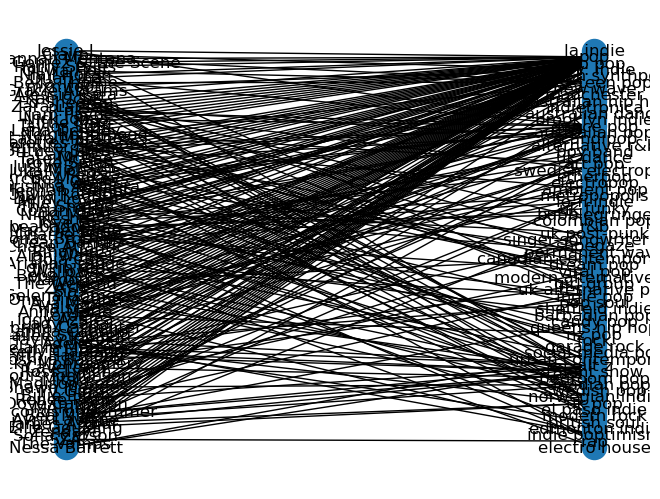

In [201]:
nx.draw(G, pos, with_labels=True)
plt.show()

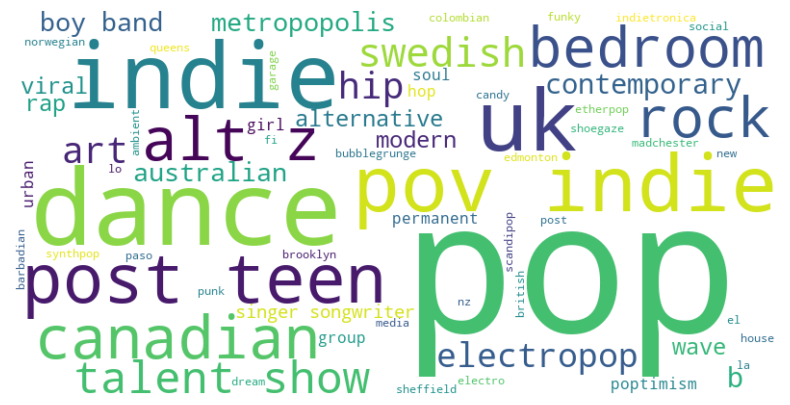

In [202]:
text = ' '.join(genres_WC)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [203]:
# Popularity of genres
left_nodes = {n for n, d in G.nodes(data=True) if d['bipartite'] == 0}
right_nodes = {n for n, d in G.nodes(data=True) if d['bipartite'] == 1}

In [204]:
print("Nombre de genres: ",len(right_nodes))

Nombre de genres:  64


In [205]:
right_degrees = G.degree(right_nodes)

print("Degré des nœuds de la partition droite :", right_degrees)

Degré des nœuds de la partition droite : [('electro house', 1), ('rap', 3), ('indie poptimism', 2), ('british soul', 1), ('edmonton indie', 1), ('modern rock', 2), ('el paso indie', 1), ('uk pop', 8), ('norwegian indie', 1), ('swedish pop', 2), ('canadian pop', 5), ('alt z', 7), ('bedroom pop', 6), ('talent show', 6), ('social media pop', 1), ('nz pop', 1), ('urban contemporary', 2), ('rock', 2), ('garage rock', 1), ('queens hip hop', 1), ('candy pop', 1), ('barbadian pop', 1), ('sheffield indie', 1), ('pop soul', 1), ('indie pop', 5), ('uk alternative pop', 1), ('girl group', 2), ('modern alternative rock', 1), ('viral pop', 3), ('dream pop', 1), ('canadian contemporary r&b', 2), ('permanent wave', 2), ('shoegaze', 1), ('singer-songwriter pop', 3), ('uk post-punk', 1), ('r&b', 1), ('colombian pop', 1), ('bubblegrunge', 1), ('uk funky', 1), ('lo-fi indie', 1), ('metropopolis', 4), ('ambient pop', 1), ('electropop', 2), ('etherpop', 1), ('swedish electropop', 2), ('art pop', 4), ('uk da

In [206]:
# Display first top 10 of genres with the degrees and the centrality 
genre_nodes = [node for node in G.nodes if G.nodes[node]['bipartite'] == 1]
degree_centralities = nx.degree_centrality(G)
genre_degree_centralities = {node: degree_centralities[node] for node in genre_nodes}
sorted_genre_centralities = sorted(genre_degree_centralities.items(), key=lambda x: x[1], reverse=True)

print("Les 10 genres avec les plus gros degrés et leurs centralités :")
for node, centrality in sorted_genre_centralities[:10]:
    degree = G.degree[node]
    print(f"Genre : {node}, Degré : {degree}, Centralité de degré : {centrality}")

Les 10 genres avec les plus gros degrés et leurs centralités :
Genre : pop, Degré : 77, Centralité de degré : 0.4723926380368098
Genre : dance pop, Degré : 17, Centralité de degré : 0.10429447852760737
Genre : pov: indie, Degré : 12, Centralité de degré : 0.0736196319018405
Genre : post-teen pop, Degré : 9, Centralité de degré : 0.05521472392638037
Genre : uk pop, Degré : 8, Centralité de degré : 0.049079754601226995
Genre : alt z, Degré : 7, Centralité de degré : 0.04294478527607362
Genre : bedroom pop, Degré : 6, Centralité de degré : 0.03680981595092025
Genre : talent show, Degré : 6, Centralité de degré : 0.03680981595092025
Genre : canadian pop, Degré : 5, Centralité de degré : 0.03067484662576687
Genre : indie pop, Degré : 5, Centralité de degré : 0.03067484662576687


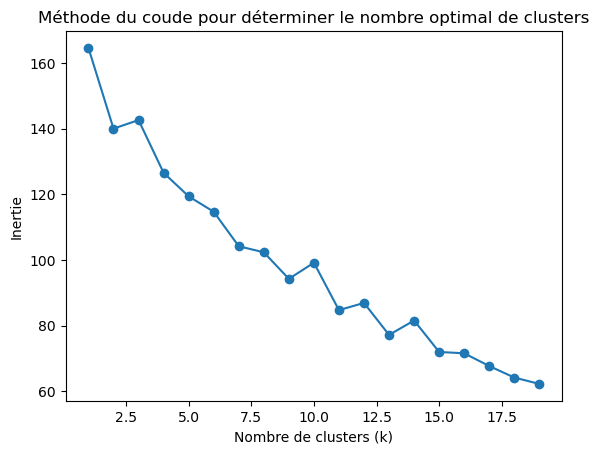

In [207]:
# Cluster of genres
# We will identify clusters or groups of genres that are often associated with each other in the graph. 
# To do this, we will use a data clustering technique such as the K-means algorithm to group similar genres into distinct clusters.
genres = [node for node in G.nodes if G.nodes[node]['bipartite'] == 1]
adjacency_matrix = nx.bipartite.biadjacency_matrix(G, row_order=artistes, column_order=genres)
adjacency_matrix_np = adjacency_matrix.toarray()
k_values = range(1, 20)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(adjacency_matrix_np)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

In [208]:
# Clusters identification
kmeans = KMeans(n_clusters=10)
cluster_assignments = kmeans.fit_predict(adjacency_matrix_np)

genre_clusters = {}
for i, genre in enumerate(genres):
    cluster_id = cluster_assignments[i]
    if cluster_id not in genre_clusters:
        genre_clusters[cluster_id] = []
    genre_clusters[cluster_id].append(genre)

print("Nombre de genres dans chaque cluster :")
for cluster_id, genres_in_cluster in genre_clusters.items():
    genre_count = len(genres_in_cluster)
    genres_str = ', '.join(genres_in_cluster)
    print(f"Cluster {cluster_id}: {genre_count} genres - {genres_str}")


Nombre de genres dans chaque cluster :
Cluster 8: 3 genres - electro house, talent show, sheffield indie
Cluster 0: 30 genres - rap, indie poptimism, edmonton indie, modern rock, swedish pop, bedroom pop, alt z, social media pop, garage rock, nz pop, uk alternative pop, modern alternative rock, viral pop, canadian contemporary r&b, singer-songwriter pop, uk post-punk, r&b, colombian pop, lo-fi indie, metropopolis, ambient pop, electropop, uk dance, scandipop, dance pop, brooklyn indie, australian dance, post-teen pop, hip pop, la indie
Cluster 4: 6 genres - british soul, queens hip hop, uk funky, alternative r&b, australian pop, pop
Cluster 3: 4 genres - el paso indie, norwegian indie, pop soul, bubblegrunge
Cluster 6: 9 genres - uk pop, indie pop, dream pop, permanent wave, shoegaze, etherpop, boy band, madchester, new wave
Cluster 1: 7 genres - canadian pop, urban contemporary, rock, barbadian pop, swedish electropop, indietronica, swedish synthpop
Cluster 2: 3 genres - candy pop, ar

* The analysis of these clusters of genres reveals an interesting structure, where we observe the coexistence of large clusters representing very popular music genres in the network such as pop and its sub-genres, hip-hop, or rap, alongside smaller clusters encompassing less conventional or less widespread genres, which therefore have a somewhat marginalized position.

# V - Statistical characterization of the Network 

## A - Statistical properties of the degree

### A1 - Degree Distribution (Directed Graph)

In [131]:
in_degrees = [superstar_network_restricted.in_degree(node) for node in superstar_network_restricted.nodes()]
out_degrees = [superstar_network_restricted.out_degree(node) for node in superstar_network_restricted.nodes()]
total_degrees = [superstar_network_restricted.degree(node) for node in superstar_network_restricted.nodes()]

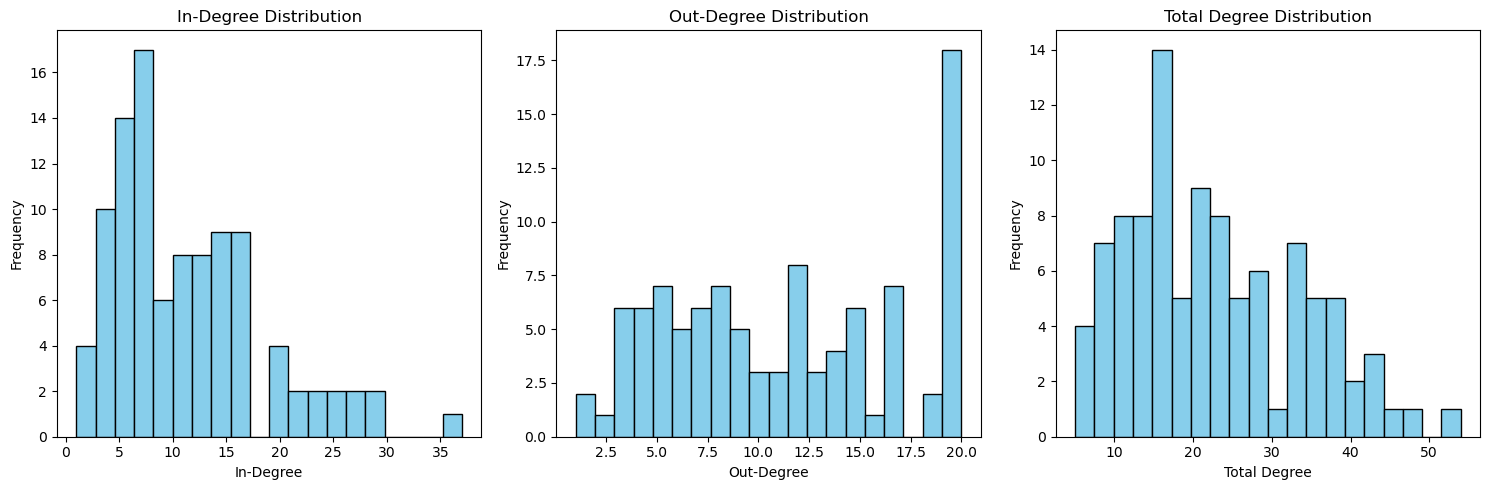

In [132]:
# Plot histograms for in-degree, out-degree, and total degree distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(in_degrees, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.title('In-Degree Distribution')

plt.subplot(1, 3, 2)
plt.hist(out_degrees, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')
plt.title('Out-Degree Distribution')

plt.subplot(1, 3, 3)
plt.hist(total_degrees, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Total Degree')
plt.ylabel('Frequency')
plt.title('Total Degree Distribution')

plt.tight_layout()
plt.show()

* The histograms shows the distribution of node degrees in the network.
* The histograms of in-degree, out-degree, and total degree distributions show a skew towards a lower number of degrees for most nodes. This suggests that most artists are recommended by only a few others, with a few nodes (likely popular artists) having high in-degree and out-degree values, indicative of a heterogeneous (scale-free) network.

In [133]:
# Applying log-binning to degree distribution
def logBinning(degreeList, nbin):
    kmin = min(degreeList)
    kmax = max(degreeList)
    logBins = np.logspace(np.log10(kmin), np.log10(kmax), num=nbin)
    logBinDensity, binedges = np.histogram(degreeList, bins=logBins, density=True)
    logBins = np.delete(logBins, -1)
    return logBinDensity, logBins

In [134]:
pk_in, k_in = logBinning(in_degrees, 1000)
pk_out, k_out = logBinning(out_degrees, 1000)
pk_total, k_total = logBinning(total_degrees, 1000)

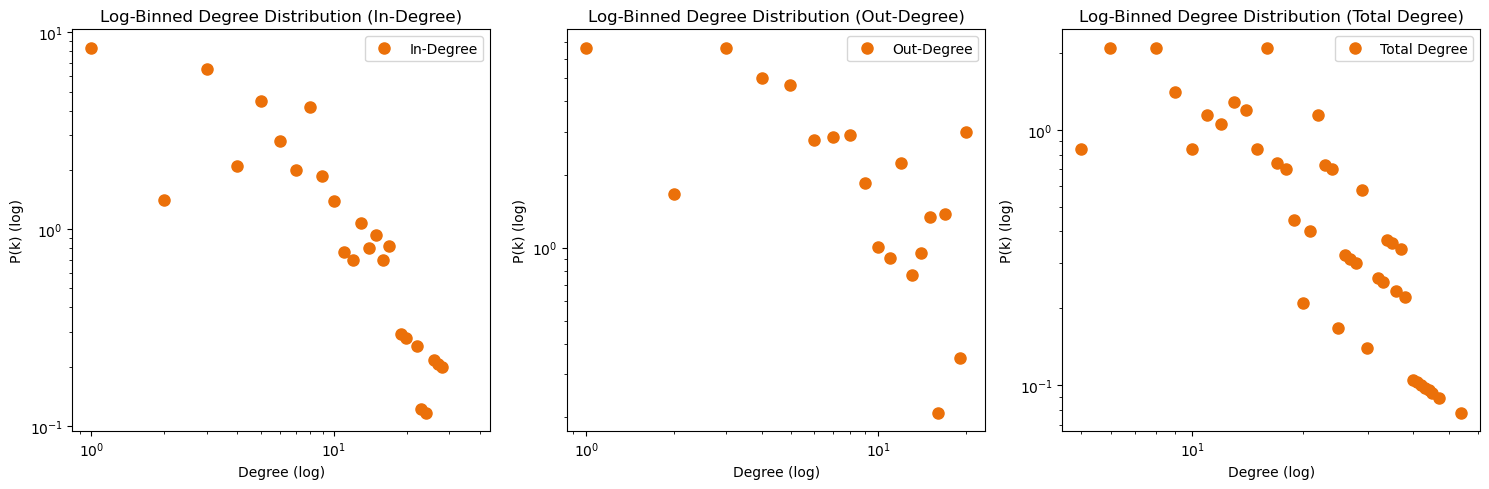

In [135]:
# Plot log-binned for in-degree, out-degree, and total degree distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.loglog(k_in, pk_in, 'o', color='#EB7009', markersize=8, label='In-Degree')
plt.xlabel('Degree (log)')
plt.ylabel('P(k) (log)')
plt.title('Log-Binned Degree Distribution (In-Degree)')
plt.legend()

plt.subplot(1, 3, 2)
plt.loglog(k_out, pk_out, 'o', color='#EB7009', markersize=8, label='Out-Degree')
plt.xlabel('Degree (log)')
plt.ylabel('P(k) (log)')
plt.title('Log-Binned Degree Distribution (Out-Degree)')
plt.legend()

plt.subplot(1, 3, 3)
plt.loglog(k_total, pk_total, 'o', color='#EB7009', markersize=8, label='Total Degree')
plt.xlabel('Degree (log)')
plt.ylabel('P(k) (log)')
plt.title('Log-Binned Degree Distribution (Total Degree)')
plt.legend()

plt.tight_layout()
plt.show()

* The log-binned degree distribution graphs provide insights into the connectivity patterns of the network and reveal the structure of the network on a multiplicative scale.
* A straight-line trend (power-law (pareto) distribution) in these plots is characteristic of scale-free networks, where few nodes (artists) act as hubs with a high number of connections.

### A2 - Degree Distribution (Undirected Graph)

In [136]:
superstar_network_undirected = nx.read_edgelist('Taylor_Swift_Network_names.txt', create_using=nx.Graph(), delimiter=', ', data=False)
superstar_network_restricted_undirected = nx.Graph()

for node in superstar_network.nodes():
    if superstar_network.out_degree(node) > 0:
        superstar_network_restricted_undirected.add_node(node)
        for succ in superstar_network.successors(node):
            if superstar_network.out_degree(succ) > 0:
                superstar_network_restricted_undirected.add_edge(node, succ)

print(superstar_network_restricted_undirected.number_of_edges())

820


In [137]:
print(superstar_network_restricted_undirected)

Graph with 100 nodes and 820 edges


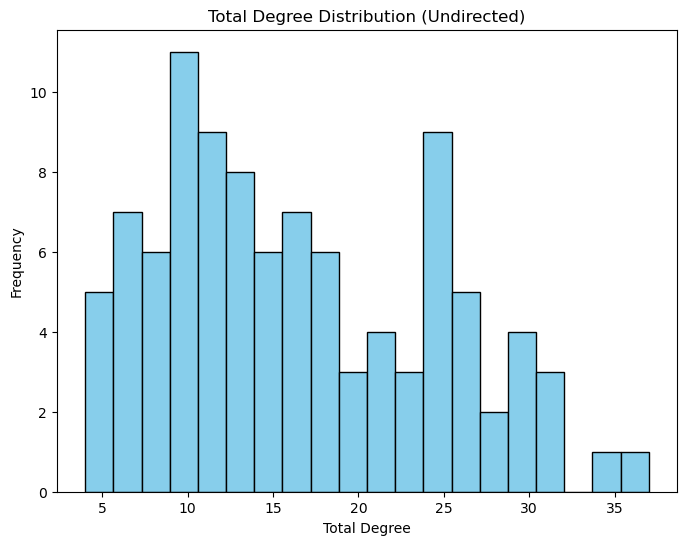

In [138]:
# Plot histograms for total degree distributions for the undirected graph
total_degrees_undirected = [superstar_network_restricted_undirected.degree(node) for node in superstar_network_restricted_undirected.nodes()]

plt.figure(figsize=(8, 6))
plt.hist(total_degrees_undirected, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Total Degree')
plt.ylabel('Frequency')
plt.title('Total Degree Distribution (Undirected)')
plt.show()

* The degree distribution of the undirected graph provides a view of the network's structure without the directionality of recommendations.
* This histogram helps in understanding the general connectivity of the nodes, which may point to the average number of other artists an artist is associated with in the network. The graph show how interconnected the network is, potentially indicating a 'small-world' nature where most nodes can be reached from every other by a small number of steps.

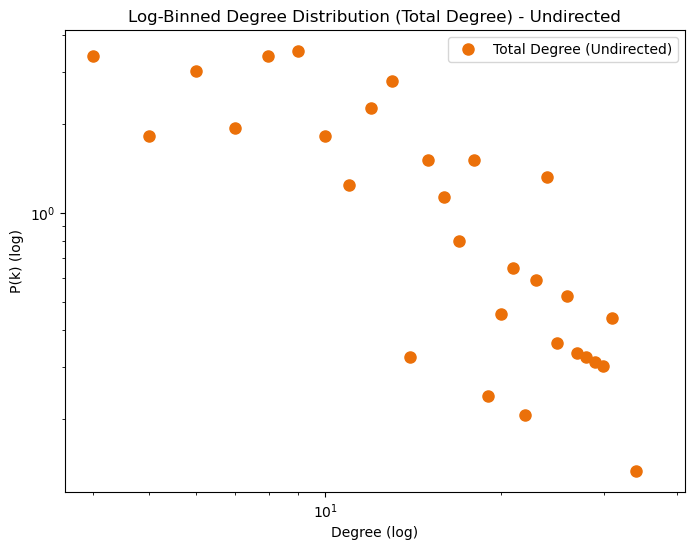

In [139]:
# Applying log-binning to degree distribution for undirected graph
pk, k = logBinning(total_degrees_undirected, 1000)

plt.figure(figsize=(8, 6))
plt.loglog(k, pk, 'o', color='#EB7009', markersize=8, label='Total Degree (Undirected)')
plt.xlabel('Degree (log)')
plt.ylabel('P(k) (log)')
plt.title('Log-Binned Degree Distribution (Total Degree) - Undirected')
plt.legend()
plt.show()

* Similar to the directed case, this plot is useful for identifying the scaling properties of the network. It could indicate a hierarchy where a small number of artists are highly connected. As it suggest the presence of influential nodes with many connections, which can have significant implications for network dynamics and information flow.

### A3 - Degree assortativity/correlation (Directed Graph)

In [192]:
TS_Nodes_Attributes = pd.read_csv('Taylor_Swift_Attr_Network.csv')

In [141]:
superstar_network = nx.read_edgelist('Taylor_Swift_Network_names.txt', comments="Node", create_using=nx.DiGraph(), delimiter=',', data=False)

In [142]:
superstar_network_restricted = nx.DiGraph()
for node in superstar_network.nodes():
    if superstar_network.out_degree(node) > 0:
        superstar_network_restricted.add_node(node)
        for succ in superstar_network.successors(node):
            if superstar_network.out_degree(succ) > 0:
                superstar_network_restricted.add_edge(node, succ)

In [143]:
# Add nodes with attributes
for _, row in TS_Nodes_Attributes.iterrows():
    artist_name = row['Artist_Name']
    attributes = row.drop('Artist_Name').to_dict()
    superstar_network_restricted.add_node(artist_name, **attributes)

# View results
print(superstar_network_restricted.nodes(data=True))

[('Taylor Swift', {'NB_Followers': 107849786, 'Genres': "['pop']", 'Popularity': 100, 'Nationality': 'United States', 'Age': 35.0, 'Death': False, 'Type': 'Person', 'Gender': 'female', 'Total_Release': 20, 'Available_Markets': 183, 'Year_Last_Release': 2024, 'Type_Last_Release': 'album', 'Acousticness': 0.2463333333333333, 'Danceability': 0.516, 'Duration_MS': 200141.3333333333, 'Energy': 0.6293333333333334, 'Instrumentalness': 1.2733333333333336e-05, 'Liveness': 0.1216666666666666, 'Loudness': -6.62, 'Speechiness': 0.1002666666666666, 'Tempo': 111.84533333333331, 'Valence': 0.5166666666666666}), ('Selena Gomez', {'NB_Followers': 48935201, 'Genres': "['pop', 'post-teen pop']", 'Popularity': 82, 'Nationality': 'United States', 'Age': 32.0, 'Death': False, 'Type': 'Person', 'Gender': 'female', 'Total_Release': 20, 'Available_Markets': 183, 'Year_Last_Release': 2024, 'Type_Last_Release': 'album', 'Acousticness': 0.33121, 'Danceability': 0.6323333333333333, 'Duration_MS': 205810.6666666666

In [144]:
# Calculate degree assortativity
degree_assortativity = nx.degree_assortativity_coefficient(superstar_network_restricted)
print("Degree Assortativity Coefficient:", degree_assortativity)

Degree Assortativity Coefficient: 0.23367670092605836


* The assortativity coefficient value indicates a moderate level of the likelihood of nodes to attach to others with similar degree. A positive value implies a preference for connecting to similar nodes.

In [145]:
# Calculate assortativity based on specific attributes
categorical_attributes = ['Genres', 'Nationality', 'Type', 'Gender', 'Age']
numerical_attributes = ['NB_Followers', 'Popularity', 'Total_Release', 'Available_Markets', 'Year_Last_Release', 
                        'Acousticness', 'Danceability', 'Duration_MS', 'Energy', 'Instrumentalness', 
                        'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence']

for cat_attr in categorical_attributes:
    assortativity = nx.attribute_assortativity_coefficient(superstar_network_restricted, cat_attr)
    print(f"Assortativity based on {cat_attr}: {assortativity}")

for num_attr in numerical_attributes:
    assortativity = nx.numeric_assortativity_coefficient(superstar_network_restricted, num_attr)
    print(f"Assortativity based on {num_attr}: {assortativity}")

Assortativity based on Genres: 0.03547116941658615
Assortativity based on Nationality: 0.10254827772095909
Assortativity based on Type: 0.11203914547445644
Assortativity based on Gender: 0.19066550051681627
Assortativity based on Age: 0.019876242111986516
Assortativity based on NB_Followers: 0.5030526355112399
Assortativity based on Popularity: 0.5116249877001434
Assortativity based on Total_Release: -0.007296529848658768
Assortativity based on Available_Markets: -0.005782237999671665
Assortativity based on Year_Last_Release: 0.04367637452007681
Assortativity based on Acousticness: 0.11291399257706493
Assortativity based on Danceability: 0.11024969801133154
Assortativity based on Duration_MS: 0.13283539085515256
Assortativity based on Energy: 0.21331642852446628
Assortativity based on Instrumentalness: 0.12908503013770445
Assortativity based on Liveness: -0.04766616458489738
Assortativity based on Loudness: 0.3240632389374492
Assortativity based on Speechiness: -0.013210302895872508
As

* The assortativity based on categorical and numerical attributes provides insights into the homophily of the network. For instance, assortativity based on genres or nationality can suggest a tendency of artists to be recommended with those of similar genres or from the same countries.

In [146]:
# Degree mixing : Calculate the average degree of neighbors for each node
kDict = dict(superstar_network_restricted.degree())
knn = {}
for n in superstar_network_restricted.nodes():
    #neighbors = list(superstar_network_restricted.neighbors(n))
    neighbor_degrees = [kDict[v] for v in superstar_network_restricted.neighbors(n)]
    knn[n] = np.mean(neighbor_degrees)

/opt/mamba/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/mamba/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


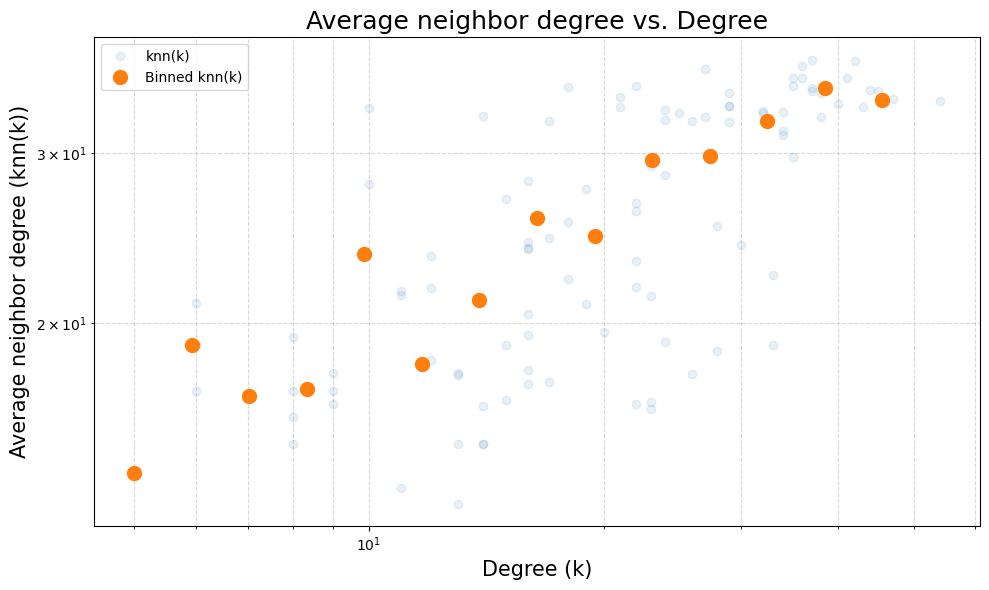

In [147]:
# Plot the average degree of neighbors for each node
xx = list(kDict.values())
yy = [knn[n] for n in kDict.keys()]
xx_filtered = [x for x, y in zip(xx, yy) if not np.isnan(y)]
yy_filtered = [y for y in yy if not np.isnan(y)]

plt.figure(figsize=(10, 6))
plt.loglog(xx_filtered, yy_filtered, 'o', alpha=0.1, label='knn(k)')

logBins = np.logspace(np.log2(np.nanmin(xx_filtered)), np.log2(np.nanmax(xx_filtered)), base=2, num=15)
ybin, xbin, _ = scipy.stats.binned_statistic(xx_filtered, yy_filtered, statistic='mean', bins=logBins)
plt.loglog(xbin[:-1], ybin, 'o', markersize=10, label='Binned knn(k)')

plt.xlabel('Degree (k)', size=15)
plt.ylabel('Average neighbor degree (knn(k))', size=15)
plt.title('Average neighbor degree vs. Degree', size=18)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* These scatter plots show the relationship between the degree of a node and the average degree of its neighbors. An upward trend would indicate assortative mixing, meaning high-degree nodes tend to connect with other high-degree nodes.

### A4 - Degree assortativity/correlation (Undirected Graph)

In [148]:
superstar_network_undirected = nx.read_edgelist('Taylor_Swift_Network_names.txt', create_using=nx.Graph(), delimiter=', ', data=False)
superstar_network_restricted_undirected = nx.Graph()

for node in superstar_network.nodes():
    if superstar_network.out_degree(node) > 0:
        superstar_network_restricted_undirected.add_node(node)
        for succ in superstar_network.successors(node):
            if superstar_network.out_degree(succ) > 0:
                superstar_network_restricted_undirected.add_edge(node, succ)

print(superstar_network_restricted_undirected.number_of_edges())

820


In [149]:
# Add nodes with attributes
for _, row in TS_Nodes_Attributes.iterrows():
    artist_name = row['Artist_Name']
    attributes = row.drop('Artist_Name').to_dict()
    superstar_network_restricted_undirected.add_node(artist_name, **attributes)

# View results
print(superstar_network_restricted_undirected.nodes(data=True))

[('Taylor Swift', {'NB_Followers': 107849786, 'Genres': "['pop']", 'Popularity': 100, 'Nationality': 'United States', 'Age': 35.0, 'Death': False, 'Type': 'Person', 'Gender': 'female', 'Total_Release': 20, 'Available_Markets': 183, 'Year_Last_Release': 2024, 'Type_Last_Release': 'album', 'Acousticness': 0.2463333333333333, 'Danceability': 0.516, 'Duration_MS': 200141.3333333333, 'Energy': 0.6293333333333334, 'Instrumentalness': 1.2733333333333336e-05, 'Liveness': 0.1216666666666666, 'Loudness': -6.62, 'Speechiness': 0.1002666666666666, 'Tempo': 111.84533333333331, 'Valence': 0.5166666666666666}), ('Selena Gomez', {'NB_Followers': 48935201, 'Genres': "['pop', 'post-teen pop']", 'Popularity': 82, 'Nationality': 'United States', 'Age': 32.0, 'Death': False, 'Type': 'Person', 'Gender': 'female', 'Total_Release': 20, 'Available_Markets': 183, 'Year_Last_Release': 2024, 'Type_Last_Release': 'album', 'Acousticness': 0.33121, 'Danceability': 0.6323333333333333, 'Duration_MS': 205810.6666666666

In [150]:
# Calculate degree assortativity
degree_assortativity = nx.degree_assortativity_coefficient(superstar_network_restricted_undirected)
print("Degree Assortativity Coefficient:", degree_assortativity)

Degree Assortativity Coefficient: 0.3166957635210202


* The assortativity coefficient value indicates a moderate level of the likelihood of nodes to attach to others with similar degree. A positive value implies a preference for connecting to similar nodes.

In [151]:
# Calculate assortativity based on specific attributes
categorical_attributes = ['Genres', 'Nationality', 'Type', 'Gender', 'Age']
numerical_attributes = ['NB_Followers', 'Popularity', 'Total_Release', 'Available_Markets', 'Year_Last_Release', 
                        'Acousticness', 'Danceability', 'Duration_MS', 'Energy', 'Instrumentalness', 
                        'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence']

for cat_attr in categorical_attributes:
    assortativity = nx.attribute_assortativity_coefficient(superstar_network_restricted_undirected, cat_attr)
    print(f"Assortativity based on {cat_attr}: {assortativity}")

for num_attr in numerical_attributes:
    assortativity = nx.numeric_assortativity_coefficient(superstar_network_restricted_undirected, num_attr)
    print(f"Assortativity based on {num_attr}: {assortativity}")

Assortativity based on Genres: 0.02656748824967706
Assortativity based on Nationality: 0.07843381042582388
Assortativity based on Type: 0.09423001982107782
Assortativity based on Gender: 0.15435628132393558
Assortativity based on Age: 0.015791429375447953
Assortativity based on NB_Followers: 0.32863429645213
Assortativity based on Popularity: 0.39946271536426553
Assortativity based on Total_Release: -0.012353906665146464
Assortativity based on Available_Markets: -0.002168447126559805
Assortativity based on Year_Last_Release: 0.03243040938178946
Assortativity based on Acousticness: 0.08679907994681582
Assortativity based on Danceability: 0.11160843338834694
Assortativity based on Duration_MS: 0.09229138994508362
Assortativity based on Energy: 0.17934918841888603
Assortativity based on Instrumentalness: 0.12185551182274863
Assortativity based on Liveness: -0.06452671613925554
Assortativity based on Loudness: 0.28598385156202366
Assortativity based on Speechiness: -0.020041528001779066
As

* The assortativity based on categorical and numerical attributes provides insights into the homophily of the network. For instance, assortativity based on genres or nationality can suggest a tendency of artists to be recommended with those of similar genres or from the same countries.

In [152]:
# Degree mixing : Calculate the average degree of neighbors for each node
kDict = dict(superstar_network_restricted_undirected.degree())
knn = {}
for n in superstar_network_restricted_undirected.nodes():
    #neighbors = list(superstar_network_restricted.neighbors(n))
    neighbor_degrees = [kDict[v] for v in superstar_network_restricted_undirected.neighbors(n)]
    knn[n] = np.mean(neighbor_degrees)

/opt/mamba/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/mamba/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


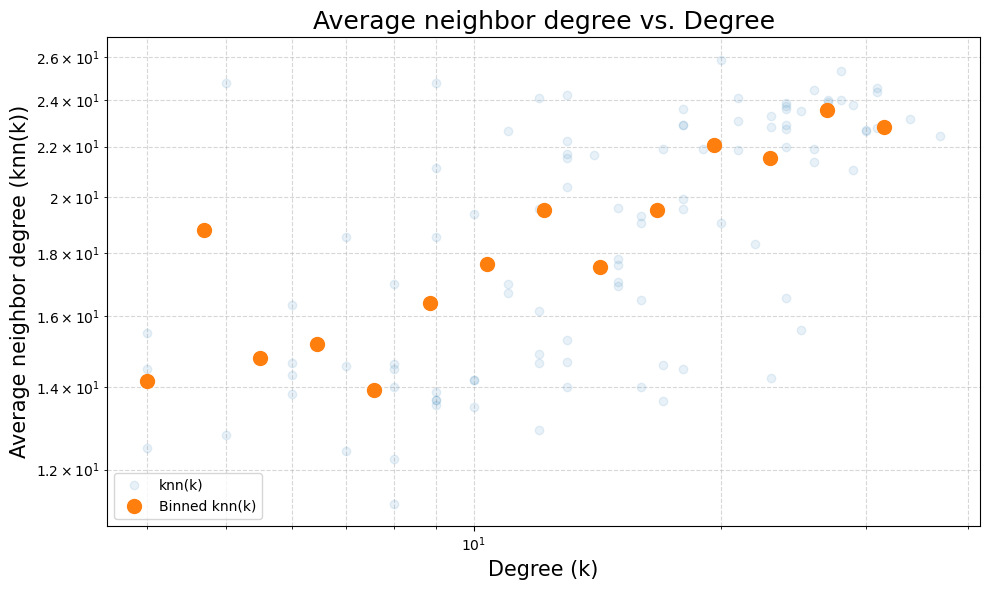

In [153]:
# Plot the average degree of neighbors for each node
xx = list(kDict.values())
yy = [knn[n] for n in kDict.keys()]
xx_filtered = [x for x, y in zip(xx, yy) if not np.isnan(y)]
yy_filtered = [y for y in yy if not np.isnan(y)]

plt.figure(figsize=(10, 6))
plt.loglog(xx_filtered, yy_filtered, 'o', alpha=0.1, label='knn(k)')

logBins = np.logspace(np.log2(np.nanmin(xx_filtered)), np.log2(np.nanmax(xx_filtered)), base=2, num=15)
ybin, xbin, _ = scipy.stats.binned_statistic(xx_filtered, yy_filtered, statistic='mean', bins=logBins)
plt.loglog(xbin[:-1], ybin, 'o', markersize=10, label='Binned knn(k)')

plt.xlabel('Degree (k)', size=15)
plt.ylabel('Average neighbor degree (knn(k))', size=15)
plt.title('Average neighbor degree vs. Degree', size=18)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* These scatter plots show the relationship between the degree of a node and the average degree of its neighbors. An upward trend would indicate assortative mixing, meaning high-degree nodes tend to connect with other high-degree nodes.

### A5 - Weighted networks (Directed Graph)

In [154]:
# Assign weights based on the Popularity attribute
for u, v in superstar_network_restricted.edges():
    popularity_u = superstar_network_restricted.nodes[u]['Popularity']
    popularity_v = superstar_network_restricted.nodes[v]['Popularity']
    weight = max(popularity_u, popularity_v)
    superstar_network_restricted[u][v]['weight'] = weight
    
# View results
print(superstar_network_restricted.edges(data=True))

[('Taylor Swift', 'Selena Gomez', {'weight': 100}), ('Taylor Swift', 'Olivia Rodrigo', {'weight': 100}), ('Taylor Swift', 'Katy Perry', {'weight': 100}), ('Taylor Swift', 'Ariana Grande', {'weight': 100}), ('Taylor Swift', 'Harry Styles', {'weight': 100}), ('Taylor Swift', 'Camila Cabello', {'weight': 100}), ('Taylor Swift', 'Demi Lovato', {'weight': 100}), ('Taylor Swift', 'One Direction', {'weight': 100}), ('Taylor Swift', 'Meghan Trainor', {'weight': 100}), ('Taylor Swift', 'Shawn Mendes', {'weight': 100}), ('Taylor Swift', 'Miley Cyrus', {'weight': 100}), ('Taylor Swift', 'Sabrina Carpenter', {'weight': 100}), ('Taylor Swift', 'Dua Lipa', {'weight': 100}), ('Taylor Swift', 'Justin Bieber', {'weight': 100}), ('Taylor Swift', 'Lana Del Rey', {'weight': 100}), ('Taylor Swift', 'Halsey', {'weight': 100}), ('Taylor Swift', 'Billie Eilish', {'weight': 100}), ('Taylor Swift', 'Conan Gray', {'weight': 100}), ('Taylor Swift', 'Charlie Puth', {'weight': 100}), ('Taylor Swift', 'ZAYN', {'weig

In [155]:
# Calculate node strength
in_strength = dict(superstar_network_restricted.in_degree(weight='weight'))
out_strength = dict(superstar_network_restricted.out_degree(weight='weight'))

# View results
print("In-Strength:", in_strength)

In-Strength: {'Taylor Swift': 100, 'Selena Gomez': 1467, 'Olivia Rodrigo': 735, 'Katy Perry': 1221, 'Ariana Grande': 853, 'Harry Styles': 1245, 'Camila Cabello': 1866, 'Demi Lovato': 2234, 'One Direction': 1039, 'Meghan Trainor': 1400, 'Shawn Mendes': 1374, 'Miley Cyrus': 1324, 'Sabrina Carpenter': 1118, 'Dua Lipa': 1332, 'Justin Bieber': 367, 'Lana Del Rey': 741, 'Halsey': 1683, 'Billie Eilish': 373, 'Conan Gray': 1614, 'Charlie Puth': 850, 'ZAYN': 1323, 'Selena Gomez & The Scene': 529, 'Fifth Harmony': 2119, 'Nick Jonas': 1749, 'Bebe Rexha': 2995, 'Anne-Marie': 2087, 'Little Mix': 2210, 'Zara Larsson': 2076, 'Hailee Steinfeld': 2119, 'Alessia Cara': 1544, 'Zendaya': 1171, 'Tate McRae': 515, 'Madison Beer': 650, 'Doja Cat': 985, 'Gracie Abrams': 639, 'Dove Cameron': 697, 'Melanie Martinez': 684, 'Joshua Bassett': 248, 'SZA': 550, 'girl in red': 1230, 'Britney Spears': 1087, 'Lady Gaga': 602, 'Kesha': 1782, 'Avril Lavigne': 726, 'Jessie J': 1348, 'Kelly Clarkson': 1042, 'Christina Agui

In [156]:
# View results
print("Out-Strength:", out_strength)

Out-Strength: {'Taylor Swift': 2000, 'Selena Gomez': 1663, 'Olivia Rodrigo': 1816, 'Katy Perry': 1686, 'Ariana Grande': 1880, 'Harry Styles': 1710, 'Camila Cabello': 1641, 'Demi Lovato': 1566, 'One Direction': 1686, 'Meghan Trainor': 1575, 'Shawn Mendes': 1642, 'Miley Cyrus': 1720, 'Sabrina Carpenter': 1669, 'Dua Lipa': 1747, 'Justin Bieber': 1785, 'Lana Del Rey': 1820, 'Halsey': 1621, 'Billie Eilish': 1794, 'Conan Gray': 1142, 'Charlie Puth': 1366, 'ZAYN': 1499, 'Selena Gomez & The Scene': 736, 'Fifth Harmony': 1255, 'Nick Jonas': 1075, 'Bebe Rexha': 1361, 'Anne-Marie': 1181, 'Little Mix': 1286, 'Zara Larsson': 941, 'Hailee Steinfeld': 1083, 'Alessia Cara': 1276, 'Zendaya': 499, 'Tate McRae': 855, 'Madison Beer': 1160, 'Doja Cat': 1060, 'Gracie Abrams': 628, 'Dove Cameron': 509, 'Melanie Martinez': 1157, 'Joshua Bassett': 218, 'SZA': 182, 'girl in red': 865, 'Britney Spears': 741, 'Lady Gaga': 1284, 'Kesha': 635, 'Avril Lavigne': 557, 'Jessie J': 911, 'Kelly Clarkson': 388, 'Christina

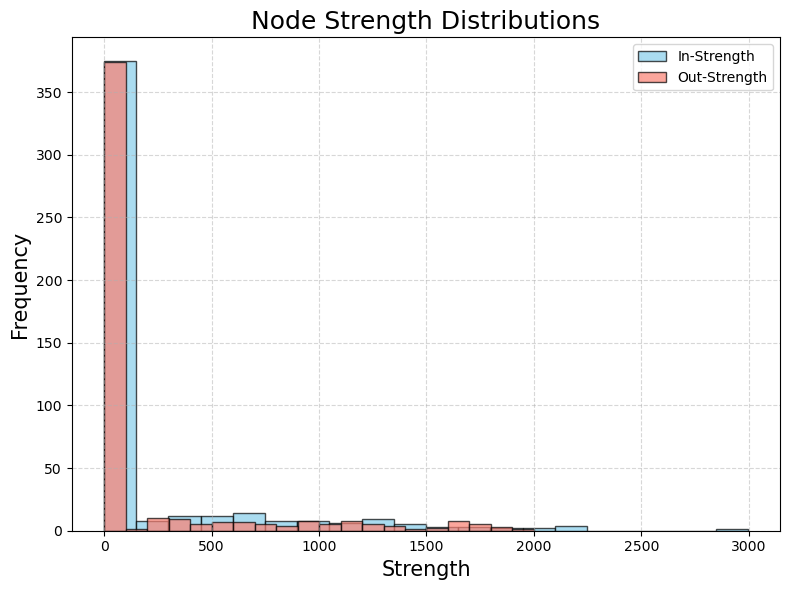

In [157]:
# Strength Distributions
in_strength_values = list(in_strength.values())
out_strength_values = list(out_strength.values())

plt.figure(figsize=(8, 6))
plt.hist(in_strength_values, bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='In-Strength')
plt.hist(out_strength_values, bins=20, color='salmon', edgecolor='black', alpha=0.7, label='Out-Strength')
plt.xlabel('Strength', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Node Strength Distributions', size=18)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* These histograms show the distribution of node strengths in the network. Since the strength is weighted by artist popularity, this plot highlights how influence (through recommendations) is distributed among artists.By weighting connections based on artist popularity, node strength distributions provide a measure of influence within the network. High-strength nodes could signify influential artists within the recommendation network.
* By comparing the distributions of in-strength and out-strength, we notice that we have similar frequencies indicate that there are comparable numbers of nodes with similar strengths in both the in-strength and out-strength distributions. The similar frequencies indicate that the network experiences interactions or influence in both directions, without a significant bias towards incoming or outgoing edges. The differences in strength levels suggest that there's a significant flow of influence or interactions coming into those nodes from other nodes in the network.

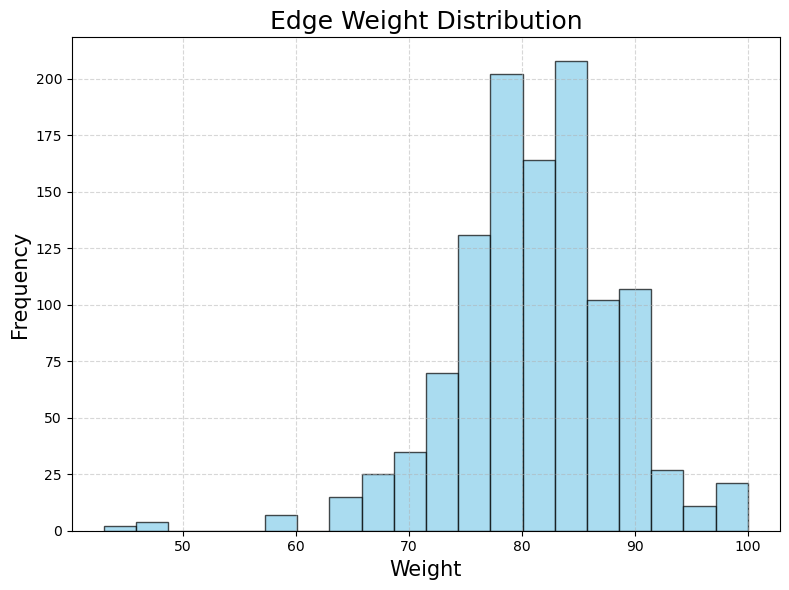

In [158]:
# Weight Distributions
edge_weights = [data['weight'] for _, _, data in superstar_network_restricted.edges(data=True)]

plt.figure(figsize=(8, 6))
plt.hist(edge_weights, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Weight', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Edge Weight Distribution', size=18)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* The distribution of edge weights reveals how the recommendation strengths are spread across the network. We notice a peak at a particular weight range (close to 85), it indicates that a significant number of edges have weights within that ranges which suggests that recommendations are mostly among equally popular artists.

In [159]:
# Correlation Between node degree and edge weights (by using Pearson correlation coefficient)
node_weights = {}
for node in superstar_network_restricted.nodes():
    node_weight = sum(data['weight'] for _, _, data in superstar_network_restricted.edges(node, data=True)) # Calculate the sum of edge weights connected to each node
    node_weights[node] = node_weight
node_weight_values = np.array(list(node_weights.values()))
degree_values = np.array([superstar_network_restricted.degree(node) for node in superstar_network_restricted.nodes()])

correlation_coefficient, p_value = pearsonr(degree_values, node_weight_values)

print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Pearson correlation coefficient: 0.9303107276297787
p-value: 7.299287352970711e-207


* The Pearson correlation coefficient between node degree and edge weights is 0.930, with a very low p-value (close to zero). This indicates a strong positive correlation between the two variables.
* In simpler terms, as the degree of a node (its number of connections) increases, the total weight of its edges also tends to increase significantly. This suggests that nodes with higher degrees tend to have stronger and more influential connections within the network.

In [160]:
# Weight assignment based on the order of recommendation
def assign_weight_based_on_recommendation_order(G):
    sorted_edges = sorted(G.edges(), key=lambda x: x[1])  
    weight_value = 1.0 
    for u, v in sorted_edges:
        G[u][v]['weight'] = weight_value
        weight_value += 0.1  
assign_weight_based_on_recommendation_order(superstar_network_restricted)

# View results
print(superstar_network_restricted.edges(data=True))

[('Taylor Swift', 'Selena Gomez', {'weight': 91.89999999999905}), ('Taylor Swift', 'Olivia Rodrigo', {'weight': 82.3999999999996}), ('Taylor Swift', 'Katy Perry', {'weight': 56.40000000000053}), ('Taylor Swift', 'Ariana Grande', {'weight': 7.9999999999999885}), ('Taylor Swift', 'Harry Styles', {'weight': 46.30000000000039}), ('Taylor Swift', 'Camila Cabello', {'weight': 17.29999999999998}), ('Taylor Swift', 'Demi Lovato', {'weight': 29.30000000000015}), ('Taylor Swift', 'One Direction', {'weight': 83.19999999999955}), ('Taylor Swift', 'Meghan Trainor', {'weight': 71.50000000000021}), ('Taylor Swift', 'Shawn Mendes', {'weight': 94.29999999999892}), ('Taylor Swift', 'Miley Cyrus', {'weight': 74.00000000000007}), ('Taylor Swift', 'Sabrina Carpenter', {'weight': 90.59999999999913}), ('Taylor Swift', 'Dua Lipa', {'weight': 34.00000000000021}), ('Taylor Swift', 'Justin Bieber', {'weight': 55.70000000000052}), ('Taylor Swift', 'Lana Del Rey', {'weight': 62.00000000000061}), ('Taylor Swift', '

In [161]:
# Calculate node strength
in_strength = dict(superstar_network_restricted.in_degree(weight='weight'))
out_strength = dict(superstar_network_restricted.out_degree(weight='weight'))

# View results
print("In-Strength:", in_strength)

In-Strength: {'Taylor Swift': 99.19999999999864, 'Selena Gomez': 1575.899999999983, 'Olivia Rodrigo': 661.9999999999966, 'Katy Perry': 798.7000000000075, 'Ariana Grande': 75.59999999999988, 'Harry Styles': 657.3000000000055, 'Camila Cabello': 403.6999999999999, 'Demi Lovato': 826.2000000000045, 'One Direction': 1004.9999999999942, 'Meghan Trainor': 1229.100000000003, 'Shawn Mendes': 1520.7999999999822, 'Miley Cyrus': 1120.5000000000007, 'Sabrina Carpenter': 1185.5999999999883, 'Dua Lipa': 520.5000000000034, 'Justin Bieber': 223.40000000000208, 'Lana Del Rey': 498.80000000000496, 'Halsey': 895.0000000000073, 'Billie Eilish': 62.99999999999985, 'Conan Gray': 537.7000000000025, 'Charlie Puth': 214.50000000000037, 'ZAYN': 1687.1999999999725, 'Selena Gomez & The Scene': 657.2999999999926, 'Fifth Harmony': 1047.6000000000076, 'Nick Jonas': 1835.399999999994, 'Bebe Rexha': 477.29999999999893, 'Anne-Marie': 159.89999999999986, 'Little Mix': 1852.2000000000146, 'Zara Larsson': 2796.299999999952

In [162]:
# View results
print("Out-Strength:", out_strength)

Out-Strength: {'Taylor Swift': 1109.3999999999974, 'Selena Gomez': 1083.9999999999952, 'Olivia Rodrigo': 1180.199999999995, 'Katy Perry': 1020.0, 'Ariana Grande': 1177.1999999999969, 'Harry Styles': 1310.7999999999945, 'Camila Cabello': 1083.5999999999951, 'Demi Lovato': 1162.199999999997, 'One Direction': 1092.4999999999984, 'Meghan Trainor': 959.2999999999997, 'Shawn Mendes': 1045.3999999999958, 'Miley Cyrus': 1050.5000000000014, 'Sabrina Carpenter': 1216.1999999999964, 'Dua Lipa': 982.2999999999969, 'Justin Bieber': 1006.0999999999985, 'Lana Del Rey': 1288.7999999999931, 'Halsey': 1044.5999999999938, 'Billie Eilish': 1184.5999999999938, 'Conan Gray': 1075.9999999999882, 'Charlie Puth': 932.8999999999944, 'ZAYN': 965.9999999999975, 'Selena Gomez & The Scene': 537.8999999999986, 'Fifth Harmony': 985.4999999999957, 'Nick Jonas': 939.6999999999954, 'Bebe Rexha': 844.8999999999993, 'Anne-Marie': 723.7999999999984, 'Little Mix': 931.0999999999967, 'Zara Larsson': 488.89999999999964, 'Hail

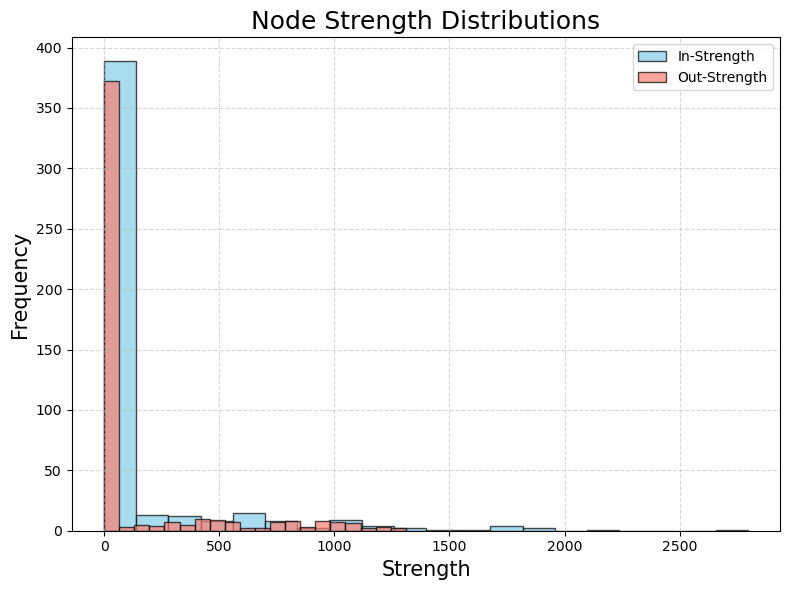

In [163]:
# Strength Distributions
in_strength_values = list(in_strength.values())
out_strength_values = list(out_strength.values())

plt.figure(figsize=(8, 6))
plt.hist(in_strength_values, bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='In-Strength')
plt.hist(out_strength_values, bins=20, color='salmon', edgecolor='black', alpha=0.7, label='Out-Strength')
plt.xlabel('Strength', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Node Strength Distributions', size=18)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* These histograms show the distribution of node strengths in the network. Since the strength is weighted by artist popularity, this plot highlights how influence (through recommendations) is distributed among artists.By weighting connections based on artist's order, node strength distributions provide a measure of influence within the network. High-strength nodes could signify influential artists within the recommendation network.
* By comparing the distributions of in-strength and out-strength, we notice that we have similar frequencies indicate that there are comparable numbers of nodes with similar strengths in both the in-strength and out-strength distributions. The similar frequencies indicate that the network experiences interactions or influence in both directions, without a significant bias towards incoming or outgoing edges. The differences in strength levels suggest that there's a significant flow of influence or interactions coming into those nodes from other nodes in the network.

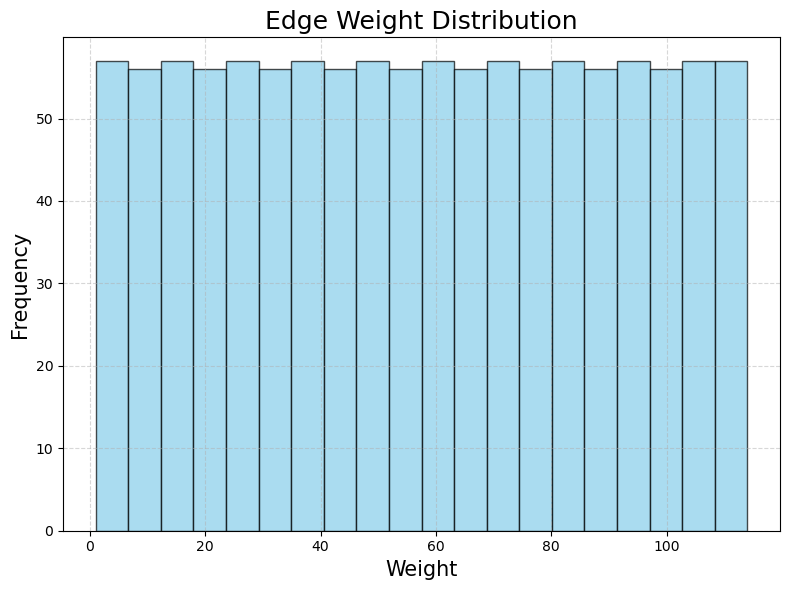

In [164]:
# Weight Distributions
edge_weights = [data['weight'] for _, _, data in superstar_network_restricted.edges(data=True)]

plt.figure(figsize=(8, 6))
plt.hist(edge_weights, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Weight', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Edge Weight Distribution', size=18)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* The distribution of edge weights reveals how the recommendation strengths are spread across the network. 
* As the weight distribution appears random and does not reflect a clear pattern, it may indicate a more varied or unpredictable influence of recommendation order on connection strength.

In [165]:
# Correlation Between node degree and edge weights (by using Pearson correlation coefficient)
node_weights = {}
for node in superstar_network_restricted.nodes():
    node_weight = sum(data['weight'] for _, _, data in superstar_network_restricted.edges(node, data=True)) # Calculate the sum of edge weights connected to each node
    node_weights[node] = node_weight
node_weight_values = np.array(list(node_weights.values()))
degree_values = np.array([superstar_network_restricted.degree(node) for node in superstar_network_restricted.nodes()])

correlation_coefficient, p_value = pearsonr(degree_values, node_weight_values)

print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Pearson correlation coefficient: 0.9403875610055616
p-value: 2.8196526272108e-222


* The Pearson correlation coefficient between node degree and edge weights is 0.94, with a very low p-value (close to zero). This indicates a strong positive correlation between the two variables.
* In simpler terms, as the degree of a node (its number of connections) increases, the total weight of its edges also tends to increase significantly. This suggests that nodes with higher degrees tend to have stronger and more influential connections within the network.

### A6 - Weighted networks (Undirected Graph)

In [166]:
# Assign weights based on the Popularity attribute
for u, v in superstar_network_restricted_undirected.edges():
    popularity_u = superstar_network_restricted_undirected.nodes[u]['Popularity']
    popularity_v = superstar_network_restricted_undirected.nodes[v]['Popularity']
    weight = max(popularity_u, popularity_v)
    superstar_network_restricted_undirected[u][v]['weight'] = weight
    
# View results
print(superstar_network_restricted_undirected.edges(data=True))

[('Taylor Swift', 'Selena Gomez', {'weight': 100}), ('Taylor Swift', 'Olivia Rodrigo', {'weight': 100}), ('Taylor Swift', 'Katy Perry', {'weight': 100}), ('Taylor Swift', 'Ariana Grande', {'weight': 100}), ('Taylor Swift', 'Harry Styles', {'weight': 100}), ('Taylor Swift', 'Camila Cabello', {'weight': 100}), ('Taylor Swift', 'Demi Lovato', {'weight': 100}), ('Taylor Swift', 'One Direction', {'weight': 100}), ('Taylor Swift', 'Meghan Trainor', {'weight': 100}), ('Taylor Swift', 'Shawn Mendes', {'weight': 100}), ('Taylor Swift', 'Miley Cyrus', {'weight': 100}), ('Taylor Swift', 'Sabrina Carpenter', {'weight': 100}), ('Taylor Swift', 'Dua Lipa', {'weight': 100}), ('Taylor Swift', 'Justin Bieber', {'weight': 100}), ('Taylor Swift', 'Lana Del Rey', {'weight': 100}), ('Taylor Swift', 'Halsey', {'weight': 100}), ('Taylor Swift', 'Billie Eilish', {'weight': 100}), ('Taylor Swift', 'Conan Gray', {'weight': 100}), ('Taylor Swift', 'Charlie Puth', {'weight': 100}), ('Taylor Swift', 'ZAYN', {'weig

In [167]:
# Calculate node strength
strength = dict(superstar_network_restricted_undirected.degree(weight='weight'))

# View results
print("Strength:", strength)

Strength: {'Taylor Swift': 2000, 'Selena Gomez': 2369, 'Olivia Rodrigo': 1816, 'Katy Perry': 2229, 'Ariana Grande': 2169, 'Harry Styles': 2268, 'Camila Cabello': 2595, 'Demi Lovato': 2777, 'One Direction': 1963, 'Meghan Trainor': 2264, 'Shawn Mendes': 2522, 'Miley Cyrus': 2528, 'Sabrina Carpenter': 2031, 'Dua Lipa': 2376, 'Justin Bieber': 1885, 'Lana Del Rey': 2106, 'Halsey': 2574, 'Billie Eilish': 1894, 'Conan Gray': 2103, 'Charlie Puth': 1973, 'ZAYN': 1944, 'Selena Gomez & The Scene': 901, 'Fifth Harmony': 2405, 'Nick Jonas': 1882, 'Bebe Rexha': 2995, 'Anne-Marie': 2165, 'Little Mix': 2284, 'Zara Larsson': 2076, 'Hailee Steinfeld': 2256, 'Alessia Cara': 1833, 'Zendaya': 1309, 'Tate McRae': 940, 'Madison Beer': 1417, 'Doja Cat': 1333, 'Gracie Abrams': 793, 'Dove Cameron': 910, 'Melanie Martinez': 1336, 'Joshua Bassett': 308, 'SZA': 550, 'girl in red': 1465, 'Britney Spears': 1249, 'Lady Gaga': 1369, 'Kesha': 1782, 'Avril Lavigne': 726, 'Jessie J': 1506, 'Kelly Clarkson': 1042, 'Christ

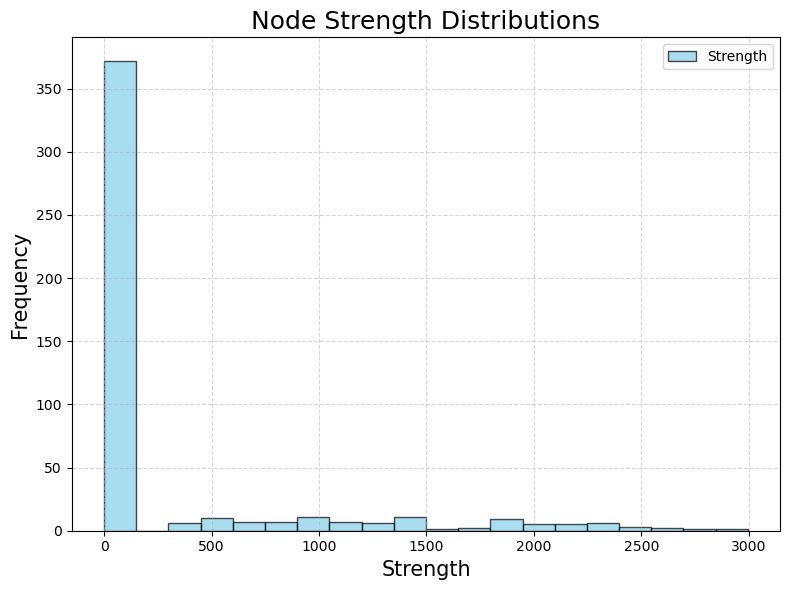

In [168]:
# Strength Distributions
strength_values = list(strength.values())

plt.figure(figsize=(8, 6))
plt.hist(strength_values, bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='Strength')
plt.xlabel('Strength', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Node Strength Distributions', size=18)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* This histogram show the distribution of node strengths in the network. Since the strength is weighted by artist popularity, this plot highlights how influence (through recommendations) is distributed among artists. By weighting connections based on artist popularity, node strength distributions provide a measure of influence within the network. High-strength nodes could signify influential artists within the recommendation network.

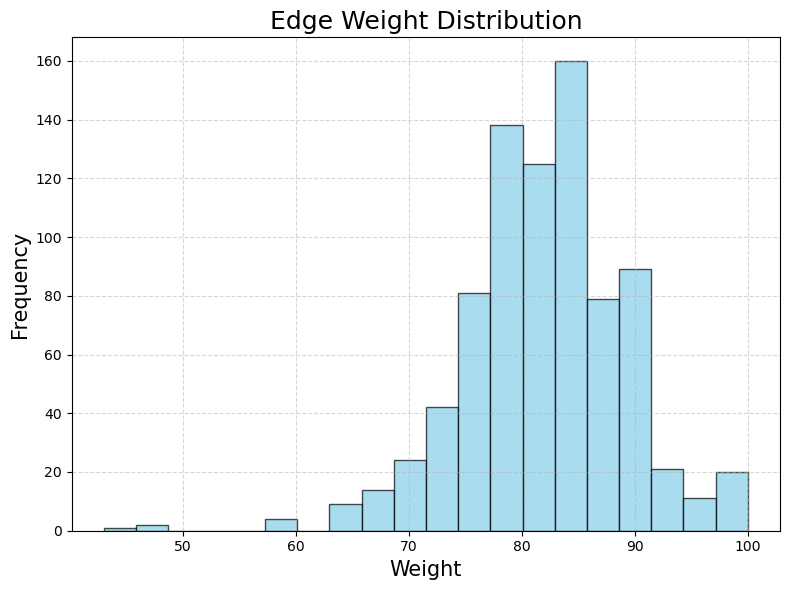

In [169]:
# Weight Distributions
edge_weights = [data['weight'] for _, _, data in superstar_network_restricted_undirected.edges(data=True)]

plt.figure(figsize=(8, 6))
plt.hist(edge_weights, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Weight', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Edge Weight Distribution', size=18)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* The distribution of edge weights reveals how the recommendation strengths are spread across the network. We notice a peak at a particular weight range (close to 85), it indicates that a significant number of edges have weights within that ranges which suggests that recommendations are mostly among equally popular artists.

In [170]:
# Correlation Between node degree and edge weights (by using Pearson correlation coefficient)
node_weights = {}
for node in superstar_network_restricted_undirected.nodes():
    node_weight = sum(data['weight'] for _, _, data in superstar_network_restricted_undirected.edges(node, data=True)) # Calculate the sum of edge weights connected to each node
    node_weights[node] = node_weight
node_weight_values = np.array(list(node_weights.values()))
degree_values = np.array([superstar_network_restricted_undirected.degree(node) for node in superstar_network_restricted_undirected.nodes()])

correlation_coefficient, p_value = pearsonr(degree_values, node_weight_values)

print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Pearson correlation coefficient: 0.9976240386512647
p-value: 0.0


* The Pearson correlation coefficient between node degree and edge weights is 0.99, with a very low p-value (close to zero). This indicates a strong positive correlation between the two variables.
* In simpler terms, as the degree of a node (its number of connections) increases, the total weight of its edges also tends to increase significantly. This suggests that nodes with higher degrees tend to have stronger and more influential connections within the network.

In [171]:
# Weight assignment based on the order of recommendation
def assign_weight_based_on_recommendation_order(G):
    sorted_edges = sorted(G.edges(), key=lambda x: x[1])  
    weight_value = 1.0 
    for u, v in sorted_edges:
        G[u][v]['weight'] = weight_value
        weight_value += 0.1  
assign_weight_based_on_recommendation_order(superstar_network_restricted_undirected)

# View results
print(superstar_network_restricted_undirected.edges(data=True))

[('Taylor Swift', 'Selena Gomez', {'weight': 67.00000000000047}), ('Taylor Swift', 'Olivia Rodrigo', {'weight': 60.200000000000585}), ('Taylor Swift', 'Katy Perry', {'weight': 43.60000000000035}), ('Taylor Swift', 'Ariana Grande', {'weight': 8.299999999999988}), ('Taylor Swift', 'Harry Styles', {'weight': 33.500000000000206}), ('Taylor Swift', 'Camila Cabello', {'weight': 15.299999999999963}), ('Taylor Swift', 'Demi Lovato', {'weight': 23.100000000000062}), ('Taylor Swift', 'One Direction', {'weight': 60.40000000000059}), ('Taylor Swift', 'Meghan Trainor', {'weight': 54.0000000000005}), ('Taylor Swift', 'Shawn Mendes', {'weight': 67.50000000000044}), ('Taylor Swift', 'Miley Cyrus', {'weight': 55.200000000000514}), ('Taylor Swift', 'Sabrina Carpenter', {'weight': 66.5000000000005}), ('Taylor Swift', 'Dua Lipa', {'weight': 24.900000000000087}), ('Taylor Swift', 'Justin Bieber', {'weight': 42.10000000000033}), ('Taylor Swift', 'Lana Del Rey', {'weight': 46.100000000000385}), ('Taylor Swif

In [172]:
# Calculate node strength
strength = dict(superstar_network_restricted_undirected.degree(weight='weight'))

# View results
print("Strength:", strength)

Strength: {'Taylor Swift': 830.400000000005, 'Selena Gomez': 1135.7000000000055, 'Olivia Rodrigo': 857.300000000005, 'Katy Perry': 929.7000000000063, 'Ariana Grande': 854.8000000000044, 'Harry Styles': 1149.7000000000062, 'Camila Cabello': 1053.9000000000044, 'Demi Lovato': 1366.4000000000078, 'One Direction': 1062.9000000000076, 'Meghan Trainor': 1190.2000000000073, 'Shawn Mendes': 1293.300000000007, 'Miley Cyrus': 1209.4000000000085, 'Sabrina Carpenter': 1129.700000000007, 'Dua Lipa': 810.1000000000035, 'Justin Bieber': 819.5000000000055, 'Lana Del Rey': 1087.0000000000048, 'Halsey': 1138.0000000000045, 'Billie Eilish': 589.2000000000005, 'Conan Gray': 1061.3000000000022, 'Charlie Puth': 718.8000000000018, 'ZAYN': 1274.7000000000007, 'Selena Gomez & The Scene': 581.5000000000031, 'Fifth Harmony': 1130.7000000000057, 'Nick Jonas': 1255.30000000001, 'Bebe Rexha': 1050.2000000000041, 'Anne-Marie': 655.8000000000025, 'Little Mix': 1351.5000000000089, 'Zara Larsson': 1589.4999999999995, '

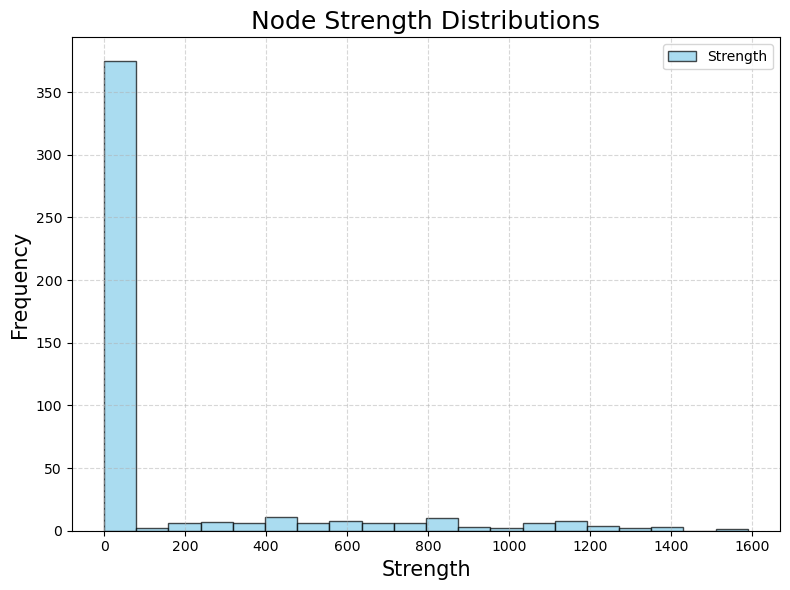

In [173]:
# Strength Distributions
strength_values = list(strength.values())

plt.figure(figsize=(8, 6))
plt.hist(strength_values, bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='Strength')
plt.xlabel('Strength', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Node Strength Distributions', size=18)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* This histogram show the distribution of node strengths in the network. Since the strength is weighted by artist popularity, this plot highlights how influence (through recommendations) is distributed among artists. By weighting connections based on artist's order, node strength distributions provide a measure of influence within the network. High-strength nodes could signify influential artists within the recommendation network.

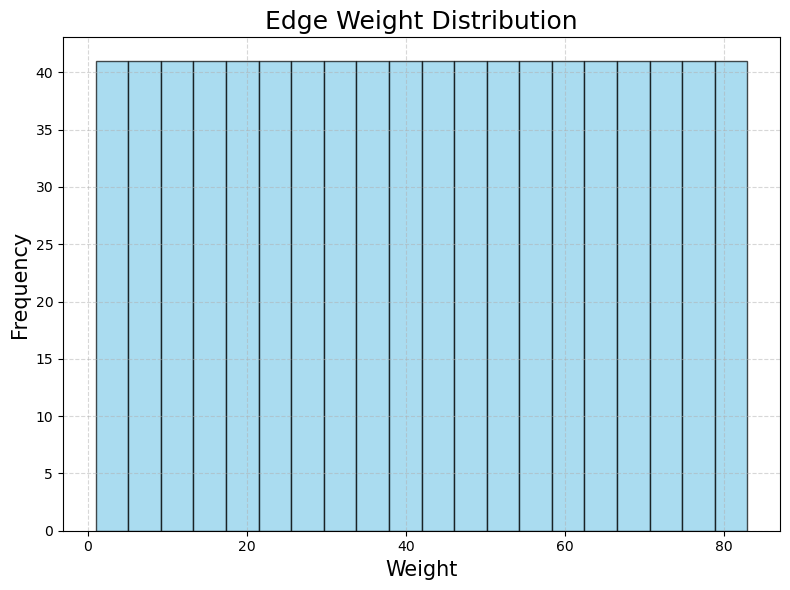

In [174]:
# Weight Distributions
edge_weights = [data['weight'] for _, _, data in superstar_network_restricted_undirected.edges(data=True)]

plt.figure(figsize=(8, 6))
plt.hist(edge_weights, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Weight', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Edge Weight Distribution', size=18)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* The distribution of edge weights reveals how the recommendation strengths are spread across the network. 
* As the weight distribution appears random and does not reflect a clear pattern, it may indicate a more varied or unpredictable influence of recommendation order on connection strength.

In [175]:
# Correlation Between node degree and edge weights (by using Pearson correlation coefficient)
node_weights = {}
for node in superstar_network_restricted_undirected.nodes():
    node_weight = sum(data['weight'] for _, _, data in superstar_network_restricted_undirected.edges(node, data=True)) # Calculate the sum of edge weights connected to each node
    node_weights[node] = node_weight
node_weight_values = np.array(list(node_weights.values()))
degree_values = np.array([superstar_network_restricted_undirected.degree(node) for node in superstar_network_restricted_undirected.nodes()])

correlation_coefficient, p_value = pearsonr(degree_values, node_weight_values)

print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Pearson correlation coefficient: 0.9508419518758023
p-value: 2.0624464099787878e-241


### A7 - Rich Club (Undirected Graph)

In [176]:
superstar_network_undirected = nx.read_edgelist('Taylor_Swift_Network_names.txt', create_using=nx.Graph(), delimiter=', ', data=False)
superstar_network_restricted_undirected = nx.Graph()

for node in superstar_network.nodes():
    if superstar_network.out_degree(node) > 19:
        superstar_network_restricted_undirected.add_node(node)
        for succ in superstar_network.successors(node):
            if superstar_network.out_degree(succ) > 19:
                superstar_network_restricted_undirected.add_edge(node, succ)

print(superstar_network_restricted_undirected.number_of_edges())

820


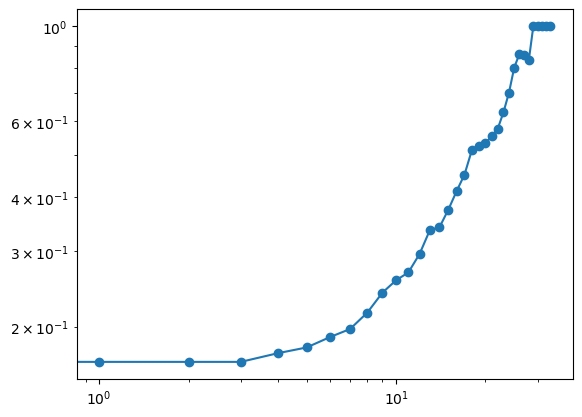

In [177]:
rc = nx.rich_club_coefficient(superstar_network_restricted_undirected, normalized=False, seed=42)
plt.loglog(rc.keys(),rc.values(),'o-')

* Each point on the graph represents the rich club coefficient at a certain node degree.
* The plotted points form a curve that rises sharply and then plateaus, suggests the presence of rich clubs in the network, where highly connected nodes tend to form tightly interconnected groups. The higher the line, the stronger the tendency for rich clubs to form in the network.

## B -Dynamical network property

### B1 - The Robustness (Undirected Graph based on random failure)

In [178]:
nodes_small=[i for i in superstar_network_restricted_undirected.nodes() if superstar_network_restricted_undirected.degree(i)>5]
len(nodes_small)

95

In [179]:
Gs= superstar_network_restricted_undirected.subgraph(nodes_small)
fList=np.linspace(0,1,20)
NtoRem=[int(i*Gs.number_of_nodes()) for i in fList]
print(NtoRem)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 64, 70, 75, 80, 84, 90, 95]


In [180]:
sf=[]
for nn in NtoRem[:-3]:
    thisG=Gs.copy()
    ll=random.sample(list(Gs.nodes()),nn)
    thisG.remove_nodes_from(ll)
    thisSf=len(max(sorted(nx.connected_components(thisG), key = len, reverse=True)))
    sf.append(thisSf/float(Gs.number_of_nodes()))

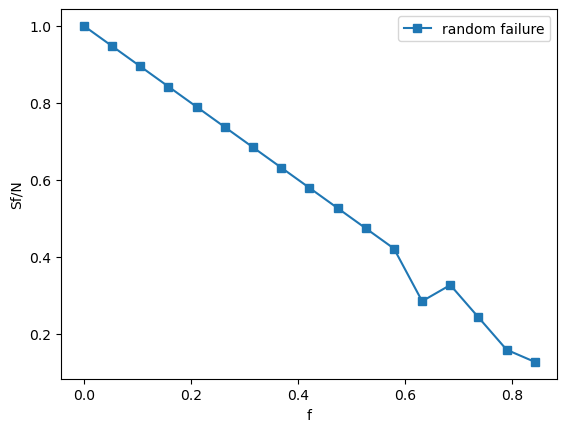

In [181]:
plt.plot(fList[:-3],sf,'s-',label='random failure')
plt.xlabel('f')
plt.ylabel('Sf/N')
plt.legend()
plt.show()

* This graph illustrates the network's resilience to random node failures.

* As more nodes are removed, the normalized size of the largest connected component decreases. This indicates that the network becomes more fragmented and less resilient to random failures. The downward trend in the curve suggests that even a small fraction of node removal can significantly impact the network's connectivity. This information is crucial for understanding the network's robustness and designing strategies to enhance its resilience against random failures.
* As we have a gradual decline suggests greater resilience, it indicates that even with the removal of nodes, the network remains relatively well-connected.

### B2 - The Robustness (Undirected Graph based on centrality) : Target Attack

In [182]:
centrality_measure = nx.degree_centrality(superstar_network_restricted_undirected)
nodes_sorted_by_centrality = sorted(centrality_measure, key=centrality_measure.get, reverse=True)
fList = np.linspace(0, 1, 20)
NtoRem = [int(i * len(nodes_sorted_by_centrality)) for i in fList]

In [183]:
sf = []
for nn in NtoRem[:-3]:
    thisG = superstar_network_restricted_undirected.copy()
    nodes_to_remove = nodes_sorted_by_centrality[:nn]
    thisG.remove_nodes_from(nodes_to_remove)
    largest_cc_size = len(max(nx.connected_components(thisG), key=len))
    sf.append(largest_cc_size / float(len(superstar_network_restricted_undirected)))

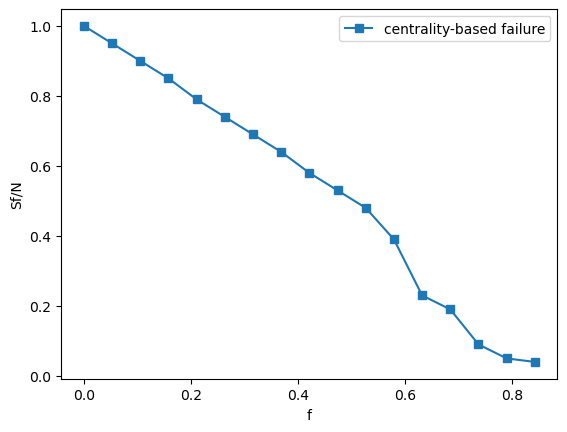

In [184]:
plt.plot(fList[:-3], sf, 's-', label='centrality-based failure')
plt.xlabel('f')
plt.ylabel('Sf/N')
plt.legend()
plt.show()

* In this case, the robustness analysis involves targeted removal of nodes based on centrality measures (degree centrality). The resulting graph can highlight the importance of specific artists within the network. Nodes with high centrality values that, when removed, lead to a significant reduction in network connectivity, may represent key influencers or central figures within the music industry.
* As the centrality-based failure line decreases gradually as more nodes are removed, it indicates that the network is relatively robust to targeted attacks on highly central nodes. So even if highly central nodes are removed, the network can still maintain its overall connectivity reasonably well.

### B3 - Page rank (Directed Graph)

In [185]:
PR = nx.pagerank(superstar_network_restricted)
sorted_PR = sorted(PR.items(), key=lambda x: x[1], reverse=True)

# View results
print("PageRank values for each artist (in descending order):")
for artist, rank in sorted_PR:
    print(f"{artist}: {rank}")

PageRank values for each artist (in descending order):
Sofia Carson: 0.023363876250852296
Zendaya: 0.023339878281430186
mxmtoon: 0.022494705330613873
Ross Lynch: 0.02189766485681544
Olivia Holt: 0.01945159202953302
Zara Larsson: 0.01886105510265168
beabadoobee: 0.018828360214254564
Rita Ora: 0.018594066079746164
girl in red: 0.018104899115121673
Kesha: 0.016488097858306076
Laura Marano: 0.015336129935704644
Little Mix: 0.014269623059247226
Ricky Montgomery: 0.01349347922416982
Nick Jonas: 0.013049989941022513
Mitski: 0.012670315693969399
TV Girl: 0.012110343467604015
Jessie J: 0.011929498671820827
Tove Lo: 0.011508724175816887
Iggy Azalea: 0.011441211462734897
The Vamps: 0.010456317327598845
Hailee Steinfeld: 0.010431324295770344
Kelly Clarkson: 0.00985851322741071
Wallows: 0.00972291336571054
Sabrina Carpenter: 0.00957707513012023
Mac DeMarco: 0.00924185204162325
Fifth Harmony: 0.008758737154398616
Niall Horan: 0.008244812380853329
Clairo: 0.007413860414286627
Jennifer Lopez: 0.007206

* PageRank measures the importance of each artist in the network based on the structure of connections.
* Artists with higher PageRank values are more influential and are likely to be recommended more frequently.
* Conversely, artists with lower PageRank values may have less influence and may be recommended less often.

### B4 - Page rank (Undirected Graph)

In [209]:
PR = nx.pagerank(superstar_network_restricted_undirected)
sorted_PR = sorted(PR.items(), key=lambda x: x[1], reverse=True)

# View results
print("PageRank values for each artist (in descending order):")
for artist, rank in sorted_PR:
    print(f"{artist}: {rank}")

PageRank values for each artist (in descending order):
Bebe Rexha: 0.019048329336842845
Demi Lovato: 0.017482854379410526
Conan Gray: 0.016489259763647367
Halsey: 0.01648287751378299
Fifth Harmony: 0.01592750842320007
Hailee Steinfeld: 0.015898863803551665
Lana Del Rey: 0.015894851249524077
Camila Cabello: 0.015778770240534697
Sabrina Carpenter: 0.015749038260678618
Miley Cyrus: 0.01558376001193999
Shawn Mendes: 0.015369286196476394
Little Mix: 0.014994892938892166
Meghan Trainor: 0.014632937060997001
Selena Gomez: 0.01439132082052365
Harry Styles: 0.01421179703708852
Dua Lipa: 0.014127956693398015
Katy Perry: 0.014037228244519266
Anne-Marie: 0.013927990430313108
Zara Larsson: 0.013497862197044155
Nick Jonas: 0.013136501916239095
Ellie Goulding: 0.012918720988796662
Alessia Cara: 0.012905242413592342
girl in red: 0.012841310969242493
Kesha: 0.012825840861949598
Ariana Grande: 0.012802076761936532
Jonas Brothers: 0.012781571970656257
Olivia Rodrigo: 0.012711115784127598
Rita Ora: 0.0126

* PageRank measures the importance of each artist in the network based on the structure of connections.
* Artists with higher PageRank values are more influential and are likely to be recommended more frequently.
* Conversely, artists with lower PageRank values may have less influence and may be recommended less often.

### B5 - Community detection (Directed Graph)

In [210]:
# Assign weights based on the Popularity attribute
for u, v in superstar_network_restricted.edges():
    popularity_u = superstar_network_restricted.nodes[u]['Popularity']
    popularity_v = superstar_network_restricted.nodes[v]['Popularity']
    weight = max(popularity_u, popularity_v)
    superstar_network_restricted[u][v]['weight'] = weight
    
# View results
print(superstar_network_restricted.edges(data=True))

[('Taylor Swift', 'Selena Gomez', {'weight': 100}), ('Taylor Swift', 'Olivia Rodrigo', {'weight': 100}), ('Taylor Swift', 'Katy Perry', {'weight': 100}), ('Taylor Swift', 'Ariana Grande', {'weight': 100}), ('Taylor Swift', 'Harry Styles', {'weight': 100}), ('Taylor Swift', 'Camila Cabello', {'weight': 100}), ('Taylor Swift', 'Demi Lovato', {'weight': 100}), ('Taylor Swift', 'One Direction', {'weight': 100}), ('Taylor Swift', 'Meghan Trainor', {'weight': 100}), ('Taylor Swift', 'Shawn Mendes', {'weight': 100}), ('Taylor Swift', 'Miley Cyrus', {'weight': 100}), ('Taylor Swift', 'Sabrina Carpenter', {'weight': 100}), ('Taylor Swift', 'Dua Lipa', {'weight': 100}), ('Taylor Swift', 'Justin Bieber', {'weight': 100}), ('Taylor Swift', 'Lana Del Rey', {'weight': 100}), ('Taylor Swift', 'Halsey', {'weight': 100}), ('Taylor Swift', 'Billie Eilish', {'weight': 100}), ('Taylor Swift', 'Conan Gray', {'weight': 100}), ('Taylor Swift', 'Charlie Puth', {'weight': 100}), ('Taylor Swift', 'ZAYN', {'weig

In [211]:
C = nx.community.louvain_communities(superstar_network_restricted, weight='weight', resolution=0.6)
community_artists = {}
for i, community in enumerate(C):
    community_frozenset = frozenset(community)
    community_artists[i] = community_frozenset

# View results
for community_id, community_frozenset in community_artists.items():
    print(f"Community {community_id}: {community_frozenset}")

Community 0: frozenset({'Ross Lynch', 'Reneé Rapp', 'Nessa Barrett', 'Gracie Abrams', 'Bella Thorne', 'Tate McRae', 'Joshua Bassett', 'Sabrina Carpenter', 'Sofia Carson', 'Dove Cameron', 'Zendaya', 'Madison Beer', 'Laura Marano', 'Olivia Holt'})
Community 1: frozenset({'Wallows', 'Cavetown', 'Mac DeMarco', 'Lorde', 'Kali Uchis', 'beabadoobee', 'Cigarettes After Sex', 'Ricky Montgomery', 'SZA', 'girl in red', 'Melanie Martinez', 'Conan Gray', 'The Smiths', 'MARINA', 'Doja Cat', 'The Neighbourhood', 'Lana Del Rey', 'mxmtoon', 'Billie Eilish', 'TV Girl', 'Arctic Monkeys', 'Olivia Rodrigo', 'Chase Atlantic', 'Mitski', 'Clairo', 'The Weeknd'})
Community 2: frozenset({'Ed Sheeran', 'The Vamps', 'Tove Lo', 'Anne-Marie', 'Ellie Goulding', 'Halsey', 'James Arthur', 'Bea Miller', 'Ava Max', '5 Seconds of Summer', 'Alessia Cara', 'One Direction', 'Selena Gomez', 'Demi Lovato', 'Meghan Trainor', 'Sia', 'Rita Ora', 'Shawn Mendes', 'ZAYN', 'Maroon 5', 'Justin Bieber', 'Julia Michaels', 'Bebe Rexha',

* Louvain community detection indicate the modular structure, revealing clusters or communities of artists within the network. Artists within the same community may have similar attributes or be part of a common genre or label, and they are more densely connected to each other than to artists outside their community.
* Community 0: This community comprises a diverse range of popular artists with high scores of popularity, suggesting that they share similar fan bases or frequently collaborate with each other. These artists may belong to similar music genres or have overlapping audiences, leading to strong connections within the community.
* Community 1: This community consists of artists who may have distinct styles or appeal to a specific niche audience. Despite being smaller in size compared to Community 0, the artists within this community share commonalities that make them more closely connected to each other than to artists outside the community. The presence of artists like Taylor Swift, Justin Bieber, and Shawn Mendes in the same community indicates commonalities in their music or audience demographics.
* Community 2: Artists in this community may have unique characteristics or appeal to a particular demographic, resulting in a distinct cluster within the network. The smaller size of this community suggests a tighter-knit group with more specialized connections.
* Community 3: FINNEAS appears to be a standalone artist in a community of their own, indicating a unique position within the network. This could be due to factors such as a distinct musical style, solo career, or limited collaborations with other artists in the dataset.
* Overall, the communities reflect the underlying structure of the network and provide insights into how artists are interconnected based on their popularity scores and possibly other factors like musical genres, collaborations, or audience demographics.

In [189]:
communities = nx.community.greedy_modularity_communities(superstar_network_restricted)

# Afficher les communautés détectées
for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")

Community 1: frozenset({'Tove Lo', 'Anne-Marie', 'Kesha', 'Halsey', 'Ellie Goulding', 'Avril Lavigne', 'Ava Max', 'Miley Cyrus', 'Selena Gomez', 'Christina Aguilera', 'Sia', 'Demi Lovato', 'Meghan Trainor', 'Rita Ora', 'Katy Perry', 'Bebe Rexha', 'Dua Lipa', 'Fifth Harmony', 'Britney Spears', 'Jennifer Lopez', 'Kelly Clarkson', 'Adele', 'Little Mix', 'Nick Jonas', 'Selena Gomez & The Scene', 'Camila Cabello', 'Rihanna', 'Hannah Montana', 'Clean Bandit', 'Lady Gaga', 'Jessie J', 'P!nk', 'Iggy Azalea', 'Jonas Brothers', 'Zara Larsson'})
Community 2: frozenset({'Wallows', 'Cavetown', 'Mac DeMarco', 'Ricky Montgomery', 'SZA', 'beabadoobee', 'Kali Uchis', 'Cigarettes After Sex', 'Cardi B', 'girl in red', 'Melanie Martinez', 'Ariana Grande', 'Nicki Minaj', 'Conan Gray', 'The Smiths', 'MARINA', 'Doja Cat', 'The Neighbourhood', 'Lana Del Rey', 'mxmtoon', 'Billie Eilish', 'TV Girl', 'Arctic Monkeys', 'Olivia Rodrigo', 'Chase Atlantic', 'Clairo', 'Mitski', 'The Weeknd'})
Community 3: frozenset({

* The modularity score measures the strength of division of a network into communities. A higher modularity score indicates a stronger community structure.
* The detected communities provide insights into the underlying structure of the superstar network. Artists within the same community may share common traits, genres, collaborations, or fan bases. Understanding these communities can help identify clusters of related artists and uncover underlying patterns or trends in the music industry.

### B6 - Community detection (Undirected Graph)

In [190]:
C = nx.community.louvain_communities(superstar_network_restricted_undirected, weight='weight', resolution=0.6)
community_artists = {}
for i, community in enumerate(C):
    community_frozenset = frozenset(community)
    community_artists[i] = community_frozenset

# View results
for community_id, community_frozenset in community_artists.items():
    print(f"Community {community_id}: {community_frozenset}")

Community 0: frozenset({'Cardi B', 'Britney Spears', 'Jennifer Lopez', 'Kelly Clarkson', 'Kesha', 'Ellie Goulding', 'Nicki Minaj', 'Avril Lavigne', 'Miley Cyrus', 'Adele', 'Christina Aguilera', 'Sia', 'Rihanna', 'Jessie J', 'Lady Gaga', 'Maroon 5', 'Katy Perry', 'P!nk', 'Iggy Azalea'})
Community 1: frozenset({'Ed Sheeran', 'The Vamps', 'Tove Lo', 'Anne-Marie', 'Halsey', 'James Arthur', 'Bea Miller', '5 Seconds of Summer', 'Ava Max', 'Alessia Cara', 'One Direction', 'Selena Gomez', 'Demi Lovato', 'Meghan Trainor', 'Rita Ora', 'Shawn Mendes', 'ZAYN', 'Julia Michaels', 'Bebe Rexha', 'Justin Bieber', 'Troye Sivan', 'Louis Tomlinson', 'Dua Lipa', 'Fifth Harmony', 'Ariana Grande', 'Niall Horan', 'Charlie Puth', 'Harry Styles', 'Little Mix', 'Taylor Swift', 'Nick Jonas', 'Alan Walker', 'Hayley Kiyoko', 'Selena Gomez & The Scene', 'Hailee Steinfeld', 'Camila Cabello', 'Hannah Montana', 'Clean Bandit', 'Liam Payne', 'Jonas Brothers', 'Zara Larsson'})
Community 2: frozenset({'Ross Lynch', 'Reneé

* Overall, the community detection algorithm has effectively grouped artists based on their network connections, providing insights into the underlying structure of the music network and potential relationships between artists.
* Community 0: This community includes artists like Miley Cyrus, Lady Gaga, Cardi B, and others. These artists likely share similar characteristics or musical styles, leading to strong connections within this group.
* Community 1: Artists such as Taylor Swift, Ed Sheeran, Ariana Grande, and Justin Bieber are grouped together in this community. These artists might have overlapping fan bases, collaborations, or similar genres, resulting in their close association within the network.
* Community 2: This community consists of a diverse range of artists including girl in red, Arctic Monkeys, Olivia Rodrigo, and Billie Eilish. While they may not have direct collaborations, they might share thematic elements or appeal to similar audiences, leading to their clustering within this community.
* There are no standalone artists in a community of their own.

In [191]:
communities = nx.community.greedy_modularity_communities(superstar_network_restricted_undirected)

# Afficher les communautés détectées
for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")

Community 1: frozenset({'Nessa Barrett', 'Tove Lo', 'Anne-Marie', 'Sofia Carson', 'Ellie Goulding', 'Halsey', 'Zendaya', 'Conan Gray', 'James Arthur', 'Bea Miller', 'Ava Max', 'Dove Cameron', 'Alessia Cara', 'Reneé Rapp', 'Gracie Abrams', 'Selena Gomez', 'Sia', 'Meghan Trainor', 'Olivia Rodrigo', 'Rita Ora', 'Madison Beer', 'Julia Michaels', 'Bebe Rexha', 'Troye Sivan', 'Ross Lynch', 'Bella Thorne', 'Dua Lipa', 'Fifth Harmony', 'Tate McRae', 'Joshua Bassett', 'Laura Marano', 'Olivia Holt', 'Little Mix', 'Alan Walker', 'Hayley Kiyoko', 'Hailee Steinfeld', 'Camila Cabello', 'Sabrina Carpenter', 'Clean Bandit', 'Charlie Puth', 'Zara Larsson'})
Community 2: frozenset({'Wallows', 'Lorde', 'Cavetown', 'Mac DeMarco', 'SZA', 'Ricky Montgomery', 'Kali Uchis', 'beabadoobee', 'Cigarettes After Sex', 'girl in red', 'Melanie Martinez', 'The Smiths', 'MARINA', 'Doja Cat', 'The Neighbourhood', 'Lana Del Rey', 'mxmtoon', 'Billie Eilish', 'TV Girl', 'Arctic Monkeys', 'Chase Atlantic', 'Clairo', 'Mitski

In [ ]:
# V - Statistical characterization of the Network 